# Исследование объявлений о продаже квартир

В качестве базы данных предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## 1. Описание проекта:

### 1.1. Предоставлено:
База данных - данные сервиса Яндекс Недвижимость - архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

### 1.2. Задача проекта:
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Провести исследовательский анализ.

### 1.3. Цель исследования: 
Выяснить, какие факторы больше всего влияют на рыночную стоимость квартир.

### 1.4. Ход исследования: 
Данные о поведении пользователей (статистика о платёжеспособности клиентов) - в файле /datasets/real_estate_data.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Таким образом, исследование пройдёт в три этапа:

1. Обзор данных.

2. Предобработка данных.

Расчет дополнительных параметров, необходимых для исследования:
* цены квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры: варианты — первый, последний, другой
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

3. Исследовательский анализ данных.

Зависимость цены квартиры :
* от площади, числа комнат, удалённости от центра
* от того, каком этаже расположена квартира: первом, последнем или другом.
* от даты размещения: дня недели, месяца и года.

##  2. Импорт данных и изучение общей информации. 

In [1]:
#!pip install matplotlib --user --upgrade --quiet --no-warn-script-location

In [2]:
import pandas as pd #импортируем необходимые бибилиотеки
import matplotlib.pyplot as plt
from IPython.display import display

pd.options.mode.chained_assignment = None #убираем Warning A value is trying to be set on a copy of a slice from a DataFrame.

In [3]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep = '\t')

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot: title={'center': 'total_images'}>,
        <AxesSubplot: title={'center': 'last_price'}>,
        <AxesSubplot: title={'center': 'total_area'}>,
        <AxesSubplot: title={'center': 'rooms'}>],
       [<AxesSubplot: title={'center': 'ceiling_height'}>,
        <AxesSubplot: title={'center': 'floors_total'}>,
        <AxesSubplot: title={'center': 'living_area'}>,
        <AxesSubplot: title={'center': 'floor'}>],
       [<AxesSubplot: title={'center': 'kitchen_area'}>,
        <AxesSubplot: title={'center': 'balcony'}>,
        <AxesSubplot: title={'center': 'airports_nearest'}>,
        <AxesSubplot: title={'center': 'cityCenters_nearest'}>],
       [<AxesSubplot: title={'center': 'parks_around3000'}>,
        <AxesSubplot: title={'center': 'parks_nearest'}>,
        <AxesSubplot: title={'center': 'ponds_around3000'}>,
        <AxesSubplot: title={'center': 'ponds_nearest'}>],
       [<AxesSubplot: title={'center': 'days_exposition'}>,
        <AxesSubplot: >, 

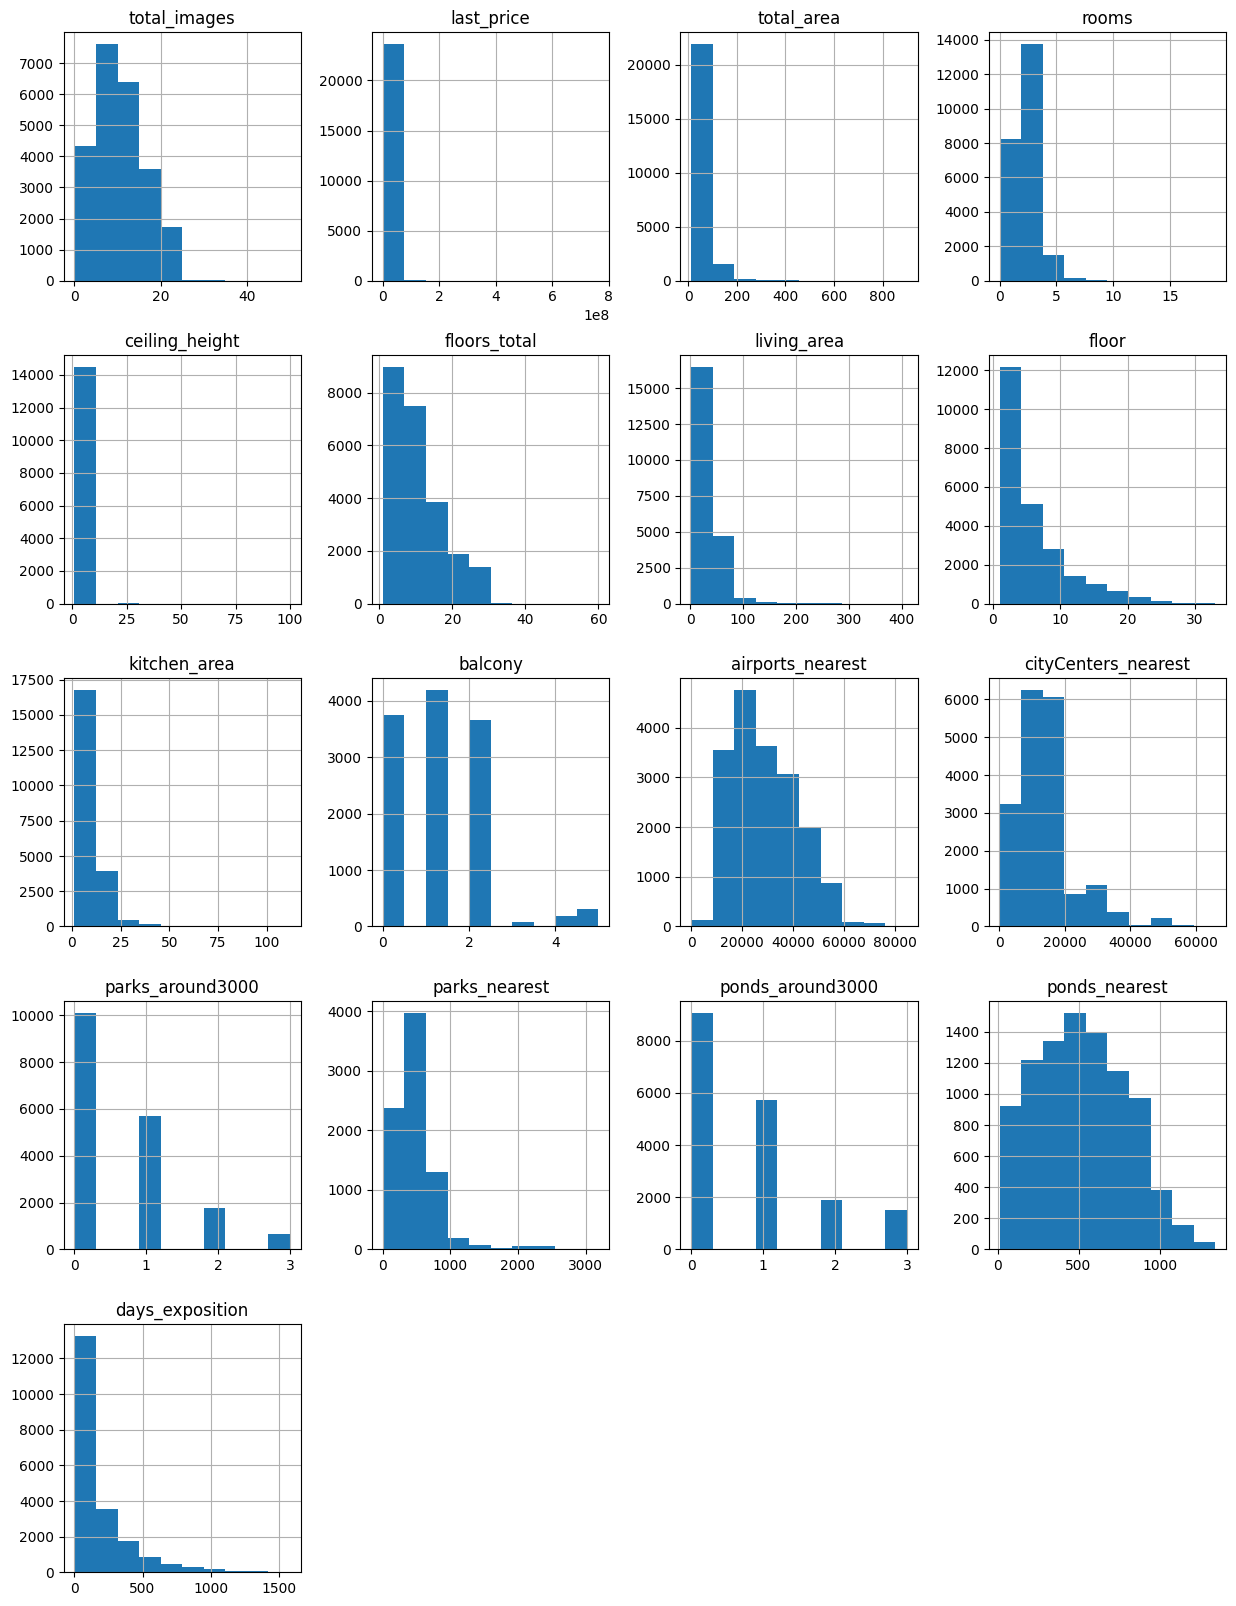

In [4]:
display(df.head())#выведем пять первых строк для примера
df.info()#выводим информацию о таблице
df.hist(figsize=(15, 20))#выведем гистограммы по всем количественным данным

#df['is_apartment'].unique()

In [5]:
df.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000



## 3. Обзор данных:

1. Всего в таблице 23 699 строк, соответственно - столько объявлений о продаже квартир в данном файле, столько квартир будем анализировать.
   В таблице 22 колонки, об этом говорит и общая информация о файле.
* Из них три - типа object (is_apartment, first_day_exposition, locality_name),
* два - bool тип (open_plan и studio)
* остальные 17 - количественные данные (три целые числа int64: total_images, rooms и floor; 14 - вещественные float64).
   Тип некоторых столбцов необходимо будет изменить, впоследствии укажем какие и почему.
  
2. Описание данных:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов (в исходном файле тип float64, нужно будет заменить на целые числа, int)
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м, необходимо заменить с float на int))
* days_exposition — сколько дней было размещено объявление (от публикации до снятия, нужно заменить тип данных с float на int)
* first_day_exposition — дата публикации (в исходном файле тип object, нужно будет заменить на формат даты)
* floor — этаж
* floors_total — всего этажей в доме (необходимо заменить с float на int)
* is_apartment — апартаменты (должен быть булев тип, в исходном файле object, нужно будет заменить)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км (необходимо заменить с float на int)
* parks_nearest — расстояние до ближайшего парка (м, необходимо заменить с float на int)
* ponds_around3000 — число водоёмов в радиусе 3 км (необходимо заменить с float на int)
* ponds_nearest — расстояние до ближайшего водоёма (м, необходимо заменить с float на int)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

3. Имеется явное несоответствие типов данных, которые нужно заменить: 
- в формат int из формата float:
   * last_price 
   * balcony
   * airports_nearest
   * cityCenters_nearest
   * days_exposition
   * floors_total
   * parks_around3000
   * parks_nearest
   * ponds_around3000
   * ponds_nearest
   
- в формат даты из object:
   * first_day_exposition
   
- в формат bool из формата object:
   * is_apartment
   
В названиях колонок 'cityCenters_nearest', 'parks_around3000, 'ponds_around3000' присутствует несоответсвие стилю:
   * не соблюден змеиный стиль snake case
   * присутствуют прописные буквы
   
4. Имеются пропущенные значения в 14 следующих колонках:
* ceiling_height 
* floors_total 
* living_area 
* is_apartment - после смены типа данных должно восполнится
* kitchen_area      
* balcony              
* locality_name        
* airports_nearest      
* cityCenters_nearest 
* parks_around3000      
* parks_nearest        
* ponds_around3000      
* ponds_nearest        
* days_exposition 

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

5. По описанию количественных данных:
Стандартное отклонение std —  характеризует разброс величин и показывает, насколько значения в выборке отличаются от среднего арифметического.
Бывает, что именно стандартное отклонение позволяет понять природу распределения и выяснить, насколько значения однородны. Выборка, где все значения близки к среднему, будет охарактеризована малым стандартным отклонением. Если же стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии или выбросы. 
Для значений в некоторых колонках (airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, days_exposition) std аномально велико, что соответствует наличию выбросов, аномалий, пропусков.

6. Построены гистограммы для всех количественных данных:
Некоторые показывают нормальное распределение данных, некоторые - наличие выбросов.
Вернемся подробно к анализу по каждому показателю после предварительной обработки данных.

**Вывод**:
- Предварительно можно утверждать, что данных достаточно для проверки гипотез.
- Наличие пропусков имеется по двум причинам - некоторые не внесены или некорректно внесены пользователями, некоторые по технической причине (в процессе, выгрузки, обработки данных)
- Для корректного анализа проведем устранение выявленных ошибок, пропусков, заменим необходимые данные.

## 4. Предобработка данных

### 4.1. Приведение названий столбцов 'cityCenters_nearest', 'parks_around3000, 'ponds_around3000' к общему стилю

In [6]:
df.columns #выведем названия всех столбцов для проверки правильности написания стиля

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
#переименуем столбцы, в которых допущено нарушения стиля
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                       'parks_around3000': 'parks_around_3000',
                       'ponds_around3000': 'ponds_around_3000'})
df.columns #проверим изменения

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Вывод:**
Столбцы, в названиях которых было допущено нарушение стиля - переименованы

### 4.2. Обрабатывание пропущенных значений

In [8]:
df.isna().sum() #выводим кол-во пропущенных значений для каждого столбца, используем комбинацию двух методов

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как и было выявлено ранее, сейчас еще раз подтвердилось - проущенные значения в 14 столбцах.
Какими значениями заменить пропущенные - разберем каждый столбец:

In [11]:
(df.isna().sum() / len(df)).round(4) * 100 # выведем кол-во пропусков в процентах

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
city_centers_nearest    23.29
parks_around_3000       23.28
parks_nearest           65.91
ponds_around_3000       23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

#### 4.2.1. Пропуски в столбце 'ceiling_height' - высота потолков

In [12]:
print(df['ceiling_height'].describe().round(2)) #выясняем общую картину значений высоты потолков по всем квартирам
df['ceiling_height'].isna().sum()

count    14504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64


9195

Максимальное значение - 100 м, явно выброс, к тому же стандартное отклонение больше единицы, поэтому для замены пропущенных значений среднее значение mean не подойдет, найдем медиану

In [13]:
df['ceiling_height'].median()

2.65

<div class="alert alert-info" role="alert">

Количество пропущенных значений высоты потолков по населенным пунктам:
    
</div>   

In [14]:
#посмотрим сколько строк с пропущеннными значениями высоты потолков с распределением по населенным пунктам
df[df['ceiling_height'].isna()].value_counts('locality_name')

locality_name
Санкт-Петербург      5617
посёлок Мурино        322
посёлок Шушары        223
посёлок Парголово     190
деревня Кудрово       177
                     ... 
поселок Житково         1
поселок Заводской       1
поселок Калитино        1
поселок Каложицы        1
село Шум                1
Length: 283, dtype: int64

<div class="alert alert-info" role="alert">

Медианное значение высоты потолков 2,65 м. 
    
Но предположим, что реальные значения высоты потолков могут быть и выше в домах старой постройки, а они строились не выше 5-6 этажей, в современных домах высоток, и даже в 9этажках высота как раз не выше 2,65. 
    
Посмотрим уровень значений высоты потолков в зависимости от этажности домов
    
</div>   

locality_name
Санкт-Петербург            5369
Всеволожск                  138
посёлок Мурино              136
деревня Кудрово             106
Пушкин                      103
                           ... 
деревня Каськово              1
поселок станции Вещево        1
посёлок Александровская       1
посёлок Ильичёво              1
деревня Парицы                1
Length: 150, dtype: int64


<AxesSubplot: xlabel='floors_total'>

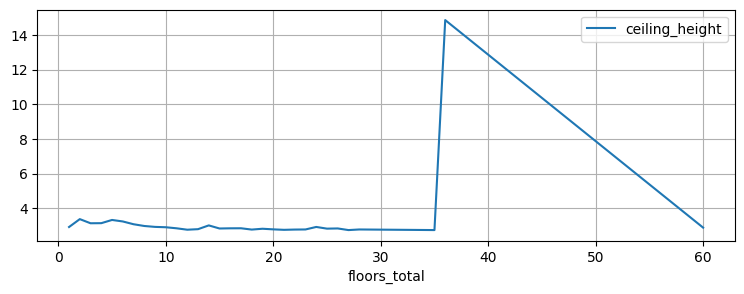

In [15]:
print(df.query('ceiling_height > 2.65').value_counts('locality_name'))
(
    df.query('ceiling_height > 2.65')
    .pivot_table(index = 'floors_total', values = 'ceiling_height')
    .plot(grid=True, figsize=(9, 3))
)

<div class="alert alert-info" role="alert">

Заметно, что высота потолков в домах выше 6ти этажей уменьшается, а при этажности 2-6 она больше. Приблизим эту картину.

На уровне значения этажей 35-36 высота потолков числится больше 14. Это явный выброс (с ними будем работать позже).
    
</div>   

<AxesSubplot: xlabel='floors_total'>

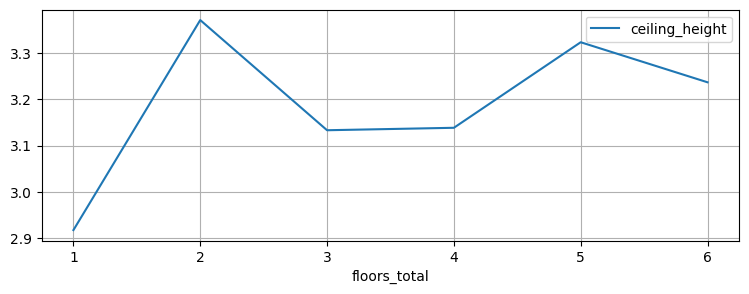

In [16]:
(
    df.query('ceiling_height > 2.65  and floors_total <= 6') #посмотрим уровень потолков в 2-6 этажных домах
    .pivot_table(index = 'floors_total', values = 'ceiling_height')
    .plot(grid=True, figsize=(9, 3))
)

<div class="alert alert-info" role="alert">

Хорошо видно, что в домах с 2-6 этажами высота потолков заметно больше. Это и доказывает тот факт, что в старых домах (которыми и являются 2-6 этажные дома), высота потолков выше медианного значения. Значит в таких домах пропущенные значения надо заменять не на общее медианное, а на медианное по этой группе, по критерию 'floors_total' (2-6 этажей)
    
</div>   

In [17]:
df['ceiling_height'] = (df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform("median")))

In [18]:
#df['city_centers_nearest'] = (
   # df['city_centers_nearest'].fillna(df.groupby('locality_name')['city_centers_nearest']
                                      #.transform("median"))
#)
#df['city_centers_nearest'].isna().sum()

#df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform("median")) 

In [19]:
df['ceiling_height'].isna().sum()#проверим произведенную замену

78

Наличие пропусков после внесения изменений - 78, уже незначительное количество, заменим их на общую медиану

In [20]:
#заменим оставшиеся пропущенные значения в столбце "высота потолков" на медианное
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()#проверим произведенную замену

0

<div class="alert alert-info" role="alert">

**Вывод**:
Пропуски в столбце 'ceiling_height' - высота потолков заполнены медианным значением по этому столбцу, сгруппировав значения по общей этажности домов, так как в старых домах высота потолков выше, чем в современных, и это надо учесть. Группировать по признаку удаленности от центра не будет так показательно, так как в центре есть дома как и низкой этажности, так и выше 6ти этажей. А высота потолков разнится именно в зависимости от этажности ("сталинки", например - имеют высоту потолков не меньше 3 м, доходит до 4,5 м)

Причина пропусков скорее всего - незаполнение данных по высоте потолков пользователем.
    
</div>  

#### 4.2.2. Пропуски в столбце 'floors_total' - всего этажей в доме

In [21]:
#найдем процент пропущенных значений по кол-ву этажей в доме
(df['floors_total'].isna().sum() / df['floors_total'].count() * 100).round(2)

0.36

In [22]:
#поскольку выяснить кол-во этажей в каждом доме не представляется возможным,
#и кол-во пропусков незначительно, всего 0,36% -
#удалим строки с пропущенными данными об этом:
df = df.dropna(subset = ['floors_total'])
df['floors_total'].isna().sum() #проверим, остались ли пропущенные значения в столбце "всего этажей"

0

In [23]:
df['floors_total'].describe().round(2)

count    23613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

Наличие пропусков после внесения изменений - 0

**Вывод:**
Поскольку невозможно заполнить другими значениями пропущенные в графе "общее кол-во этажей в доме", это неизвестно, и т.к. такие пропуски составляют всего 0,36% от всех строк, удаляем данные пропущенные строки полностью. Причина того, что нет данных по общему кол-ву этажей - пользователь не указал эти данные

#### 4.2.3. Пропуски в столбцах 'living_area' - жилая площадь и 'kitchen_area' - площадь кухни

In [24]:
df['total_area'].describe().round(2)

count    23613.00
mean        60.34
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.80
max        900.00
Name: total_area, dtype: float64

In [25]:
#основные характеристики значений столбцов:
print(df['living_area'].describe().round(2))
df['kitchen_area'].describe().round(2)

count    21743.00
mean        34.46
std         22.04
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64


count    21382.00
mean        10.56
std          5.90
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

In [26]:
#найдем процент пропущенных значений:
print((df['living_area'].isna().sum() / df['living_area'].count() * 100).round(2)) # по жилой площади квартир
(df['kitchen_area'].isna().sum() / df['kitchen_area'].count() * 100).round(2) # и по площади кухни

8.6


10.43

Так как "жилая площадь" и площадь кухни - критерии существенные для объявления о продаже квартиры, к тому же, обе доли пропущенных значений около 10%, мы не можем игнорировать данные критерии и просто удадлить эти строки.
Максимальные значения жилой площади/площади кухни - 409 кв.м. и 112 кв. м. соответственно, сильно выбиваются из общего ряда, это доказывает и третий квартиль Q3-42 кв.м. и 12 кв.м., поэтому для замены пропущеннных значений в этих столбцах будем использовать не средние значения, а медианные:

In [27]:
df['living_area'].median() #найдем медианное значение жилой площади

30.0

<div class="alert alert-info" role="alert">
    
Все нижепоследующие вычисления и рассуждения по разделу 3.2.3 - корректировка предыдущего варианта.
    
</div>   

In [28]:
#найдем отношение средних значений жилой площади и общей,
#т.е. коэффициент, который показывает какую долю занимает жилая площадь в общей:
#living_ratio_perc = ((df['living_area'] / df['total_area']) * 100).mean().round(2)
#living_ratio_perc #.mean().round(2)
living_ratio = (
    (df[df['living_area'].isna() == False]['living_area']
                .mean() / df[df['living_area'].isna()== False]['total_area']
                .mean()).round(4)
)

living_ratio

0.5737

In [29]:
#заменим пропущенные значения в столбце "жилая площадь" на среднее отношение жилой к общей
df['living_area'] = df['living_area'].fillna(living_ratio * df['total_area'])
df['living_area'].isna().sum()                                            

0

In [30]:
#найдем отношение средних значений площади кухни и общей,
#т.е. коэффициент, который показывает какую долю занимает кухня во всей квартире:
kitchen_ratio = (
    (df[(df['kitchen_area'].isna() == False) & (df['studio'] == False) & (df['open_plan'] == False)]['kitchen_area']
                .mean() / df[df['kitchen_area'].isna()== False]['total_area']
                .mean()).round(4)
)

kitchen_ratio

0.174

In [31]:
df['kitchen_area'].isna().sum() #проверим, сколько осталось пропущенных значений

2231

In [32]:
#заменим пропущенные значения в столбце "площадь кухни" на среднее отношение площади кухни к общей
#в квартирах, где есть выделенные комнаты (НЕ студии, НЕ свободной планировки)
df['kitchen_area'] = (
    df[(df['studio'] == False) & (df['open_plan'] == False)]['kitchen_area']
    .fillna(kitchen_ratio * df['total_area'])
)
print(df['kitchen_area'].isna().sum()) # остались ли пропущенные значения
df.query('kitchen_area.isna() and studio == False and open_plan == False')[['studio', 'open_plan', 'rooms']]

213


Empty DataFrame
Columns: [studio, open_plan, rooms]
Index: []

In [33]:
print('свободная планировка', df.query('kitchen_area.isna()')['open_plan'].value_counts())
print('студия', df.query('kitchen_area.isna()')['studio'].value_counts())

свободная планировка False    146
True      67
Name: open_plan, dtype: int64
студия True     146
False     67
Name: studio, dtype: int64


<div class="alert alert-info" role="alert">

Квартир, в которых не указана площадь кухни:
- со свободной планировкой 67
- студий 146
    
</div>  

In [34]:
# проверим есть ли указание площади кухни в объявлениях студий и квартир со свободной планировкой

df.query('kitchen_area > 0 and (studio == True or open_plan == True)').count().sum()

0

<div class="alert alert-info" role="alert">

Проверим, есть ли квартиры, где площадь жилой в сумме с кухней будет больше общей:
    
</div>     

In [35]:
#есть ли еще аномальные значения не соответствия соотношений площадей
df.query('(living_area + kitchen_area) > total_area')[['living_area', 'kitchen_area', 'total_area']] #.count()

living_area  kitchen_area  total_area
184          26.10        6.2000       30.20
424          88.00       17.0520       98.00
545          20.00        5.0000       23.80
551          30.55        9.2800       31.59
601          48.30        7.0000       53.70
...            ...           ...         ...
22095        33.20        6.3510       36.50
22907       200.00       39.6720      228.00
23102        55.50       11.4840       66.00
23191        16.00        3.2886       18.90
23202        63.00       13.0400       67.92

[101 rows x 3 columns]

In [36]:
df.loc[(df['living_area'] + df['kitchen_area']) > df['total_area'], 'living_area'] = df['total_area'] * living_ratio
df.query('(living_area + kitchen_area) > total_area')['total_area'].count()

24

In [37]:
df.loc[(df['living_area'] + df['kitchen_area']) > df['total_area'], 'kitchen_area'] = df['total_area'] * kitchen_ratio
df.query('(living_area + kitchen_area) > total_area')['total_area'].count()

0

In [38]:
#rows = (df['living_area'] + df['kitchen_area']) > df['total_area']
#df.loc(rows, 'living_area') = df['total_area'] * living_ratio
#df.loc(rows, 'kitchen_area') = df['total_area'] * kitchen_ratio
#df.query('(living_area + kitchen_area) > total_area')['total_area'].count()

<div class="alert alert-info" role="alert">
    
**Вывод**
    
Пропущенные значения по жилой площади и по площади кухни заменили на отношение средних значений жилой площади и кухни (соответственно) к общей.
Пропущенных значений в столбцах жилой площади и площади кухни не осталось.
Также можно сделать вывод, что мы правильно и адекватно заменили пропущенные значения в этих столбцах, проверив остались ли аномальные значения в виде: суммы жилой площади и кухни больше общей площади. Таких аномальных значений не осталось.
Причиной пропусков этих данных могло стать то, что пользователь просто не выделял отдельно жилую площадь и площадь кухни, а указал только общую площадь квартиры.
    
</div>    

#### 4.2.4. Пропуски в столбце 'is_apartment', булево значение - апартамены это или нет

In [40]:
#основные характеристики
print(df['is_apartment'].describe())
print(df['is_apartment'].isna().sum())
df['is_apartment'].unique()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object
20838


array([nan, False, True], dtype=object)

- В выводах с пропущенными значениями всего датафрейма кол-во пропущенных is_apartment 20924, при проверке столбца обнаружилось 20838 проопущенных. Но мы удаляли 86 строк с пропущенными значениями по общему кол-ву этажей в доме, на это кол-во и не хватает сейчас пропущенных значений.
- Если бы недвижимость являлась аппартаментов, пользователь обязательно об этом бы сообщил, поэтому все пропущенные значения заменим на False

In [41]:
df['is_apartment'] = df['is_apartment'].fillna(False) #заменим пропущенные значения на False (не апартамент)
print(df['is_apartment'].isna().sum()) #проверим остались ли пропущенные значения
#print(df.loc[df['is_apartment'] == True].count().unique()) #посмотрим сколько квартир-апартаментов
#print(df.loc[df['is_apartment'] == False].count().unique()) #сколько остальных квартир в объявлениях (не апартаменты)

print(df['is_apartment'].describe())
df['is_apartment'].unique()


0
count     23613
unique        2
top       False
freq      23563
Name: is_apartment, dtype: object


array([False,  True])

**Вывод:** Заменили пропущенные значения - апартамент или нет помещение - на False, имея в виду, что если пропущено, значит, не апартамент. Причина пропуска - не указал пользователь.


#### 4.2.5. Пропуски в столбце 'balcony'

In [42]:
#основные характеристики
print(df['balcony'].describe().round(2))
print(df['balcony'].isna().sum()) #определяем сколько пропущенных значений
df['balcony'].value_counts() #сколько квартир скаким кол-вом балконов


count    12133.00
mean         1.15
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: float64
11480


1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [43]:
#заменим пропущенные значения числом 0
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum() #проверим пропущенные

0

**Вывод:** Если не указано кол-во балконов, их скорее всего просто нет в квартире, поэтому заменяем все пропущенные значения на 0

#### 4.2.6. Пропуски в столбце 'locality_name'

In [44]:
#основные характеристики
print(df['locality_name'].describe())
print(df['locality_name'].isna().sum()) #определяем сколько пропущенных значений
df['locality_name'].isna().sum() / df['locality_name'].count() * 100 #какая доля пропущенных значений
#print(df['locality_name'].value_counts())
#df['locality_name'].unique()

count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object
48


0.20369191597708466

In [45]:
df = df.dropna(subset=['locality_name']) #удаляем строки с пропущенными населенными пунктами
df['locality_name'].isna().sum()

0

**Вывод:** Так как пропусков в названиях населенных пунктов всего 48, а это очень малая доля (0,2%) от всех значений, то просто удаляем объявления, где они не указаны. Определить местоположение квартиры не представляетс возможным. Причина пропуска - населенный пункт не указал пользователь, указал только область.

#### 4.2.7. Пропуски в столбцах 'airports_nearest',  'city_centers_nearest', 'parks_nearest', 'ponds_nearest'

In [46]:
#основные характеристики величины "расстояние до ближайшего аэропорта в метрах (м)"
print(df['airports_nearest'].describe().round(2))
df['airports_nearest'].isna().sum()

count    18041.00
mean     28797.08
std      12632.50
min          0.00
25%      18565.00
50%      26757.00
75%      37273.00
max      84869.00
Name: airports_nearest, dtype: float64


5524

Так как во многих объявлениях не указано расстояние до аэропорта и медиану в разрезе каждого населенного пункта посчитать не удастся, заполним пропуски медианой по всем значениям:

In [47]:
#df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())
df['airports_nearest'].isna().sum()

5524

In [48]:
#основные характеристики величины "расстояние до центра города (м)"
print(df['city_centers_nearest'].describe().round(2))
df['city_centers_nearest'].isna().sum()

count    18064.00
mean     14192.66
std       8613.35
min        181.00
25%       9238.00
50%      13096.50
75%      16285.00
max      65968.00
Name: city_centers_nearest, dtype: float64


5501

<div class="alert alert-info" role="alert">

Проведем работу по замены пропусков в столбце 'city_centers_nearest', посмотрим более подробно, как они могут повлиять на результат анализа.


</div>  

In [49]:
df['city_centers_nearest'].isna().value_counts() #всего объявлений с пропущенными значениями в "расстоянии до центра"

False    18064
True      5501
Name: city_centers_nearest, dtype: int64

In [50]:
missed_locality_center = df[df['city_centers_nearest'].isna()].value_counts('locality_name') #/ df.shape[0]
missed_locality_center

locality_name
посёлок Мурино                           520
Всеволожск                               398
Гатчина                                  307
деревня Кудрово                          299
Выборг                                   237
                                        ... 
поселок городского типа Большая Ижора      1
поселок Цвылёво                            1
деревня Трубников Бор                      1
поселок Усть-Луга                          1
село Шум                                   1
Length: 345, dtype: int64

In [51]:
perc_80 = (df['city_centers_nearest'].isna().sum() * 0.8).round() #оставим по принципу Парето 80%
perc_80

4401.0

In [52]:
#сколько объявлений в первых двух населенных пунктах (по кол-ву пропусков в 'city_centers_nearest', где их больше)
df[df['city_centers_nearest'].isna()].value_counts('locality_name').head(2).sum() 

918

In [53]:
# создадим цикл для просчета и суммирования пропущенных значений по критерию удаленности от центра
rows = 1
spaces = 0

while spaces < perc_80:
    spaces = missed_locality_center.head(rows).sum()
    rows +=1
    
rows

57

<AxesSubplot: ylabel='locality_name'>

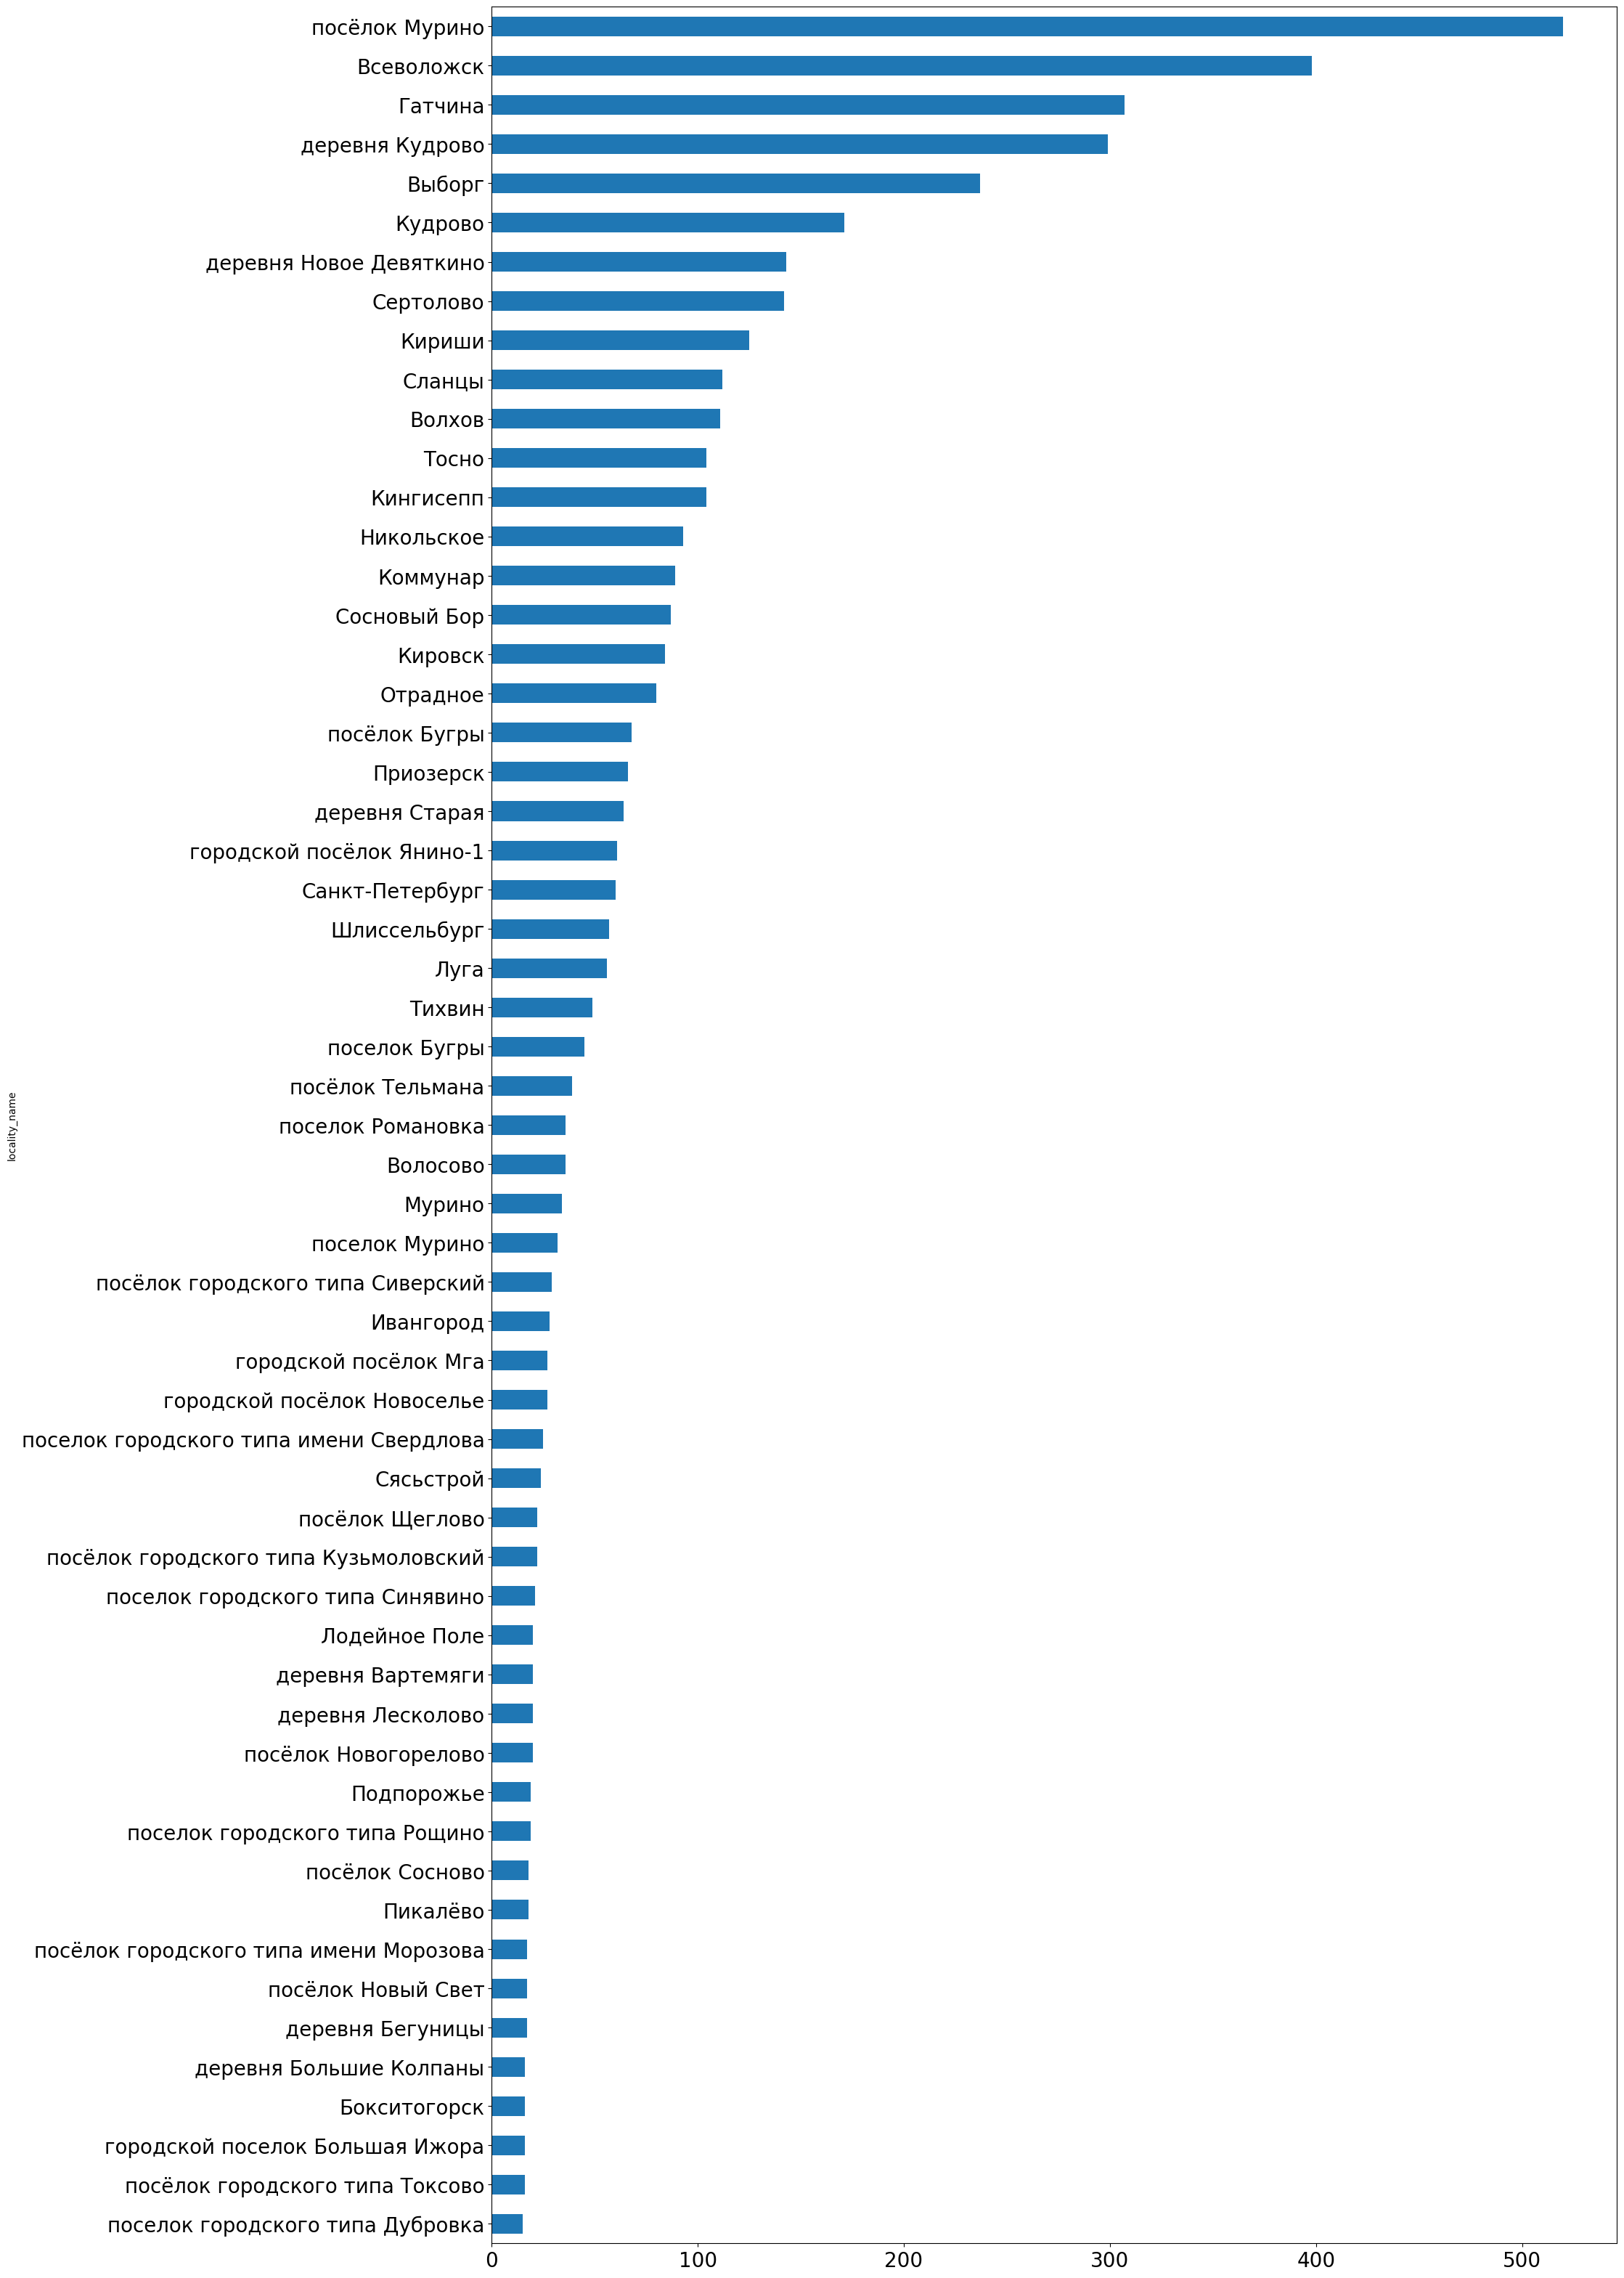

In [54]:
ax = (
    missed_locality_center.head(57).sort_values(ascending = True)
       .plot(
        kind = 'barh',
        figsize = (20, 40), 
        rot = 0, 
        legend = False, 
        fontsize = 20)
)
# ax.bar_label(ax.containers[0], fontsize = 20)
ax

In [55]:
df.query('locality_name == "Санкт-Петербург" and city_centers_nearest.isna()')['locality_name'].count()

60

<div class="alert alert-info" role="alert">

**Вывод**
    
Поскольку 80% объявлений, в которых не указано расстояние до центра описывают квартиры, расположенные в мелких населенных пунктах (за исключением Санкт-Петербурга, но в нем таких объявлений всего 60), то можно пренебречь пропусками значений удаленности от центра города в данных объявлениях. В небольших населенных пунктах практически везде центр (по сравнению с масштабами Санкт-Петербурга).

Данные пропуски не будут мешать дальнейшему анализу.


</div>  

In [56]:
#Предварительно мы удалили пропущенные значения названий населенных пунктов, 
#поэтому сейчас можем найти медиану значений по удаленности до центра в каждом населенном пункте, 
#и заменить на нее, сгруппировав, пропуски по удаленности от центра
#df['city_centers_nearest'] = (
 #   df['city_centers_nearest'].fillna(df.groupby('locality_name')['city_centers_nearest']
  #                                    .transform("median"))
#)
#df['city_centers_nearest'].isna().sum()

In [57]:
#Заменим оставшиеся на медианное значение по всем данным удаленности от центра
#df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_centers_nearest'].median())
#df['city_centers_nearest'].isna().sum()

In [58]:
#основные характеристики величины "расстояние до ближайшего парка (м)"
print(df['parks_nearest'].describe().round(2))
df['parks_nearest'].isna().sum()

count    8030.00
mean      490.58
std       341.57
min         1.00
25%       288.00
50%       455.00
75%       612.00
max      3190.00
Name: parks_nearest, dtype: float64


15535

In [59]:
#основные характеристики величины "расстояние до ближайшего водоёма (м)"
print(df['ponds_nearest'].describe().round(2))
df['ponds_nearest'].isna().sum()

count    9036.00
mean      518.29
std       278.01
min        13.00
25%       293.00
50%       503.00
75%       730.00
max      1344.00
Name: ponds_nearest, dtype: float64


14529

Пропуски в обоих этих столбцах - удаленность от парка и от водоема - можно заменить на медианное значение в каждом столбце:

In [60]:
#df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].median())
df['parks_nearest'].isna().sum()

15535

In [61]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].median())
df['ponds_nearest'].isna().sum()

0

**Вывод:** 
Пропуски в значениях, отражающих расстояние (до центра, до аэропорта, до водоема, до парка) - есть смысл заменить не на среднее, а на медианное значение по каждому столбцу, так как очень большой разброс между значениями min и max, и большое значение стандартного отклоннения std.
Т. к. эти данные заполняются автоматически, причина пропусков в данных "расстояние до центра", "расстояние до аэропорта" - техническая ошибка при выгрузке данных или при заполнении, а пропуски в данных "расстояние до парка" и "расстояние до водоема" - отсутствие указаний самих парков и водоемов, соответственно, если их нет (не указал пользователь), нет и данных о расстоянии до них.

#### 4.2.8. Пропуски в столбцах 'parks_around_3000' 'ponds_around_3000 '

In [62]:
#основные характеристики величины "число парков в радиусе 3 км"
print(df['parks_around_3000'].describe().round(2))
df['parks_around_3000'].isna().sum()

count    18065.00
mean         0.61
std          0.80
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around_3000, dtype: float64


5500

In [63]:
#основные характеристики величины "число водоёмов в радиусе 3 км"
print(df['ponds_around_3000'].describe().round(2))
df['ponds_around_3000'].isna().sum()

count    18065.00
mean         0.77
std          0.94
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          3.00
Name: ponds_around_3000, dtype: float64


5500

In [64]:
#заменяем пропущенные значения по числу парков и водоемов на 0
df['parks_around_3000'] = df['parks_around_3000'].fillna(0)
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)
print(df['parks_around_3000'].isna().sum())
df['ponds_around_3000'].isna().sum()

0


0

**Вывод:**
При внесении в объявление данных о числе парков рядом (в радиусе 3 км) или водоемов, пользователь обязательно укажет их как преимущество. Поэтом, если они не указаны (пропущены значения), значит их нет в радиусе 3 км, поэтому данне пропущенные значения мы заменяем на 0.

#### 4.2.9. Пропуски в столбце 'days_exposition'

In [65]:
#основные характеристики величины
#"сколько дней было размещено объявление (от публикации до снятия)"
print(df['days_exposition'].describe().round(2))
df['days_exposition'].isna().sum()

count    20394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max       1580.00
Name: days_exposition, dtype: float64


3171

<AxesSubplot: >

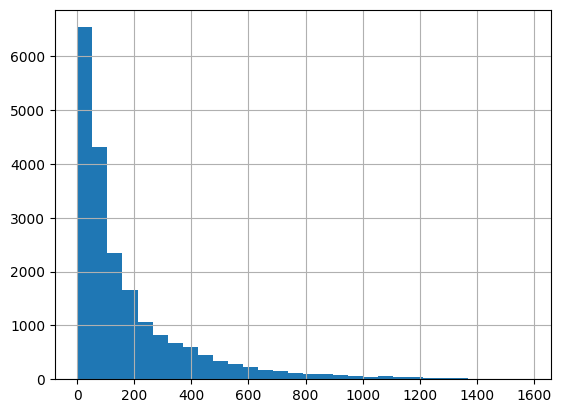

In [66]:
df['days_exposition'].hist(bins = 30)

<div class="alert alert-info" role="alert">

Из гистограммы по 'days_exposition' видно, что максимальное кол-во объявлений держится на сайте менее 125 дней. Сделаем выборку по пропущенным данным.
Нам понадобится столбец 'first_day_exposition', проверим тип его данных
   
<div>

In [67]:
df.dtypes['first_day_exposition']

dtype('O')

Тип данных в столбце "первый день публикации" - object, это нам помешает, необходимо перевести его в правильный формат - даты:

In [68]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d %H:%M:%S')
df.dtypes['first_day_exposition'] #проверим тип данных

dtype('<M8[ns]')

Тип данных '<M8[ns]' - эквивалент формату даты datetime64[ns], то есть мы все правильно перевели.
Построим теперь гистограмму выборки, где пропущены значения кол-ва дней публикации на сайте, с распределением кол-ва объявлений по датам публикации (по дням прервой публикации). Ось X - даты первой публикации каждого объявления, Ось Y - количество объявлений на эту дату

Text(0, 0.5, 'Количество объявлений')

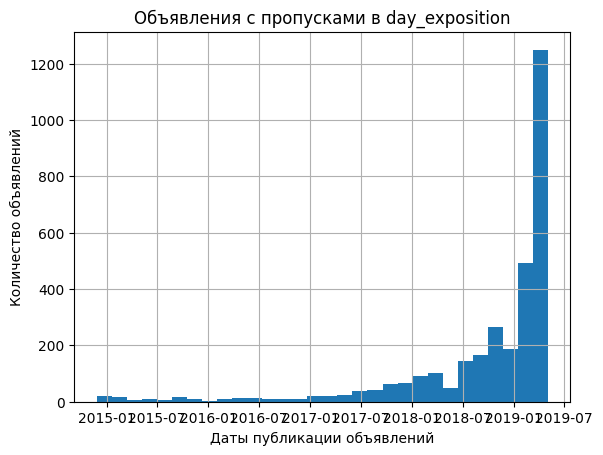

In [69]:
df.query('days_exposition.isna()').hist('first_day_exposition', bins=30)
plt.title('Объявления с пропусками в day_exposition')
plt.xlabel('Даты публикации объявлений')
plt.ylabel('Количество объявлений')

На гистограмме хорошо видна зависимость - чем больше дата публикации (позднее), тем больше объявлений было опубликовано. Предполагаем, что это не проданные квартиры (объявления еще не закрыты). Тогда кол-во дней публикации 'days_exposition' будем считать разницу между последним днем публикации (first_day_exposition.max) перед тем как создан данный файл df, и 'first_day_exposition', указанным в каждом объявлении, по последнему пропусков нет, так кк это автоматически присваивается при подаче объявления на ресурсе

In [70]:
#df.loc[df['days_exposition'].isna(), 'days_exposition'] = (
    #(df['first_day_exposition'].max() - df.loc[df['days_exposition'].isna(), 
                                               #'first_day_exposition']).dt.days
#)
#df['days_exposition'].isna().sum()

**Вывод:**
Причиной пропусков в графе 'days_exposition' может служить факт, что объявление еще не закрыто - квартира не продалась, или снялась с продажи, продажей не закончилось.
Пропуски заменили разницей в днях: между максимальным значением даты публикации (самым поздним перед выгрузкой) и датой публикации каждого объявления.

<div class="alert alert-info" role="alert">

Меняем вышепринятое решение заменить пропущенные данные по кол-ву дней публикации 'days_exposition' на разницу между последним днем публикации (first_day_exposition.max), так как думаем это означает, что квартиры еще не проданы, а это может быть важным признаком для дальнейшего анализа.

**Вывод:**
    
Пропуски в'days_exposition' оставляем.
    
<div>

### 4.3. Изменение типа данных

Имеется явное несоответствие типов данных, которые нужно заменить:

-- в формат int из формата float:

* last_price 
* balcony
* airports_nearest
* city_centers_nearest 
* days_exposition
* floors_total
* parks_around_3000
* parks_nearest
* ponds_around_3000
* ponds_nearest

-- в формат bool из формата object:

* is_apartment

-- в формат даты из object - first_day_exposition - мы уже перевели в предыдущем разделе


In [71]:
# для замены типов данных на один и тот же тип в нескольких столбцах:
# создадим список с названиями этих столбцов
df_columns_type = ['last_price', 'balcony', 'airports_nearest', 'city_centers_nearest',
                   'days_exposition', 'floors_total', 'parks_around_3000', 'parks_nearest', 
                   'ponds_around_3000', 'ponds_nearest']
#применим метод astype ко всем перечисленным столбцам для изменения формата на целочисленный:
try:
    df[df_columns_type] = df[df_columns_type].astype(int)
except:
    pass

# меняем формат из object на булев тип в колонке обозначения апартаментов:
df['is_apartment'] = df['is_apartment'].astype('bool')

#проверим изменение типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23352 non-null  float64       
 13  balcony         

**Вывод:**
Изменили тип данных с вещественного числа (дробное) на целое в столбцах "балконы", "дней публикации", "общее кол-во этажей в доме", так как первое и последне наименование предполагает только целое значение, а дней - понятнее, если будет целое число.
В столбцах, где указыаются цены и расстояние, тоже лучше поместить целые числа, для удобства дальнейших расчетов и анализа.
В формате "апартаменты" необходимо указать булево значение, чтобы учитывать пометки пользователей "да" или "нет", аналогично "студии" и "свободной планировке"

### 4.4. Поиск явных дубликатов

In [72]:
df.duplicated().sum() #посмотрим, сколько дубликатов есть в нашем файле

0

**Вывод:**
Явных дубликатов в данных нет.

### 4.5. Поиск и устранение неявных дубликатов

In [73]:
print(df['locality_name'].value_counts()) #кол-во значений в столбце "Название населенного пункта"
print('')
print('Количество наименований населенных пунктов в исходном файле', df.locality_name.nunique())
df['locality_name'].sort_values().unique() #выведем отсортированный список наименований

Санкт-Петербург          15651
посёлок Мурино             520
посёлок Шушары             439
Всеволожск                 398
Пушкин                     369
                         ...  
деревня Сижно                1
деревня Большой Сабск        1
посёлок Сумино               1
поселок Возрождение          1
поселок Почап                1
Name: locality_name, Length: 364, dtype: int64

Количество наименований населенных пунктов в исходном файле 364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В наименованиях населенных пунктов встречаются неявные дубликаты:
- городской поселок Большая Ижора и поселок городского типа Большая Ижора
- городской посёлок Лесогорский и поселок городского типа Лесогорский
- городской посёлок Назия и поселок городского типа Назия
- городской посёлок Рощино и поселок городского типа Рощино
- городской посёлок Советский и поселок городского типа Советский
- городской поселок Янино-1 и городской посёлок Янино-1

In [74]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') #заменяем все буквы ё на е
#приводим наименование городского поселка к общему (проbзводим замену только с использованиеv буквы е,
#до этого ё уже заменилось на е)
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')
print('Количество наименований населенных пунктов после корректировки', df.locality_name.nunique())

Количество наименований населенных пунктов после корректировки 323


**Вывод.**
Для устранения неявных дубликатов:
- заменили все буквы ё на е
- привели к общему наименованию типв городских поселков, исправив все подобные дубликаты на "поселок городского типа"
После замены вместо 364 наименований населенных пунктов стало 323
Причины пропусков - сбор данных из разных источников с разной структурой изначальнызх данных

In [75]:
# check
df.locality_name.nunique()

323

### 4.6. Устранение  редких и выбивающихся значений и аномалий в данных (выбросов)

In [76]:
df.describe() #посмотрим еще раз на распределение значений в каждом столбце

total_images    last_price    total_area         rooms  ceiling_height  \
count  23565.000000  2.356500e+04  23565.000000  23565.000000    23565.000000   
mean       9.878421  6.540058e+06     60.322824      2.070656        2.735737   
std        5.681156  1.091093e+07     35.657060      1.078591        0.996999   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.550000   
50%        9.000000  4.646000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.790000e+06     69.700000      3.000000        2.750000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23565.000000  23565.000000  23565.000000  23352.000000  23565.000000   
mean      10.675875     34.548074      5.878124     10.523360      0.593677   
std        6.594823     22.326600      4.871485      5.994393      0.960660   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     19.000000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.100000      8.000000     12.000000      1.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      18041.000000          18064.000000       23565.000000   
mean       28797.082701          14192.656056           0.468831   
std        12632.499735           8613.348153           0.748403   
min            0.000000            181.000000           0.000000   
25%        18565.000000           9238.000000           0.000000   
50%        26757.000000          13096.500000           0.000000   
75%        37273.000000          16285.000000           1.000000   
max        84869.000000          65968.000000           3.000000   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    8030.000000       23565.000000   23565.000000     20394.000000  
mean      490.580448           0.589900     508.862763       180.741395  
std       341.572956           0.883966     172.307391       219.732782  
min         1.000000           0.000000      13.000000         1.000000  
25%       288.000000           0.000000     503.000000        45.000000  
50%       455.000000           0.000000     503.000000        95.000000  
75%       612.000000           1.000000     503.000000       231.000000  
max      3190.000000           3.000000    1344.000000      1580.000000

**'total_images'** - нормальная картина, есть объявления и с 50 фото, есть без фото, в среднем около 9-10, оставляем как есть

**'last_price'** - наименьшая цена квартиры - 12 190 руб, это скорее всего ошибка при внесении цены (посмотрм, какая следующая идет цена после минимальной), квартиры дороже 100 млн - элитное жилье, для общего анализа мы их считать не будем, посмотриим, сколько таких квартир

In [77]:
print(df['last_price'].sort_values().unique()) #посмотрим значения цен квартир
df.query('last_price < 100000')#посмотрим какие есть квартиры стоимостью менее 100 тыс руб
df.query('last_price > 1e+8').count().unique()#сколько квартир стоимостью более 100 млн руб

[1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]


array([37, 36, 26, 32], dtype=int64)

Следующая цена после минимальной - 430 тыс рую, это уже реально, оставляем, будем строить гистограмму с учетом этой первой цены.
Так и есть - квартира 109 кв.м. не может стоить 12190 руб, скорее всего, это 12 млн. Исправим это:

In [78]:
df.loc[8793, 'last_price'] = 1.219e+7 # исправим значение цены квартиры за 12 190 руб
df.query('last_price < 100000') #проверим

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

Исправили аномальную стоимость на нормальную.
Отбросим элитное жилье, таких квартир всего 37

In [79]:
df = df.query('last_price < 1e+8') #убрали квартиры стоимостью больше 100 млн
df.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23528.000000  2.352800e+04  23528.000000  23528.000000    23528.000000   
mean       9.869177  6.248880e+06     59.899785      2.065709        2.734676   
std        5.677979  6.430671e+06     33.461514      1.069729        0.996961   
min        0.000000  4.300000e+05     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.550000   
50%        9.000000  4.620000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.750000e+06     69.500000      3.000000        2.750000   
max       50.000000  9.900000e+07    590.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23528.000000  23528.000000  23528.000000  23315.000000  23528.000000   
mean      10.681868     34.315463      5.878783     10.471780      0.593846   
std        6.596843     21.312882      4.872865      5.793022      0.960494   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     19.000000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.000000      8.000000     12.000000      1.000000   
max       60.000000    409.000000     33.000000    107.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      18005.000000          18028.000000       23528.000000   
mean       28801.838878          14212.529121           0.467188   
std        12643.263541           8609.943188           0.746385   
min            0.000000            181.000000           0.000000   
25%        18551.000000           9273.250000           0.000000   
50%        26765.000000          13111.500000           0.000000   
75%        37294.000000          16293.000000           1.000000   
max        84869.000000          65968.000000           3.000000   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    8004.000000       23528.000000   23528.000000     20362.000000  
mean      490.903548           0.587683     509.112802       180.492535  
std       341.922559           0.881925     172.188836       219.560918  
min         1.000000           0.000000      13.000000         1.000000  
25%       288.000000           0.000000     503.000000        45.000000  
50%       455.000000           0.000000     503.000000        95.000000  
75%       612.000000           1.000000     503.000000       231.000000  
max      3190.000000           3.000000    1344.000000      1580.000000

array([[<AxesSubplot: title={'center': 'last_price'}>]], dtype=object)

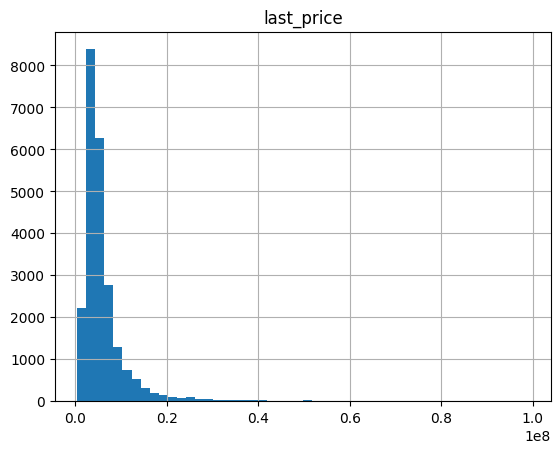

In [80]:
df.hist('last_price', bins=50)

Наибольшее кол-во объявлений со стоимостью до 20 млн, пик - на 6-7 млн за квартиру

**'total_area'** - минимальная площадь квартиры 12 м, это могут быть апартаменты,это нормально, максимальная - 590 кв.м, хоть мы и отбросили очень дорогие квартиры, более 400 кв.м. - элитное жилье, уберем и такие, посмоторим, сколько таких

In [81]:
print(df.query('total_area > 400')['total_area'].count())#сколько квартир площадью более 400 кв.м.
df = df.query('total_area < 400') #оставим квартиры площадью менее 400 кв.м.
df.describe()

14


total_images    last_price    total_area         rooms  ceiling_height  \
count  23512.000000  2.351200e+04  23512.000000  23512.000000    23512.000000   
mean       9.868237  6.214621e+06     59.622549      2.062862        2.734308   
std        5.676676  6.262420e+06     31.712334      1.061887        0.997068   
min        0.000000  4.300000e+05     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.550000   
50%        9.000000  4.600000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.750000e+06     69.300000      3.000000        2.750000   
max       50.000000  9.900000e+07    399.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23512.000000  23512.000000  23512.000000  23299.000000  23512.000000   
mean      10.683651     34.153644      5.878530     10.444919      0.594122   
std        6.597215     20.315722      4.872703      5.671761      0.960664   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     19.000000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.000000      8.000000     12.000000      1.000000   
max       60.000000    264.500000     33.000000    107.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      17991.000000          18012.000000       23512.000000   
mean       28802.059252          14219.245170           0.466655   
std        12645.793527           8609.699457           0.746046   
min            0.000000            181.000000           0.000000   
25%        18545.000000           9287.500000           0.000000   
50%        26765.000000          13114.000000           0.000000   
75%        37294.000000          16293.000000           1.000000   
max        84869.000000          65968.000000           3.000000   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    7991.000000       23512.000000   23512.000000     20351.000000  
mean      490.973595           0.587530     509.170806       180.473048  
std       342.028840           0.881665     172.177884       219.506452  
min         1.000000           0.000000      13.000000         1.000000  
25%       288.000000           0.000000     503.000000        45.000000  
50%       455.000000           0.000000     503.000000        95.000000  
75%       612.000000           1.000000     503.000000       231.000000  
max      3190.000000           3.000000    1344.000000      1580.000000

array([[<AxesSubplot: title={'center': 'total_area'}>]], dtype=object)

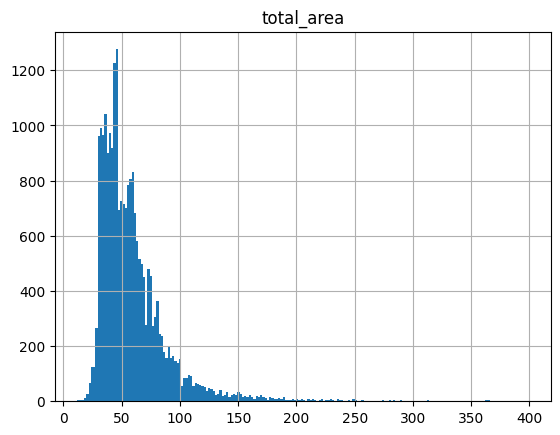

In [82]:
df.hist('total_area', bins=200)

Убрали слишком большие квартиры, более 400 кв. м., их 14
Основная масса объявлений - по квартирам с площадью от 30 до 100 кв.м.

**'rooms'** - есть квартиры с нулевым кол-вом комнат, но это может быть (студии, апартаменты, свободная планировка).
Проверим сколько каких. 

In [83]:
#посмотрим сколько квартир без комнат, из них:
print('Квартиры без комнат всего:', df.query('rooms == 0')['total_area'].count())

print('Студии:', df.query('rooms == 0 and studio')['total_area'].count()) 

print('Апартаменты:', df.query('rooms == 0 and is_apartment')['total_area'].count())

print('Cвободная планировка:', df.query('rooms == 0 and open_plan')['total_area'].count())

print('Другие:', df.query('rooms == 0 and ~open_plan and ~studio and ~is_apartment')['total_area'].count())


Квартиры без комнат всего: 194
Студии: 135
Апартаменты: 0
Cвободная планировка: 59
Другие: 0


array([[<AxesSubplot: title={'center': 'rooms'}>]], dtype=object)

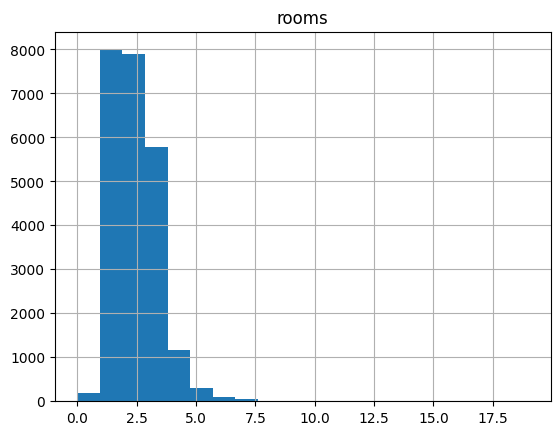

In [84]:
df.hist('rooms', bins=20)

Основное кол-во объявлений - по квартирам с 1-2-3 комнатами, меньше встречаются с 5 и более, и с 0. Но как мы выяснили, когда 0 комнат - это апартаменты, студии и свободная планировка, ими пренебрегать нельзя. А вот квартир с комнатами более 7 - надо узнать сколько, чтобы понять насколько они важны для дальнейшего анализа

In [85]:
df.query('rooms > 7').count()['total_area']

26

In [86]:
df = df.query('rooms < 7')
df.describe()

total_images    last_price    total_area        rooms  ceiling_height  \
count  23437.000000  2.343700e+04  23437.000000  23437.00000    23437.000000   
mean       9.867603  6.149574e+06     59.061342      2.04382        2.732851   
std        5.675162  6.114207e+06     29.899810      1.00145        0.998110   
min        0.000000  4.300000e+05     12.000000      0.00000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.00000        2.550000   
50%        9.000000  4.600000e+06     52.000000      2.00000        2.650000   
75%       14.000000  6.700000e+06     69.000000      3.00000        2.750000   
max       50.000000  9.900000e+07    399.000000      6.00000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23437.000000  23437.000000  23437.000000  23224.000000  23437.000000   
mean      10.700815     33.772071      5.885182     10.404171      0.595127   
std        6.600039     19.032582      4.877533      5.590631      0.961123   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     19.000000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.000000      8.000000     12.000000      1.000000   
max       60.000000    255.700000     33.000000    107.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      17917.000000          17938.000000       23437.000000   
mean       28821.961043          14253.750251           0.464010   
std        12661.412896           8602.824221           0.743375   
min            0.000000            181.000000           0.000000   
25%        18539.000000           9375.250000           0.000000   
50%        26803.000000          13142.000000           0.000000   
75%        37325.000000          16298.000000           1.000000   
max        84869.000000          65968.000000           3.000000   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    7936.000000       23437.000000   23437.000000     20300.000000  
mean      491.277974           0.585783     509.349234       180.211576  
std       342.509610           0.880338     172.008132       219.224873  
min         1.000000           0.000000      13.000000         1.000000  
25%       288.000000           0.000000     503.000000        45.000000  
50%       455.000000           0.000000     503.000000        95.000000  
75%       613.000000           1.000000     503.000000       230.000000  
max      3190.000000           3.000000    1344.000000      1580.000000

**'ceiling_height'** - максимальное значение высоты потолка - 100м, это явно ошибка. Q3 показывает значение 2,7м, может быть, что несколько квартир с более высокими потолками - двухэтажные, например. Проверим какие есть квартиры (с какой высотой потолков):

In [87]:
df['ceiling_height'].unique()

array([  2.7 ,   2.75,   2.55,   2.6 ,   3.03,   2.65,   2.66,   2.5 ,
         2.67,   2.56,   3.  ,   3.05,   2.8 ,   2.9 ,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,  14.85,   2.52,   5.2 ,   2.87,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,
         2.95,   4.06,   2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,
         3.01,   5.6 ,   3.65,   3.18,   3.35,   2.3 ,   3.57,   2.48,
         2.62,   2.82,   3.98,   2.63,   3.83,   3.52,   3.95,   3.75,
         2.88,   3.67,   3.87,   3.66,   4.19,   3.24,   4.8 ,   4.5 ,
         4.2 ,   3.36,   3.86,  32.  ,   3.08,   3.68,   3.07,   3.37,
         3.09,   8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,   2.97,
      

Встречаютсмя значения высоты потолков 32, 26, 24, 20, 25, 27. Можно предположить, что это неправильный воод данных, и эти значения надо изменить, уменьшив в 10 раз

array([[<AxesSubplot: title={'center': 'ceiling_height'}>]], dtype=object)

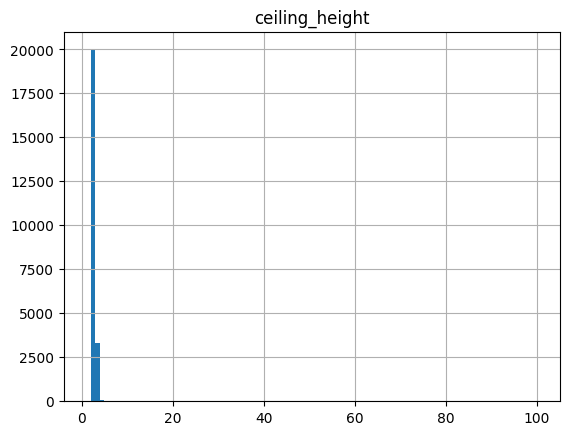

In [88]:
df.hist('ceiling_height', bins=100) #посмотрим на гистограмме распределение значений высоты потолков квартир

На гистограмме видим, что наиболее часто встречается высота потолков (по убыванию): 2,7м, 2,5м, и в интервале 2,5-3м, то есть подавляющее большинство значений высоты потолков - реальное, правильно внесённое. Распределим их по группам:

In [89]:
#высота полоков менее 2,5 м - не по СНИПу, их удалим потом из выборки
print('Квартир с потолками до 2,5 м:', df.query('ceiling_height < 2.5')['total_area'].count())
print('Квартир с потолками 2,5м -3,2 м:', df.query('ceiling_height < 3.2 and ceiling_height > 2.5')['total_area'].count())
print('Квартир с потолками 3,2 м - 6 м', df.query('ceiling_height < 6 and ceiling_height > 3.2')['total_area'].count())
print('Квартир с потолками 6 м - 25 м', df.query('ceiling_height > 6 and ceiling_height < 25')['total_area'].count())
print('Квартир с потолками 25 м - 32 м', df.query('ceiling_height < 32 and ceiling_height > 25')['total_area'].count())
print('Квартир с потолками 32 м - 60 м:', df.query('ceiling_height < 60 and ceiling_height > 32')['total_area'].count())

Квартир с потолками до 2,5 м: 73
Квартир с потолками 2,5м -3,2 м: 18824
Квартир с потолками 3,2 м - 6 м 727
Квартир с потолками 6 м - 25 м 10
Квартир с потолками 25 м - 32 м 10
Квартир с потолками 32 м - 60 м: 0


Квартир с потолками до 2,5 м: 0
Квартир с потолками 2,5м -3,2 м: 18834
Квартир с потолками 3,2 м - 6 м 727
Квартир с потолками более 6 м: 0


array([[<AxesSubplot: title={'center': 'ceiling_height'}>]], dtype=object)

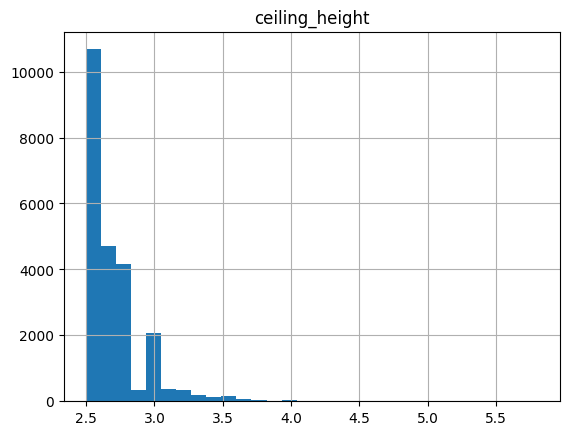

In [90]:
#удаляем объявления с квартирами, где потолки менее 2,5 м 
df.drop(index=df.query('ceiling_height < 2.5').index, inplace=True) 

#значения потолков от 25 до 32 переводим в реальные, в 10 раз меньше
df.loc[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 32), 'ceiling_height'] = df['ceiling_height'] / 10

#удаляем объявления с квартирами, где потолки более 6 м 
df.drop(index=df.query('ceiling_height > 6').index, inplace=True) 

print('Квартир с потолками до 2,5 м:', df.query('ceiling_height < 2.5')['total_area'].count())
print('Квартир с потолками 2,5м -3,2 м:', df.query('ceiling_height < 3.2 and ceiling_height > 2.5')['total_area'].count())
print('Квартир с потолками 3,2 м - 6 м', df.query('ceiling_height < 6 and ceiling_height > 3.2')['total_area'].count())
print('Квартир с потолками более 6 м:', df.query('ceiling_height > 6')['total_area'].count())
df.hist('ceiling_height', bins=30)

Остались лишь реальные и значимые объявления с высотой потолков от 2,5 до 6 м. Наибольшее кол-во квартир - с высотой потолков 2,7 м

**'floors_total' и 'floor'** - самое меньшее общее кол-во этажей в доме - 1, но одноэтажные дома - это нормально, оставляем.
В Санкт-Петербурге самые высотные жилые дома - 36 этажей, отбросим все объявления, где указано общее кол-во этажей в доме более 36. Значения этажа, на котором продается квартиры - нулевых нет, аномально больших нет (проверим нет ли этажа больше, чем значение общей этажности в доме)

In [91]:
#посмотрим, сколько представлено одноэтажных предложений
print('Квартир в одноэтажных домах:', df.query('floors_total == 1')['total_area'].count()) 
print('Квартир в домах более 36 этажей:', df.query('floors_total > 36')['total_area'].count())

Квартир в одноэтажных домах: 23
Квартир в домах более 36 этажей: 2


[[<AxesSubplot: title={'center': 'floors_total'}>]]


5.0     5704
9.0     3743
16.0    1370
12.0    1353
4.0     1173
10.0    1172
25.0    1074
6.0      877
17.0     831
3.0      662
7.0      570
14.0     549
18.0     504
24.0     462
8.0      380
2.0      372
15.0     364
23.0     349
19.0     339
22.0     286
20.0     269
13.0     228
11.0     201
27.0     164
21.0     158
26.0     124
35.0      24
1.0       23
28.0      21
36.0       2
34.0       1
33.0       1
29.0       1
Name: floors_total, dtype: int64

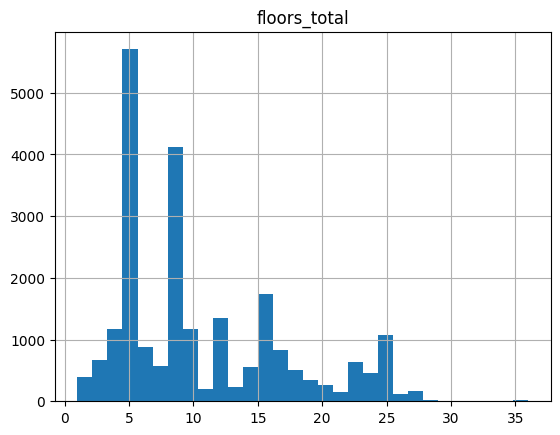

In [92]:
df.drop(index=df.query('floors_total > 36').index, inplace=True) 
print(df.hist('floors_total', bins=30)) #на гистограмме увидим распределение по этажности после корректировки
df['floors_total'].value_counts() #посмотрим сколько каких домов по этажности

In [93]:
df.describe() #каждый раз выводим обзор численных значений, так как после обработки очередного столбца меняется общая картина 

total_images    last_price    total_area         rooms  ceiling_height  \
count  23351.000000  2.335100e+04  23351.000000  23351.000000    23351.000000   
mean       9.872939  6.157446e+06     59.100467      2.044109        2.705668   
std        5.673908  6.122463e+06     29.934475      1.002066        0.227788   
min        0.000000  4.300000e+05     12.000000      0.000000        2.500000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.550000   
50%        9.000000  4.600000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.700000e+06     69.000000      3.000000        2.750000   
max       50.000000  9.900000e+07    399.000000      6.000000        5.800000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23351.000000  23351.000000  23351.000000  23138.000000  23351.000000   
mean      10.705494     33.789276      5.888227     10.412380      0.594107   
std        6.587216     19.053060      4.878964      5.595725      0.959991   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     19.000000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.000000      8.000000     12.000000      1.000000   
max       36.000000    255.700000     33.000000    107.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      17863.000000          17884.000000       23351.000000   
mean       28826.154789          14248.723608           0.463706   
std        12659.743941           8600.115569           0.743192   
min            0.000000            181.000000           0.000000   
25%        18539.000000           9363.250000           0.000000   
50%        26812.000000          13142.000000           0.000000   
75%        37347.000000          16296.000000           1.000000   
max        84869.000000          65968.000000           3.000000   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    7903.000000       23351.000000   23351.000000     20225.000000  
mean      491.259395           0.586142     509.400454       180.325884  
std       343.025344           0.880492     172.072578       219.431352  
min         1.000000           0.000000      13.000000         1.000000  
25%       288.000000           0.000000     503.000000        45.000000  
50%       455.000000           0.000000     503.000000        95.000000  
75%       613.000000           1.000000     503.000000       230.000000  
max      3190.000000           3.000000    1344.000000      1580.000000

In [94]:
#проверим, правильно ли провели обработку столбцов floor и floors_total, 
#не получилось ли так, что этаж квартиры больше чем всего этажей в доме
df[df['floor'] > df['floors_total']] 

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

Квартир в домах свыше 36 этажей - 2, это скорее всего ошибка в занесении данных, т.к. в С-Петербурге запрещено строительство жилых домов свыше 36 этажей, отбросим эти объявления.
На гистограмме в исправленном датафрейме распределение квартир по этажности выглядит нормальным.

**'living_area'** - жилая площадь.
В описании видно, что минимальная жилая площадь - 2 кв.м, это явно ошибка. Максимальная - 255 кв.м, это возможно, тем более при общей максимальной площади 399 кв.м. Но посмотрим сколько квартир какой площади - на гистограмме, и выведем крайние значения, которые мы оценим, можно ли отбросить: минимально по нормам возможная жилая площадь квартиры 10 кв.м., максимально реальная, которую можно включить в анализ оценим после вывода кол-ва таких квартир

array([[<AxesSubplot: title={'center': 'living_area'}>]], dtype=object)

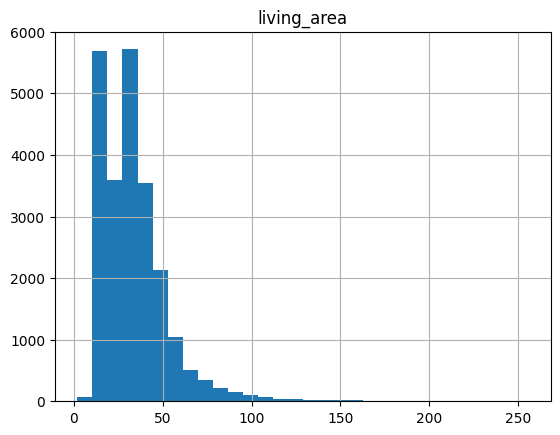

In [95]:
df.hist('living_area', bins=30)

In [96]:
print('Квартир с жилой площадью меньше 10 кв.м.:', df.query('living_area < 10')['total_area'].count())
print('Квартир с жилой площадью более 200 кв.м.:', df.query('living_area > 200')['total_area'].count())

Квартир с жилой площадью меньше 10 кв.м.: 32
Квартир с жилой площадью более 200 кв.м.: 5


array([[<AxesSubplot: title={'center': 'living_area'}>]], dtype=object)

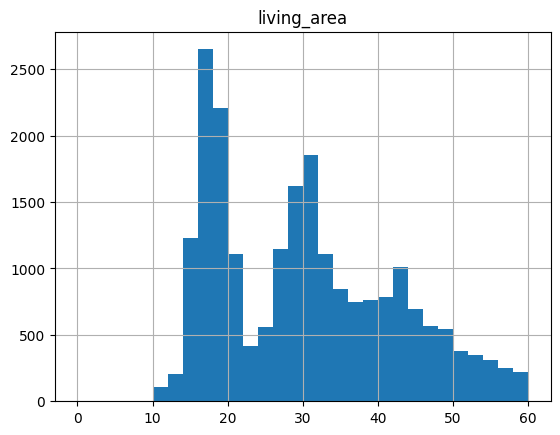

In [97]:
#убираем объявления с квартирами, где жилая площадь менее 10 кв.м
df.drop(index=df.query('living_area < 10').index, inplace=True) 
#удаляем объявления по квартирам с жилой площадью более 200 кв.м., тем более их всего 2
df.drop(index=df.query('living_area > 200').index, inplace=True) 
#на гистограмме увидели, что наибольшее кол-во объявлений - с квартирами жилой площади от 10 до 60
#построим более подробную гистограмму, ограничив значения до 60
df.hist('living_area', bins=30, range=(0, 60))

На гистограмме после корректировки распределение выглядит допустимым, годится для дальнейшего анализа

**'kitchen_area'** - аналогично жилой площади, оценим насколько реальны значения.
Посмотрим описание численных значений после предыдущей корректировки жилой площади

In [98]:
df.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23314.000000  2.331400e+04  23314.000000  23314.000000    23314.000000   
mean       9.872823  6.142975e+06     59.069179      2.044823        2.705433   
std        5.673874  6.030115e+06     29.623500      1.001525        0.226786   
min        0.000000  4.300000e+05     13.000000      0.000000        2.500000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.550000   
50%        9.000000  4.600000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.700000e+06     69.000000      3.000000        2.750000   
max       50.000000  9.900000e+07    380.000000      6.000000        5.800000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23314.000000  23314.000000  23314.000000  23104.000000  23314.000000   
mean      10.703483     33.783060      5.886978     10.400759      0.594450   
std        6.585735     18.820366      4.876958      5.557268      0.960296   
min        1.000000     10.000000      1.000000      1.300000      0.000000   
25%        5.000000     19.000000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.000000      8.000000     12.000000      1.000000   
max       36.000000    200.000000     33.000000    107.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      17828.000000          17849.000000       23314.000000   
mean       28826.532253          14255.410835           0.463241   
std        12664.846478           8601.817461           0.742973   
min            0.000000            181.000000           0.000000   
25%        18518.000000           9380.000000           0.000000   
50%        26812.000000          13144.000000           0.000000   
75%        37364.000000          16298.000000           1.000000   
max        84869.000000          65968.000000           3.000000   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    7883.000000       23314.000000   23314.000000     20193.000000  
mean      491.105544           0.585742     509.370035       180.355866  
std       342.796551           0.880329     171.810680       219.512836  
min         1.000000           0.000000      13.000000         1.000000  
25%       287.500000           0.000000     503.000000        45.000000  
50%       455.000000           0.000000     503.000000        95.000000  
75%       613.000000           1.000000     503.000000       230.000000  
max      3190.000000           3.000000    1344.000000      1580.000000

Несмотря на то, что на предыдущем этапе мы удалили объявления с аномально маленькой жилой площадью, на площадь кухни это не повлияло, все равно есть значения минимальной площади кухни 1,3 кв.м., это аномально мало, удалим такие.
Установим реальные ограничения минимальной площади кухни - 3 кв.м, также - предположим, что кухня более 60 кв.м. - тоже крайне редкий случай.

In [99]:
print('Квартир с кухней менее 3 кв.м.:', df.query('kitchen_area < 3')['total_area'].count()) 
print('Квартир с кухней более 60 кв.м.:', df.query('kitchen_area > 60')['total_area'].count())

Квартир с кухней менее 3 кв.м.: 12
Квартир с кухней более 60 кв.м.: 16


In [100]:
#удалим квартиры с крайне малыми и с очень большими кухнями (менее 3 и более 60 кв.м)
df = df.query('kitchen_area > 3 and kitchen_area < 60')
#или  таким способом можно:
#убираем объявления с квартирами, где площадь кухни менее 3 кв.м
#df.drop(index=df.query('kitchen_area < 3').index, inplace=True) 
#удаляем объявления по квартирам с площадью кухни более 60 кв.м.
#df.drop(index=df.query('living_area > 60').index, inplace=True)
df.describe()

total_images    last_price    total_area        rooms  ceiling_height  \
count  23067.000000  2.306700e+04  23067.000000  23067.00000    23067.000000   
mean       9.892184  6.141995e+06     59.272183      2.06182        2.704735   
std        5.674381  5.905676e+06     29.360283      0.98730        0.226084   
min        0.000000  4.300000e+05     17.600000      1.00000        2.500000   
25%        6.000000  3.450000e+06     40.200000      1.00000        2.550000   
50%        9.000000  4.650000e+06     52.000000      2.00000        2.650000   
75%       14.000000  6.750000e+06     69.300000      3.00000        2.750000   
max       50.000000  9.900000e+07    380.000000      6.00000        5.500000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23067.000000  23067.000000  23067.000000  23067.000000  23067.000000   
mean      10.650410     33.889512      5.863962     10.357107      0.590237   
std        6.556556     18.776563      4.857963      5.241954      0.959306   
min        1.000000     10.000000      1.000000      3.062400      0.000000   
25%        5.000000     19.000000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.000000      8.000000     11.920000      1.000000   
max       36.000000    200.000000     33.000000     58.400000      5.000000   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      17669.000000          17690.000000       23067.000000   
mean       28858.182749          14265.815263           0.465514   
std        12666.476298           8619.545620           0.744217   
min            0.000000            181.000000           0.000000   
25%        18539.000000           9386.000000           0.000000   
50%        26871.000000          13139.000000           0.000000   
75%        37407.000000          16299.750000           1.000000   
max        84869.000000          65968.000000           3.000000   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    7838.000000       23067.000000   23067.000000     19964.000000  
mean      490.880327           0.585989     509.477045       181.010970  
std       342.546031           0.880440     171.821953       219.897893  
min         1.000000           0.000000      13.000000         1.000000  
25%       288.000000           0.000000     503.000000        45.000000  
50%       455.000000           0.000000     503.000000        96.000000  
75%       612.000000           1.000000     503.000000       231.250000  
max      3190.000000           3.000000    1344.000000      1580.000000

array([[<AxesSubplot: title={'center': 'kitchen_area'}>]], dtype=object)

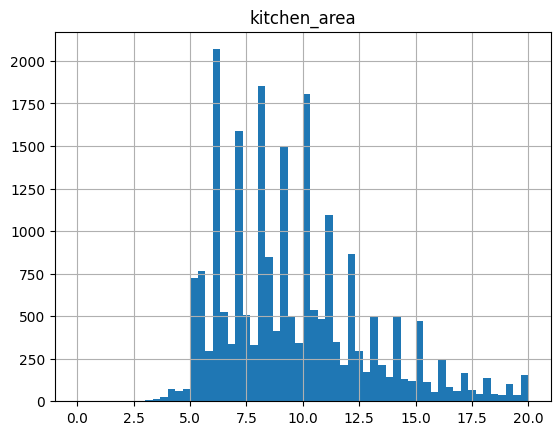

In [101]:
#посмотрим подробнее распределение, т.к. наибольшее кол-во объявлений в этом интервале:
df.hist('kitchen_area', bins=60, range=(0, 20)) 

**'balcony'** - кол-во балконов в основном 1 (при min 0, на Q3 -1), крайне редкое значение, оно же max - 5

array([[<AxesSubplot: title={'center': 'balcony'}>]], dtype=object)

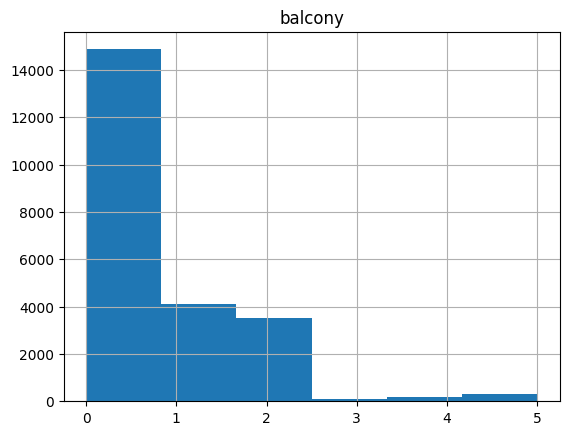

In [102]:
df.hist('balcony', bins=6)

In [103]:
#так как основная масса объявлений по квартирам без балконов и с 1-2 балконами, посмотрим сколько тех, что больше 3-х
print('Квартир с количеством балконов более 3х:', df.query('balcony > 3')['total_area'].count()) 
df['balcony'].value_counts() #сколько каких квартир по кол-ву балконов

Квартир с количеством балконов более 3х: 477


0.0    14874
1.0     4100
2.0     3539
5.0      298
4.0      179
3.0       77
Name: balcony, dtype: int64

Значительное кол-во квартир с балконами не только 1-2, но и более 3х, оставим все как есть.

**'days_exposition'** - Сколько дней объявление держится на сайте.
Среднее кол-во дней на сайте объявление висит 185 дней, это нормально (около 6 мес), третий квартиль Q3 - 235 дней, тоже вполне реально, но минимальное (0) и максимальное (1618) значения - выглядят не вполне реальными.
Если 0 - значит, объявление не опубликовано, таких быть не должно
1618 дней - это почти 4,5 года, для рынка недвижимости возможно такое, просто узнаем сколько таких

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23067 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23067 non-null  int64         
 1   last_price            23067 non-null  float64       
 2   total_area            23067 non-null  float64       
 3   first_day_exposition  23067 non-null  datetime64[ns]
 4   rooms                 23067 non-null  int64         
 5   ceiling_height        23067 non-null  float64       
 6   floors_total          23067 non-null  float64       
 7   living_area           23067 non-null  float64       
 8   floor                 23067 non-null  int64         
 9   is_apartment          23067 non-null  bool          
 10  studio                23067 non-null  bool          
 11  open_plan             23067 non-null  bool          
 12  kitchen_area          23067 non-null  float64       
 13  balcony         

In [105]:
print('Объявление не опубликовано:', df.query('days_exposition == 0')['total_area'].count()) 
print('Объявлению более 4 лет:', df.query('days_exposition > 365*4')['total_area'].count()) 
#df = df.query('days_exposition > 0')


Объявление не опубликовано: 0
Объявлению более 4 лет: 11


array([[<AxesSubplot: title={'center': 'days_exposition'}>]], dtype=object)

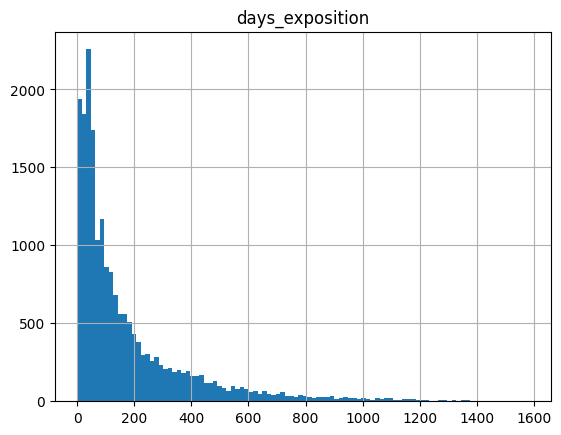

In [106]:
df.hist('days_exposition', bins=100)

<div class="alert alert-info" role="alert">

**Исправим: оставили в выборке не только с days_exposition > 0, но и с пропущенными значениями в этом столбце**
    
</div>   

In [107]:
# check
df.shape[0]

23067

In [108]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23067 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23067 non-null  int64         
 1   last_price            23067 non-null  float64       
 2   total_area            23067 non-null  float64       
 3   first_day_exposition  23067 non-null  datetime64[ns]
 4   rooms                 23067 non-null  int64         
 5   ceiling_height        23067 non-null  float64       
 6   floors_total          23067 non-null  float64       
 7   living_area           23067 non-null  float64       
 8   floor                 23067 non-null  int64         
 9   is_apartment          23067 non-null  bool          
 10  studio                23067 non-null  bool          
 11  open_plan             23067 non-null  bool          
 12  kitchen_area          23067 non-null  float64       
 13  balcony         

In [109]:
print('Объявление не опубликовано:', df.query('days_exposition == 0').count().unique()) 

Объявление не опубликовано: [0]


**'parks_around_3000' и 'ponds_around_3000'** - парков и водоемов в радиусе 3 км. В объявлениях - от 0 до 3х, все реально. Оставляем

**'airports_nearest', 'city_centers_nearest', 'parks_nearest' и 'ponds_nearest'** - расстояние в м до аэропорта, до центра города, до парка и до водоема. Все значения выглядят вполне реально. Кроме того, что в min расстоянии до аэропорта числится 0. Проверим сколько квартир ближе 3 км от аэропорта

In [110]:
print('Квартир от аэропорта ближе чем 3 км:', df.query('airports_nearest < 3000').count().unique()) 

Квартир от аэропорта ближе чем 3 км: [1 0]


In [111]:
# check
df.shape[0]

23067

array([[<AxesSubplot: title={'center': 'airports_nearest'}>]],
      dtype=object)

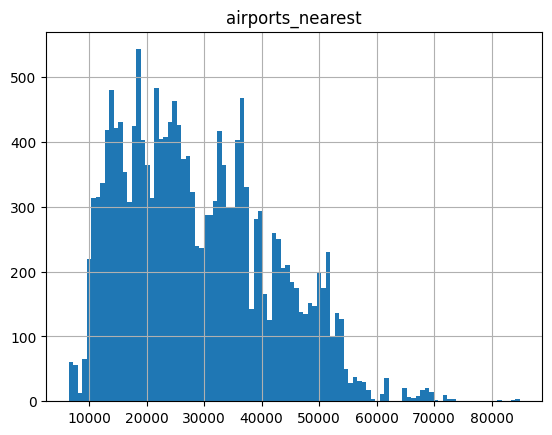

In [112]:
#удалим это объявление
df.drop(index=df.query('airports_nearest < 3000').index, inplace=True) 
df.hist('airports_nearest', bins=100)

In [113]:
# check
df.shape[0]

23066

Увидели неожиданный выброс, посмотрим поближе

array([[<AxesSubplot: title={'center': 'airports_nearest'}>]],
      dtype=object)

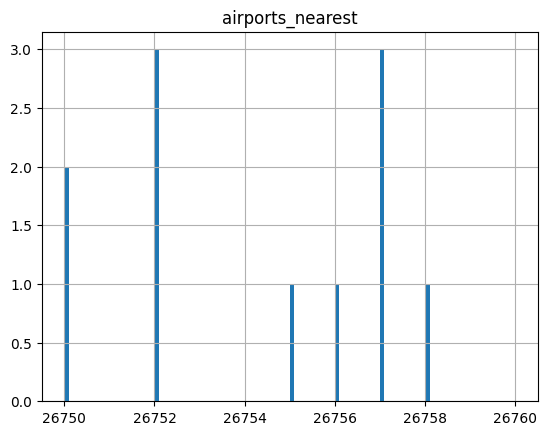

In [114]:
df.hist('airports_nearest', bins=100, range=(26750, 26760))

In [115]:
df.query('airports_nearest < 26758 and airports_nearest > 26756')

total_images  last_price  total_area first_day_exposition  rooms  \
538               2   8600000.0        91.0           2018-02-01      2   
8302             15   4100000.0        49.9           2017-08-14      2   
10337            10   3500000.0        31.0           2017-09-19      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
538              3.00           4.0      52.2067      1         False  ...   
8302             2.50           9.0      30.9000      8         False  ...   
10337            2.55           9.0      15.7000      9         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
538          15.834      0.0          Колпино           26757.0   
8302          6.000      1.0  Санкт-Петербург           26757.0   
10337         8.100      0.0  Санкт-Петербург           26757.0   

      city_centers_nearest  parks_around_3000  parks_nearest  \
538                32543.0                1.0         1443.0   
8302               13223.0                0.0            NaN   
10337              13223.0                0.0            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
538                  3.0          195.0            260.0  
8302                 0.0          503.0             14.0  
10337                0.0          503.0              5.0  

[3 rows x 22 columns]

Понятно! Это не выброс, это пропущеные значения по расстоянию до аэропорта, замененные на медианные, расстояние до центра у них тоже - медианное.
В следующем исследовании надо подумать, стоит ли подобные пропущенные значения заменять на медианные, или можно их оставить как есть. 

<div class="alert alert-info" role="alert">

Расстояние до центра 'city_centers_nearest' - убрали замены пропущенных данных, не стали заменять на медианные, также и кол-во дней публикации 'days_exposition' - оставили пропуски.
    
<div>

In [116]:
len(df)

23066

**Вывод:**
Провели анализ всех столбцов на предмет выбивающихся и аномальных значений, удалили явно не входящие в статистическую норму базы данных.
Удаляли много строк, сделаем индексацию корректной

In [117]:
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23066 non-null  int64         
 1   last_price            23066 non-null  float64       
 2   total_area            23066 non-null  float64       
 3   first_day_exposition  23066 non-null  datetime64[ns]
 4   rooms                 23066 non-null  int64         
 5   ceiling_height        23066 non-null  float64       
 6   floors_total          23066 non-null  float64       
 7   living_area           23066 non-null  float64       
 8   floor                 23066 non-null  int64         
 9   is_apartment          23066 non-null  bool          
 10  studio                23066 non-null  bool          
 11  open_plan             23066 non-null  bool          
 12  kitchen_area          23066 non-null  float64       
 13  balcony         

In [121]:
# check
data.rooms.value_counts().to_frame()

rooms
1   7923
2   7846
3   5743
4   1152
5    305
6     97

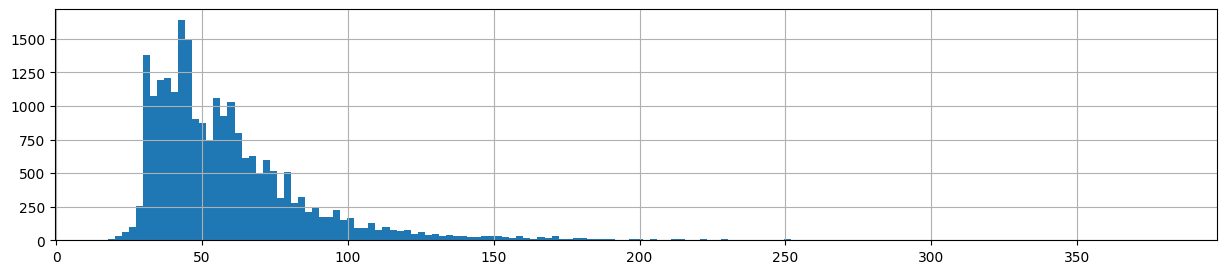

In [122]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

т.е. все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями
       

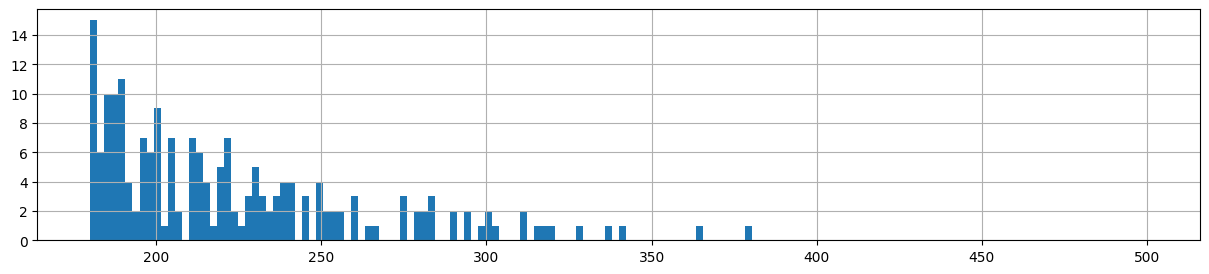

In [123]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

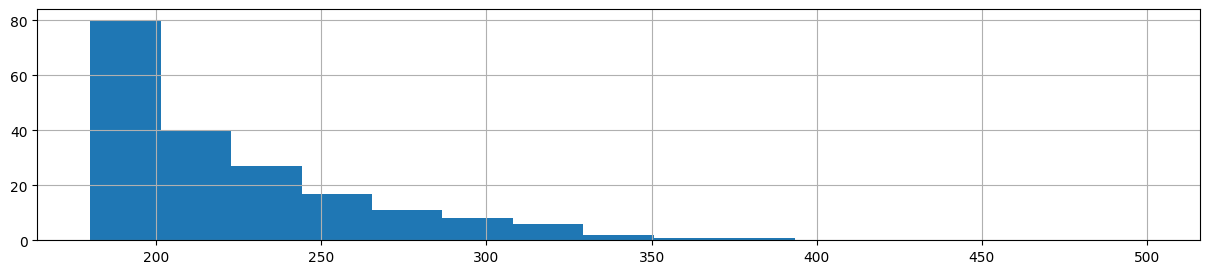

In [124]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

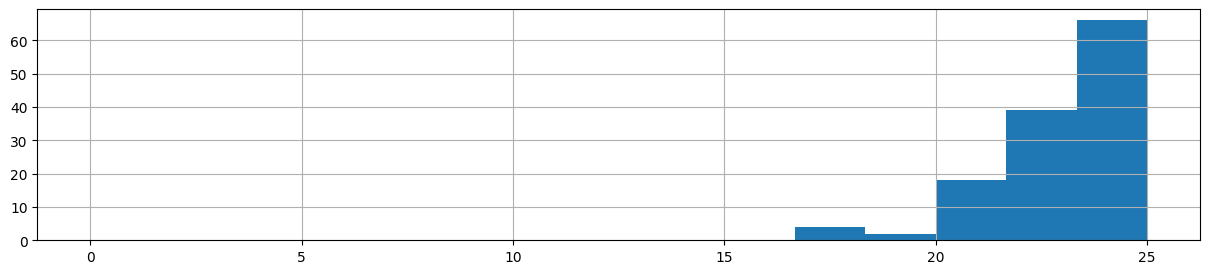

In [125]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [126]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

### 4.7. Посчитаем и добавим в таблицу новые столбцы.

In [127]:
#добавление нового столбца - цена квадратного метра
df['price_meter'] = df['last_price'] / df['total_area']
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0      51.0000      8         False  ...   
1            2.75          11.0      18.6000      1         False  ...   
2            2.55           5.0      34.3000      4         False  ...   
3            2.60          14.0      91.2183      9         False  ...   
4            3.03          14.0      32.0000     13         False  ...   

   balcony    locality_name  airports_nearest  city_centers_nearest  \
0      0.0  Санкт-Петербург           18863.0               16028.0   
1      2.0   поселок Шушары           12817.0               18603.0   
2      0.0  Санкт-Петербург           21741.0               13933.0   
3      0.0  Санкт-Петербург           28098.0                6800.0   
4      0.0  Санкт-Петербург           31856.0                8098.0   

  parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0               1.0          482.0                2.0          755.0   
1               0.0            NaN                0.0          503.0   
2               1.0           90.0                2.0          574.0   
3               2.0           84.0                3.0          234.0   
4               2.0          112.0                1.0           48.0   

   days_exposition    price_meter  
0              NaN  120370.370370  
1             81.0   82920.792079  
2            558.0   92785.714286  
3            424.0  408176.100629  
4            121.0  100000.000000  

[5 rows x 23 columns]

In [128]:
#добавление конкретных значений к дате публикации - день недели, месяц, год
df['weekday_exp'] = df['first_day_exposition'].dt.weekday
df['month_exp'] = df['first_day_exposition'].dt.month
df['year_exp'] = df['first_day_exposition'].dt.year
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0      51.0000      8         False  ...   
1            2.75          11.0      18.6000      1         False  ...   
2            2.55           5.0      34.3000      4         False  ...   
3            2.60          14.0      91.2183      9         False  ...   
4            3.03          14.0      32.0000     13         False  ...   

   city_centers_nearest  parks_around_3000  parks_nearest  ponds_around_3000  \
0               16028.0                1.0          482.0                2.0   
1               18603.0                0.0            NaN                0.0   
2               13933.0                1.0           90.0                2.0   
3                6800.0                2.0           84.0                3.0   
4                8098.0                2.0          112.0                1.0   

  ponds_nearest  days_exposition    price_meter  weekday_exp  month_exp  \
0         755.0              NaN  120370.370370            3          3   
1         503.0             81.0   82920.792079            1         12   
2         574.0            558.0   92785.714286            3          8   
3         234.0            424.0  408176.100629            4          7   
4          48.0            121.0  100000.000000            1          6   

   year_exp  
0      2019  
1      2018  
2      2015  
3      2015  
4      2018  

[5 rows x 26 columns]

In [129]:
#добавление типа этажа квартиры - первый, последний, другой
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_type, axis=1)
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0      51.0000      8         False  ...   
1            2.75          11.0      18.6000      1         False  ...   
2            2.55           5.0      34.3000      4         False  ...   
3            2.60          14.0      91.2183      9         False  ...   
4            3.03          14.0      32.0000     13         False  ...   

   parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                1.0          482.0                2.0          755.0   
1                0.0            NaN                0.0          503.0   
2                1.0           90.0                2.0          574.0   
3                2.0           84.0                3.0          234.0   
4                2.0          112.0                1.0           48.0   

  days_exposition    price_meter  weekday_exp  month_exp  year_exp  floor_type  
0             NaN  120370.370370            3          3      2019      другой  
1            81.0   82920.792079            1         12      2018      первый  
2           558.0   92785.714286            3          8      2015      другой  
3           424.0  408176.100629            4          7      2015      другой  
4           121.0  100000.000000            1          6      2018      другой  

[5 rows x 27 columns]

In [130]:
df.query('floor == 0 and floor < 0 ')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition, price_meter, weekday_exp, month_exp, year_exp, floor_type]
Index: []

[0 rows x 27 columns]

<div class="alert alert-info" role="alert">
    
Проверили, есть ли аномальные значения этажей в доме 'floor' - нулевые и отрицательные.
    
Таких нет.
    
<div>

<div class="alert alert-info" role="alert">
    
Приведем значения city_centers_nearest_km к целым числам, округленным.
    
<div>

In [132]:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000)
df.loc[df['city_centers_nearest_km'].isna(), 'city_centers_nearest_km'] = 0

In [133]:
#расстояние до центра города в километрах переводим в км и округляем до целых чисел
#df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000)
try:
    df['city_centers_nearest_km'] = df['city_centers_nearest_km'].round(0).astype(int)
    
except Exception as e: 
    print(e)

df['city_centers_nearest_km'].head()

0    16
1    19
2    14
3     7
4     8
Name: city_centers_nearest_km, dtype: int32

In [134]:
#добавим столбец соотношения жилой и общей площади, в %
df['living_ratio_%'] = ((df['living_area'] / df['total_area']) * 100).round(2)
df['living_ratio_%'].head()

0    47.22
1    46.04
2    61.25
3    57.37
4    32.00
Name: living_ratio_%, dtype: float64

In [135]:
#аналогично - соотношение площади кухни к общей площади, в %
df['kitchen_ratio_%'] = ((df['kitchen_area'] / df['total_area']) * 100).round(2)
df['kitchen_ratio_%'].head()

0    23.15
1    27.23
2    14.82
3    17.40
4    41.00
Name: kitchen_ratio_%, dtype: float64

In [136]:
# добавим еще столбец категорий по общей площади квартир:
def area_type(row):
    if row['total_area'] > 12 and row['total_area'] <=30:
        return 'маленькая 12-30'
    if row['total_area'] > 30 and row['total_area'] <=50:
        return 'небольшая 30-50'
    if row['total_area'] > 50 and row['total_area'] <=100:
        return 'средняя 50-100'
    if row['total_area'] > 100 and row['total_area'] <=200:
        return 'большая 100-200'
    if row['total_area'] > 200 and row['total_area'] <=300:
        return 'очень большая 200-300'
    if row['total_area'] > 300:
        return 'огромная от 300'
     
df['area_type'] = df.apply(area_type, axis=1)
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0      51.0000      8         False  ...   
1            2.75          11.0      18.6000      1         False  ...   
2            2.55           5.0      34.3000      4         False  ...   
3            2.60          14.0      91.2183      9         False  ...   
4            3.03          14.0      32.0000     13         False  ...   

   days_exposition    price_meter  weekday_exp  month_exp year_exp  \
0              NaN  120370.370370            3          3     2019   
1             81.0   82920.792079            1         12     2018   
2            558.0   92785.714286            3          8     2015   
3            424.0  408176.100629            4          7     2015   
4            121.0  100000.000000            1          6     2018   

   floor_type  city_centers_nearest_km  living_ratio_%  kitchen_ratio_%  \
0      другой                       16           47.22            23.15   
1      первый                       19           46.04            27.23   
2      другой                       14           61.25            14.82   
3      другой                        7           57.37            17.40   
4      другой                        8           32.00            41.00   

         area_type  
0  большая 100-200  
1  небольшая 30-50  
2   средняя 50-100  
3  большая 100-200  
4   средняя 50-100  

[5 rows x 31 columns]

**Вывод:**

В датафрейм по базе данных добавлены новые столбцы:
- цена одного квадратного метра 'price_meter'
- день недели публикации объявления 'weekday_exp' (0 - понедельник, 1 - вторник, 2 - среда, 3 - четверг, 4 - пятница, 5 - суббота, 6 - воскресенье)
- месяц публикации объявления 'month_exp'
- год публикации объявления 'year_exp'
- тип/категория этажа каждой квартиры 'floor_type' (первый, последний и другой)
- соотношение между жилой и общей площадью, в %
- соотношение между площадью кухни и общей площадью, в %
- тип категории квартир по общей площади (пригодится нам позже)

Значения удаленности от центра города 'city_centers_nearest' перевдены из м в км и окгруглены до целых чисел

## 5. Исследовательский анализ данных

### 5.1. Исследуем значения: площадь (общая, жилая, кухни), стоимость квартир, число комнат в квартире, высота потолков, этажность, общее кол-во этажей в доме.

Рассмотрим тенденции предложений на рынке жилья в Санкт-Петербурге и Ленинградской области

In [137]:
df[['total_area', 'living_area', 'living_ratio_%', 'kitchen_area', 'kitchen_ratio_%',
    'last_price', 'rooms', 'ceiling_height']].describe()

total_area   living_area  living_ratio_%  kitchen_area  \
count  23066.000000  23066.000000     23066.00000  23066.000000   
mean      59.273248     33.890122        56.34562     10.357296   
std       29.360474     18.776740         9.76059      5.241989   
min       17.600000     10.000000        14.13000      3.062400   
25%       40.200000     19.000000        50.00000      7.000000   
50%       52.000000     30.000000        57.37000      9.000000   
75%       69.300000     42.000000        62.82000     11.920000   
max      380.000000    200.000000        90.84000     58.400000   

       kitchen_ratio_%    last_price         rooms  ceiling_height  
count     23066.000000  2.306600e+04  23066.000000    23066.000000  
mean         18.590290  6.141958e+06      2.061866        2.704735  
std           6.770574  5.905801e+06      0.987297        0.226089  
min           2.920000  4.300000e+05      1.000000        2.500000  
25%          13.680000  3.450000e+06      1.000000        2.550000  
50%          17.400000  4.650000e+06      2.000000        2.650000  
75%          22.477500  6.750000e+06      3.000000        2.750000  
max          72.460000  9.900000e+07      6.000000        5.500000

По всем перечисленным критериям в разделе 3.6 мы делали гистограммы, описание, удаление выбросов, выводы.
Посмотрим дополнительно количественные характеристики

In [138]:
#сколько каких квартир по общей площади, выведем 10 строк по количеству самых маленьких по площади и 10 по самым большим
print(df['total_area'].sort_values().head(10))
df['total_area'].sort_values(ascending=False).head(10)

8916     17.60
21228    17.78
20173    18.00
18816    18.00
12552    18.50
22572    18.90
8639     20.00
10677    20.00
17397    20.00
3963     20.00
Name: total_area, dtype: float64


4902     380.0
19445    365.0
20275    342.0
15769    336.0
14221    327.2
10795    320.0
153      317.0
7458     315.0
7726     312.0
9313     312.0
Name: total_area, dtype: float64

**Было**
Самые маленькие квартиры в продаже - общей площадью 12 кв.м, и таких около 20 000 объявлений. Может, быть, это все апартаменты?

<div class="alert alert-info" role="alert">
    
После исправления замен: Самые маленькие квартиры в продаже с общей площадью 17,6 кв.м, и таких всего около 8916 объявлений.
    
<div>

In [139]:
#посмотрим сколько всего апартаментов в объявлениях
print(df.loc[df['is_apartment'] == True]['total_area'].count())
print(df.loc[df['is_apartment'] == False]['total_area'].count())
print((df.loc[df['is_apartment'] == True]['total_area'].count() / len(df) * 100).round(2))
df['is_apartment'].describe()

45
23021
0.2


count     23066
unique        2
top       False
freq      23021
Name: is_apartment, dtype: object

**Было** 
Квартир-апартаментов всего 45, это 0,19% из всего кол-ва квартир. 
Может, такое большое кол-во маленьких квартир - это студии?

In [140]:
df.query('is_apartment == True')['is_apartment'].count()

45

In [141]:
print(df.loc[df['studio'] == True]['total_area'].count())
print(df.loc[df['studio'] == False]['total_area'].count())
df.loc[df['studio'] == True]['total_area'].count() / len(df) * 100

0
23066


0.0

**Было**
Квартир-студий 144, тоже очень маленькая доля - 0,61%.
Сколько же квартир -"маломерок", от 12 до 30 кв.м., и других по величине площади?

In [142]:
df.query('studio == True')['studio'].count()

0

<div class="alert alert-info" role="alert">
    
Квартир-студий в выборке не осталось
    
<div>

In [143]:
# чтобы показать распределение квартир по группам площадей, как раз пригодится столбец 'area_type'
df['area_type'].value_counts() 

средняя 50-100           10531
небольшая 30-50          10185
большая 100-200           1550
маленькая 12-30            683
очень большая 200-300      106
огромная от 300             11
Name: area_type, dtype: int64

<AxesSubplot: >

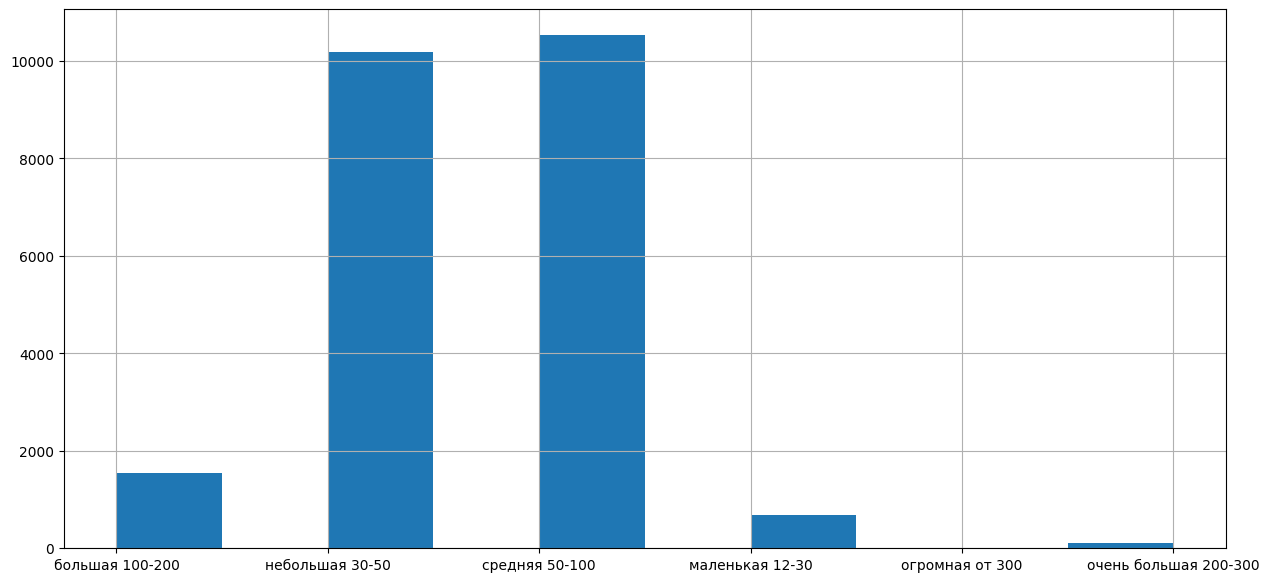

In [144]:
#посмотрим распределение квартир по категориям площади на гистограмме
df['area_type'].hist(bins=10, figsize=(15, 7))

Наибольшее кол-во квартир в подброке - небольшой и средней площади, то есть от 30 до 100 кв.м.
С этой выборкой и стоит посоветовать коллегам работать в дальнейшем.

In [145]:
#то же что по общей площади - выведем по жилой площади
print(df['living_area'].sort_values().head(10))
df['living_area'].sort_values(ascending=False).head(10)

10244    10.0
7492     10.0
7618     10.0
13743    10.0
7870     10.0
7260     10.0
20833    10.0
21333    10.0
4879     10.0
17804    10.0
Name: living_area, dtype: float64


9978     200.0
4902     198.0
7726     194.0
4077     193.5
10795    190.0
20275    187.0
8514     184.9
2949     184.0
153      183.0
7458     182.0
Name: living_area, dtype: float64

Text(0, 0.5, 'Количество квартир')

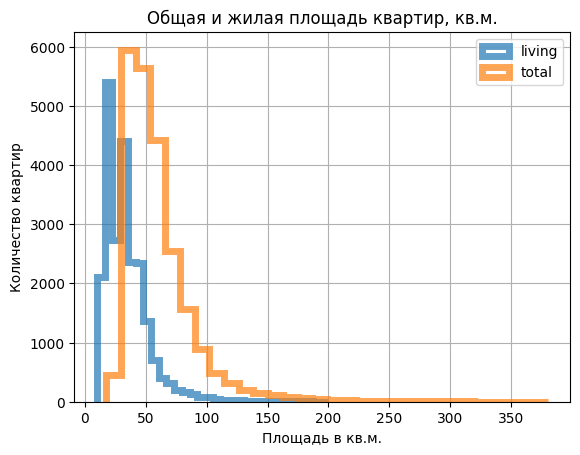

In [146]:
#посмотрим соотношение жилой и общей площади квартир на графиках
#living_area_hist = df['living_area'].plot(kind='hist', y='total_area', histtype='step', bins=30, grid=True, legend=True, 
                #alpha=1, linewidth=5)                        
                
#total_area_hist = df['total_area'].plot(kind='hist', y='total_area', 
                #histtype='step',bins=30,grid=True, legend=True,alpha=0.7,
                #title='Общая и жилая площадь квартир, кв.м.',linewidth=5, ax=living_area_hist
                 #).set(xlabel='площадь в кв.м.', ylabel='количество объектов')
        
ax  = df['living_area'].plot(kind='hist', y='total_area', histtype='step', bins=30, range=(10, 200),
    alpha=0.7, linewidth=5, label='living', grid=True, legend=True)

df['total_area'].plot(kind='hist', y='total_area', histtype='step', bins=30, alpha=0.7, linewidth=5, label='total', 
    ax = ax, grid=True, legend=True,)

plt.title('Общая и жилая площадь квартир, кв.м.')
plt.xlabel('Площадь в кв.м.')
plt.ylabel('Количество квартир')

Наибольшее кол-во квартир в продаже - общей площади 25-75 кв.м. с жилой площадью 20-50 кв.м

Text(0, 0.5, 'Количество квартир')

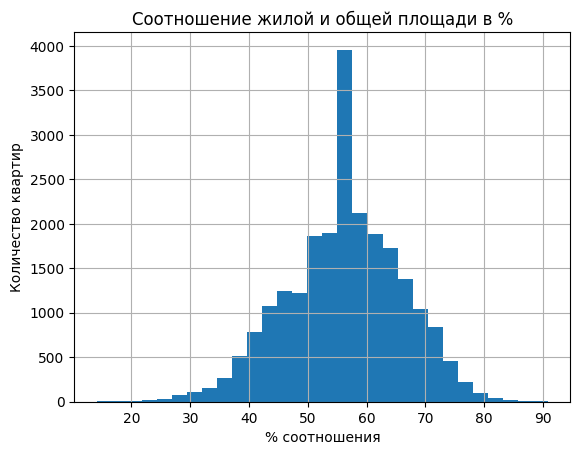

In [147]:
#соотношение жилой и общей площади в %:
df['living_ratio_%'].hist(bins=30)
plt.title('Соотношение жилой и общей площади в %')
plt.xlabel('% соотношения')
plt.ylabel('Количество квартир')

Процент соотношения выглядит нормальным - 50-70% общей площади занимает жилая

Text(0, 0.5, 'Количество квартир')

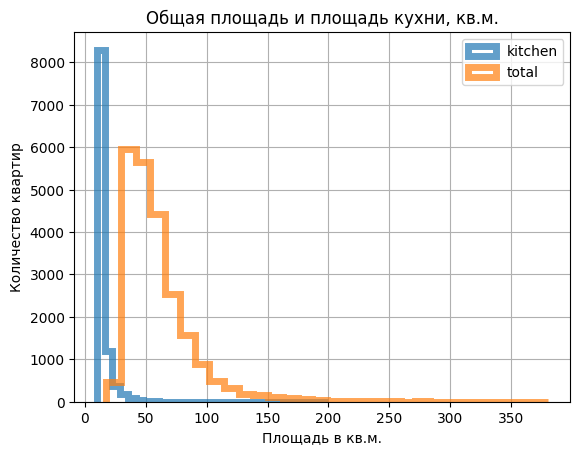

In [148]:
#проделаем такую же визуализацию по отношению к площади кухни
ax  = df['kitchen_area'].plot(kind='hist', y='total_area', histtype='step', bins=30, range=(10, 200),
    alpha=0.7, linewidth=5, label='kitchen', grid=True, legend=True)

df['total_area'].plot(kind='hist', y='total_area', histtype='step', bins=30, alpha=0.7, linewidth=5, label='total', 
    ax = ax, grid=True, legend=True,)

plt.title('Общая площадь и площадь кухни, кв.м.')
plt.xlabel('Площадь в кв.м.')
plt.ylabel('Количество квартир')

In [149]:
df['kitchen_area'].describe().round(2)

count    23066.00
mean        10.36
std          5.24
min          3.06
25%          7.00
50%          9.00
75%         11.92
max         58.40
Name: kitchen_area, dtype: float64

При наиболее распространенной общей площади 25-75 кв.м. площадь кухни составляет 3-9 кв.м., это среднестатистические квартиры эконом-класса

Text(0, 0.5, 'Количество квартир')

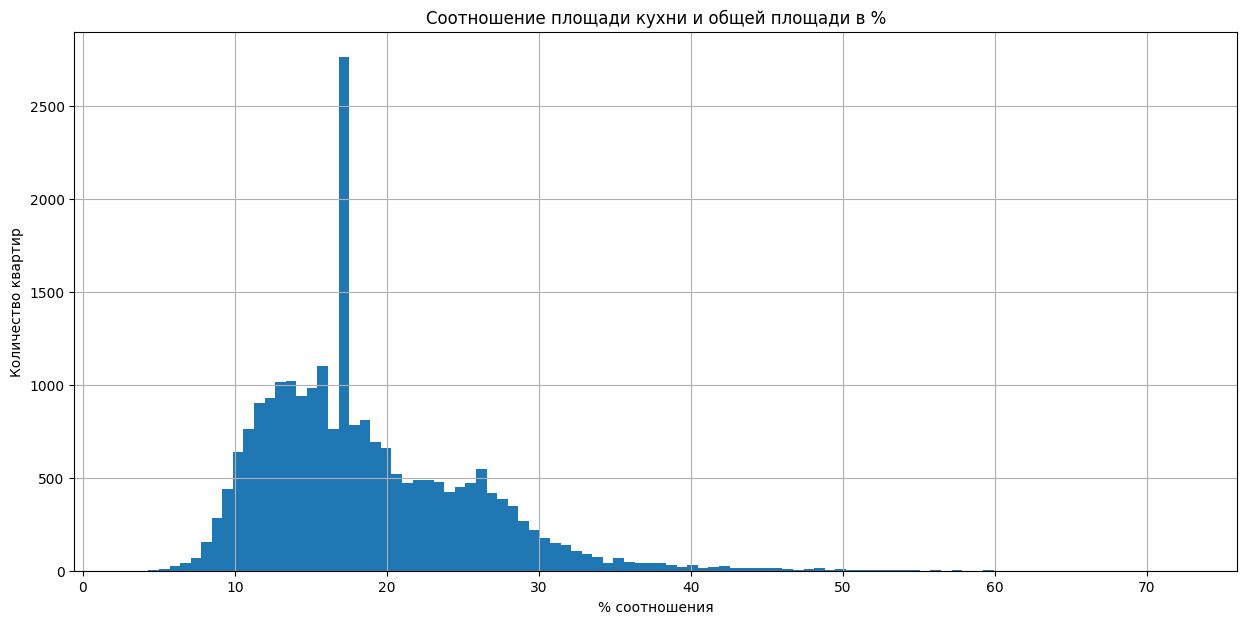

In [150]:
#соотношение площади кухни и общей площади в %:
df['kitchen_ratio_%'].hist(bins=100, figsize = (15, 7))
plt.title('Соотношение площади кухни и общей площади в %')
plt.xlabel('% соотношения')
plt.ylabel('Количество квартир')

Соотношение площади кухни к общей площади тоже нормально - максимум - 10-15% занимает кухня в квартире от общей площади.

In [151]:
print(len(df)) # всего объявлений в базе (после предыдущих корректировок)
print(round(len(df) * 0.8)) # 80% от базы - по принципу Парето - что целесообразнее оставить для реального анализа
df_sample_1 = df.loc[df['area_type'] == 'средняя 50-100']
df_sample_2 = df.loc[df['area_type'] == 'небольшая 30-50']
df_sample_3 = df.loc[df['area_type'] == 'большая 100-200']
# выборка, которую желательно оставить для дальнейшего анализа (подавляющее большинство объявлений, 
#занимающее как минимум 80% от всего кол-ва):
df_sample = df_sample_1.count().unique() + df_sample_2.count().unique() + df_sample_3.count().unique()
print('средняя 50-100:', df_sample_1.area_type.count())#.unique())
print('небольшая 30-50:', df_sample_2.area_type.count())#.unique())
print('большая 100-200:', df_sample_3.area_type.count())#.unique())
df_sample

23066
18453
средняя 50-100: 10531
небольшая 30-50: 10185
большая 100-200: 1550


array([22266, 17117, 17137,  7596, 19266], dtype=int64)

In [152]:
# создадим новую переменную - нормального датафрейма - для дальнейшей работы с ней
# переписывать старую не будем, оставим, может понадобится для сравнения
df_norm = df.query('total_area >= 30' and 'total_area <= 200')
print(len(df_norm))
print(len(df)-len(df_norm))
(((len(df)-len(df_norm)) / len(df) *100))#.round(2)

22949
117


0.507240093644325

**Вывод:**

Из выведенных гистограммах площадей и соотношений их можно сделать вывод, что для дальнейшего анализа есть смысл оставить адекватный датасет из квартир, общее число объявлений по которым составляет подавляющее большинство всей базы данных - небольших и средних, с площадью от 30 до 100 кв.м., можно оставить и большие, от 100 до 200 кв. м. Квартиры же маленькие (12-30 кв.м.), очень большие (200-300 кв.м.) и огромные (более 300 кв.м.) - лучше удалить, они не будут нести статистической пользы (база данных стала меньше всего на 88 объявлений, это 0,44%)

Ранее, в разделе 3.6 мы анализировали:
- высоту потолков
- количество комнат
- этажность квартиры
- общее количество этажей в доме

### 5.2. Исследуем тип этажа квартиры (первый, последний, другой).

Ранее, в разделе 3.7 мы добавили новый столбец по типу этажа. Посмотрим распределение квартир по этому параметру

In [153]:
print(df['floor_type'].value_counts() )
print('Доля квартир на 1ом этаже:', "{:.2%}".format(len(df.query('floor_type == "первый"')) / len(df['floor_type'])))
print('Доля квартир на последнем этаже:', "{:.2%}".format(len(df.query('floor_type == "последний"')) / len(df['floor_type'])))
print('Доля квартир на средних этажах:', "{:.2%}".format(len(df.query('floor_type == "другой"')) / len(df['floor_type'])))

другой       16963
последний     3251
первый        2852
Name: floor_type, dtype: int64
Доля квартир на 1ом этаже: 12.36%
Доля квартир на последнем этаже: 14.09%
Доля квартир на средних этажах: 73.54%


<AxesSubplot: >

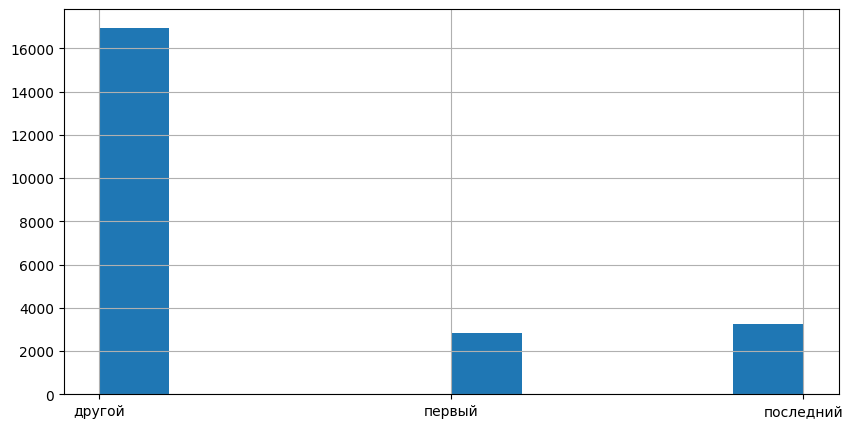

In [154]:
df['floor_type'].hist(bins=10, figsize=(10, 5))

**Вывод:** На первых и последних этажах предлагается 12% и 14% от всего кол-ва квартир соответственно, а основная масса, 74% - средние этажи.

<div class="alert alert-info" role="alert">

    
Посмотрим на гистограммы в новой выборке, которую мы сформировали - df_norm
    
<div>

In [155]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    df_norm[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

### 5.3. Гистограммы новой выборки

**'total_area' - общая площадь**

<AxesSubplot: >

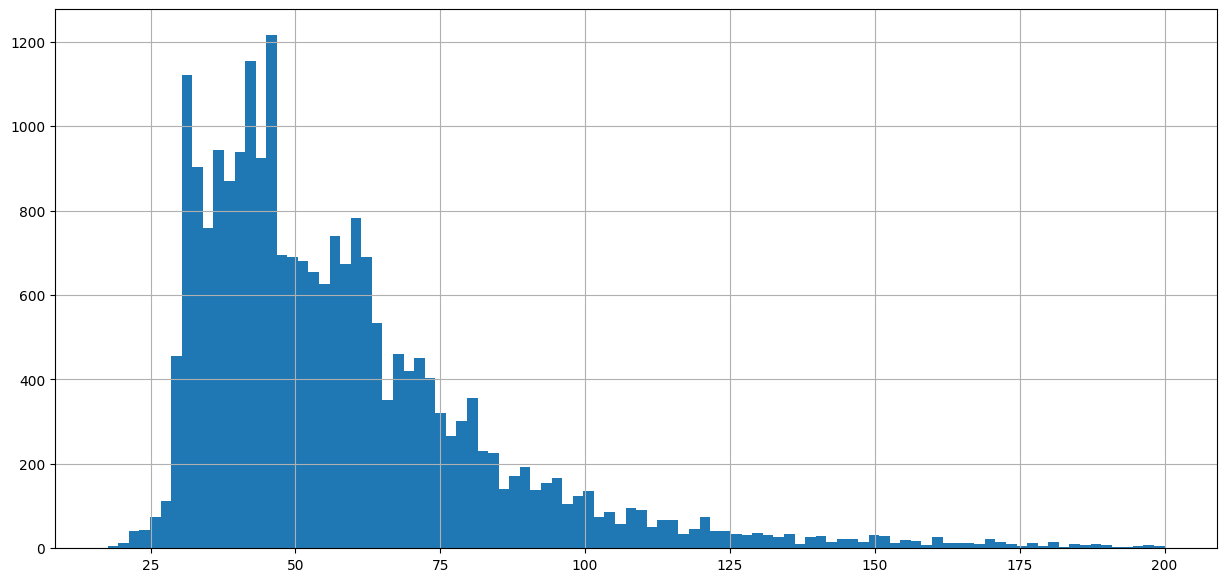

In [156]:
df_norm['total_area'].hist(bins = 100, figsize = (15, 7))

In [157]:
round(len(df_norm.query('total_area > 30 and total_area < 100')) / len(df_norm['total_area']), 2)

0.9

<div class="alert alert-info" role="alert">
    
90% всех объявлений - квартиры с общей площадью от 30 до 100 кв.м.
    
<div>

**'total_area' - жилая площадь**

<AxesSubplot: >

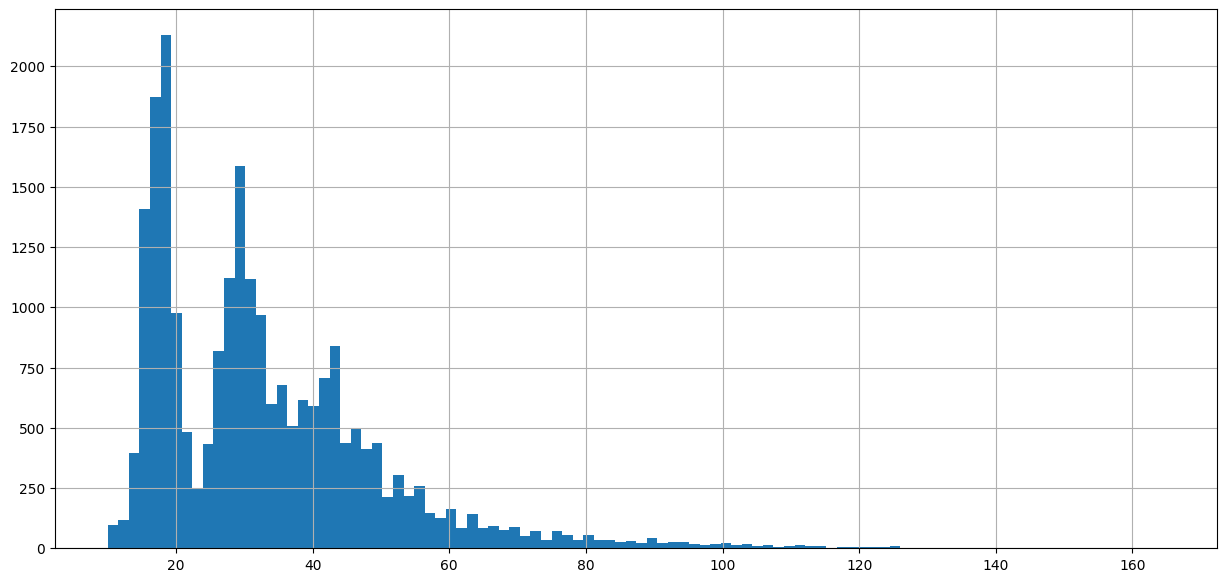

In [158]:
df_norm['living_area'].hist(bins = 100, figsize = (15, 7))

<div class="alert alert-info" role="alert">
    
В основном, жилая площадь составляет от 12 до 50 кв.м.
    
<div>

**'kitchen_area' - площадь кухни**

<AxesSubplot: >

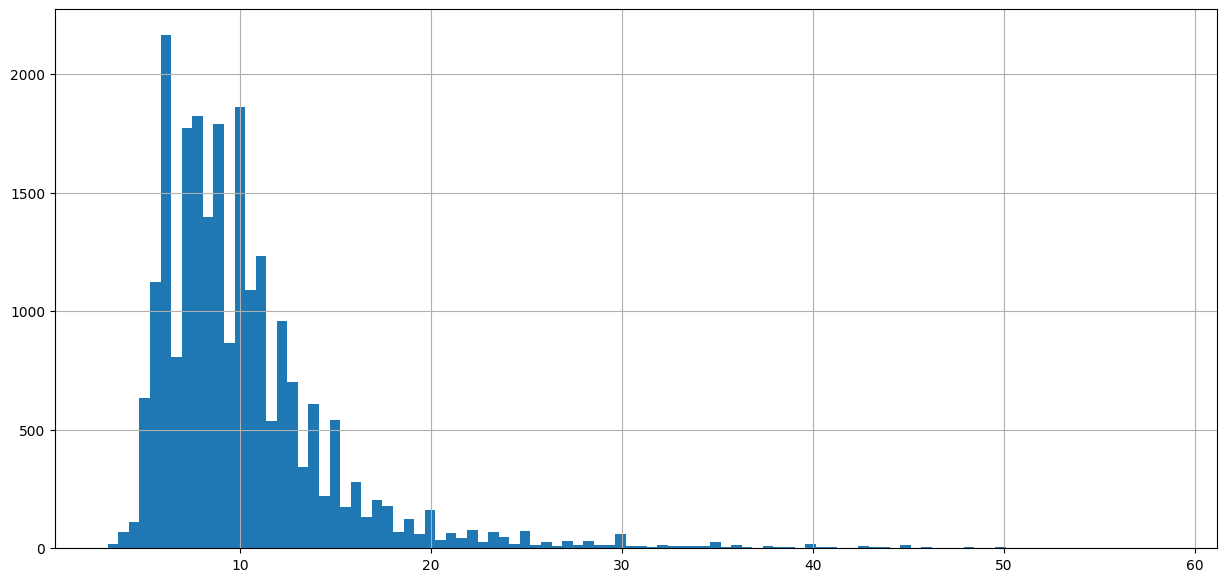

In [159]:
df_norm['kitchen_area'].hist(bins = 100, figsize = (15, 7))

<div class="alert alert-info" role="alert">
    
Площадь кухни в среднем занимает от 5 до 12 кв.м.
    
<div>

**'last_price' цена объекта**

<AxesSubplot: >

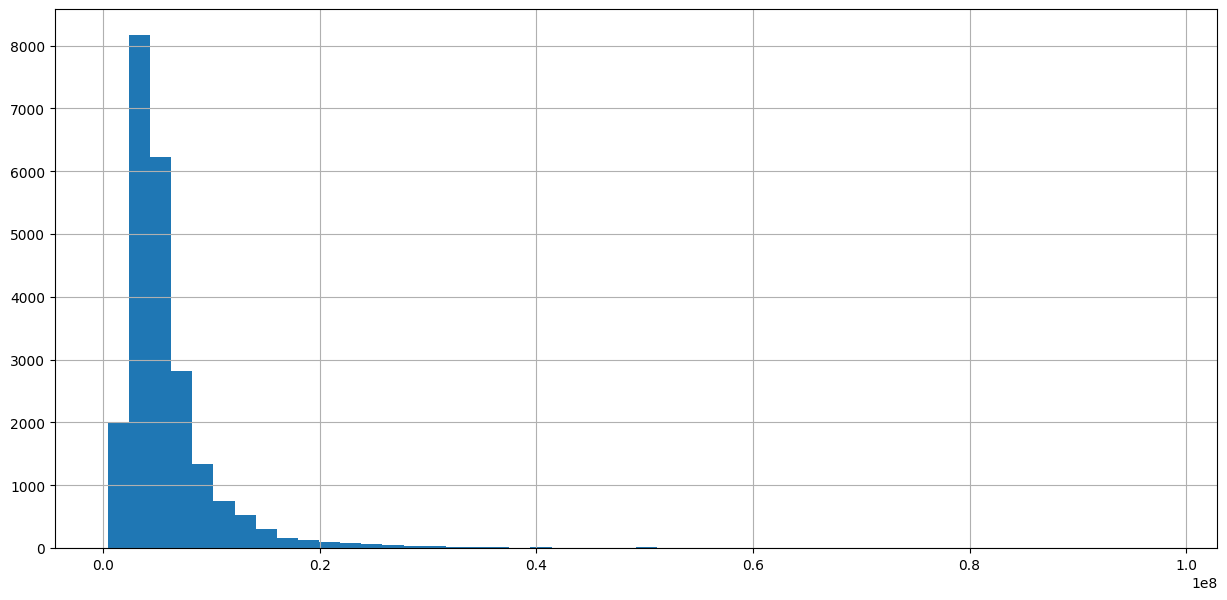

In [160]:
df_norm['last_price'].hist(bins = 50, figsize = (15, 7))

In [161]:
df_norm['last_price'].describe()

count    2.294900e+04
mean     5.981150e+06
std      5.266219e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.626540e+06
75%      6.700000e+06
max      9.800000e+07
Name: last_price, dtype: float64

In [162]:
round(len(df_norm.query('last_price > 3.4e+6 and last_price < 6.45e+6')) / len(df_norm['last_price']), 2)


0.48

<div class="alert alert-info" role="alert">
    
Наибольшее кол-во объявлений (около 50%) со стоимостью 3,4-6,45 млн, минимальная (в новой выборке) 430 тыс руб, максимальная - 98 млн руб
    
<div>

**'rooms' - количество комнат**

<AxesSubplot: >

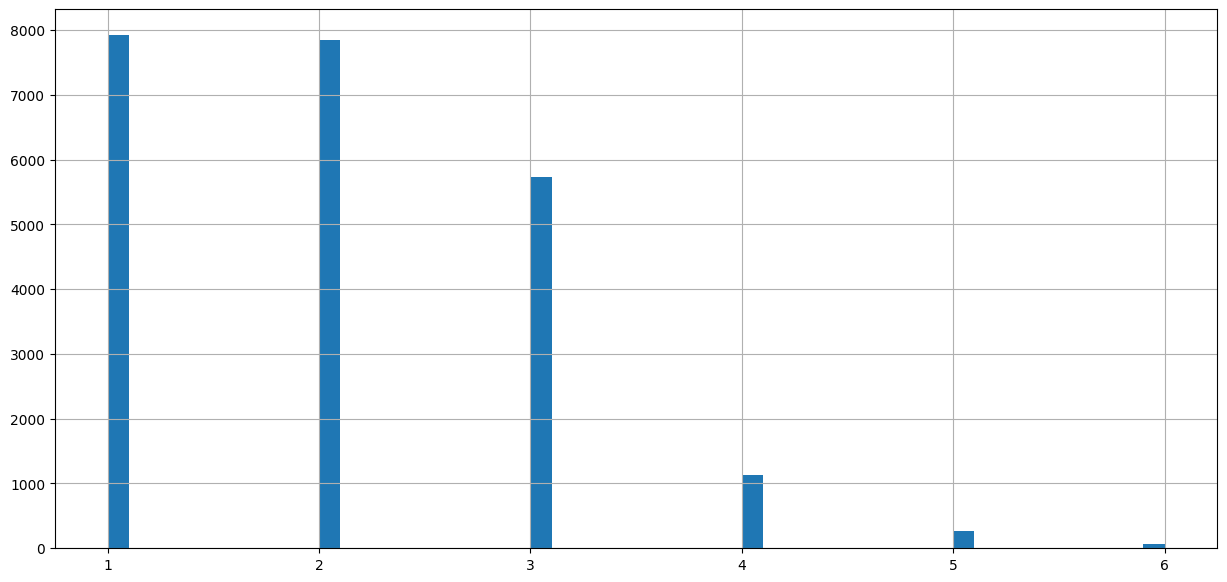

In [163]:
df_norm['rooms'].hist(bins = 50, figsize = (15, 7))

In [164]:
print(round(len(df_norm.query('rooms == 1')) / len(df_norm['rooms']), 2))
print(round(len(df_norm.query('rooms == 2')) / len(df_norm['rooms']), 2))
print(round(len(df_norm.query('rooms < 3')) / len(df_norm['rooms']), 2))
print(round(len(df_norm.query('rooms == 3')) / len(df_norm['rooms']), 2))
round(len(df_norm.query('rooms > 3')) / len(df_norm['rooms']), 2)

0.35
0.34
0.69
0.25


0.06

<div class="alert alert-info" role="alert">
    

Из всей базы квартир, оставшейся для анализа (не студий/не свободной планировки) больше всего в базе одно- и двухкомнатных квартир, около 70% (36% и 34% соответственно)
    
Трехкомнатных - 24%
    
Остальных - всего 6% (4-6 комнат)
    
<div>

**'ceiling_height'** - высота потолков

<AxesSubplot: >

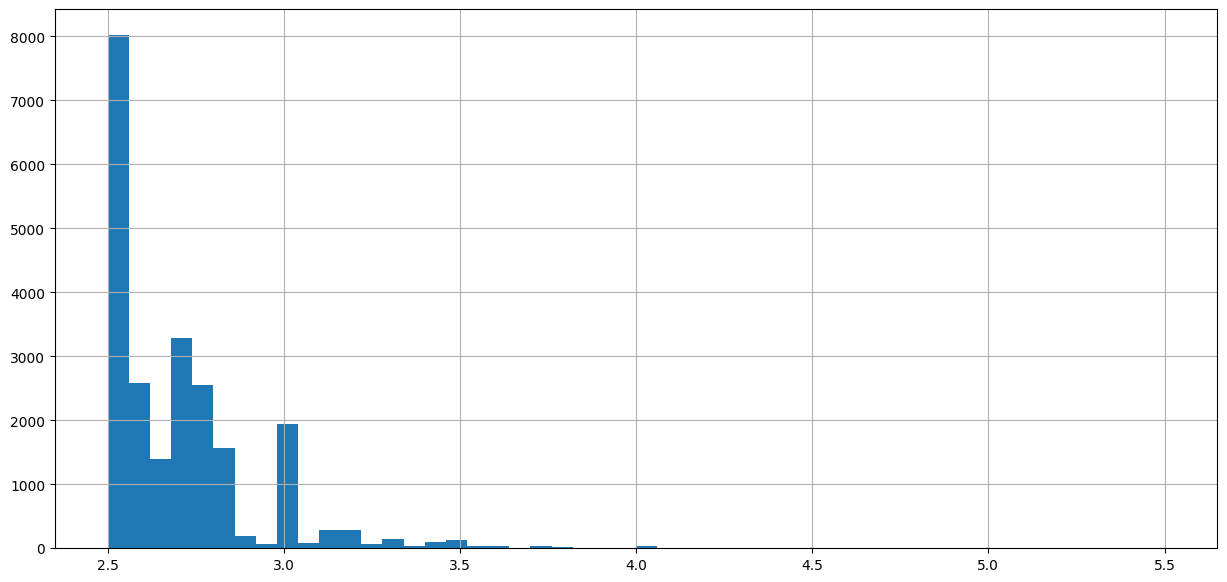

In [165]:
df_norm['ceiling_height'].hist(bins = 50, figsize = (15, 7))

<div class="alert alert-info" role="alert">
    

В "нормальной" базе квартир подавляющее большинство потолков - 2,5 м. Это нормально, по СНИПу требуется не меньше.
    
<div>

**'floor'** - этаж квартиры

<AxesSubplot: >

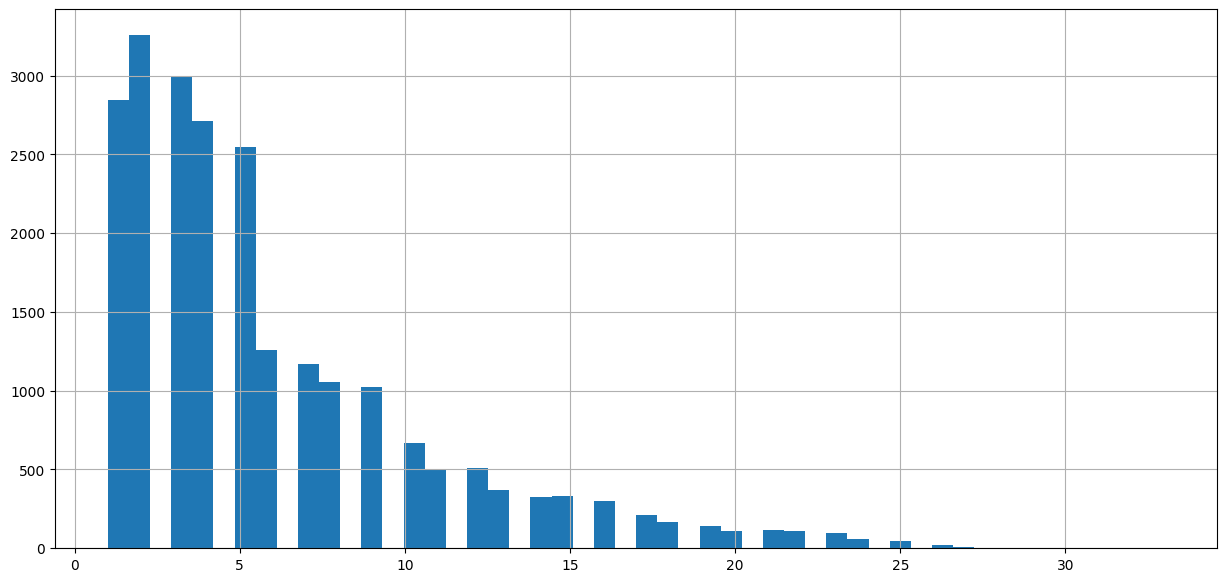

In [166]:
df_norm['floor'].hist(bins = 50, figsize = (15, 7))

In [167]:
print(round(len(df_norm.query('floor > 1 and floor <= 9')) / len(df_norm['floor']), 2))
print(round(len(df_norm.query('floor >= 10 and floor <= 15')) / len(df_norm['floor']), 2))
round(len(df_norm.query('floor >= 16 and floor < 36')) / len(df_norm['floor']), 2)

0.7
0.12


0.06

<div class="alert alert-info" role="alert">
    

В приведенной к норме базе квартир больше всего объявлений по квартирам, продающимся на этажах со 2 по 9, таких 69%.
Квартир на этажах с 10 по 15 этаж, уже гораздо меньше - 12%.
Еще меньше объявлений по квартирам на высоких этажах, с 16 по 35 этаж , их всего 6%.
    
Это понятно, объясняется тем, что даже новостройки, строящиеся в достаточном количестве в Санкт-Петербурге, строятся в основном средней этажности, а если в центре - то до 9 этажа, поэтому и в продаже квартир до 9 этажа больше, чем на более высоких этажах.

    
<div>

**'floor_type'- тип этажа квартиры («первый», «последний», «другой»)**

<AxesSubplot: >

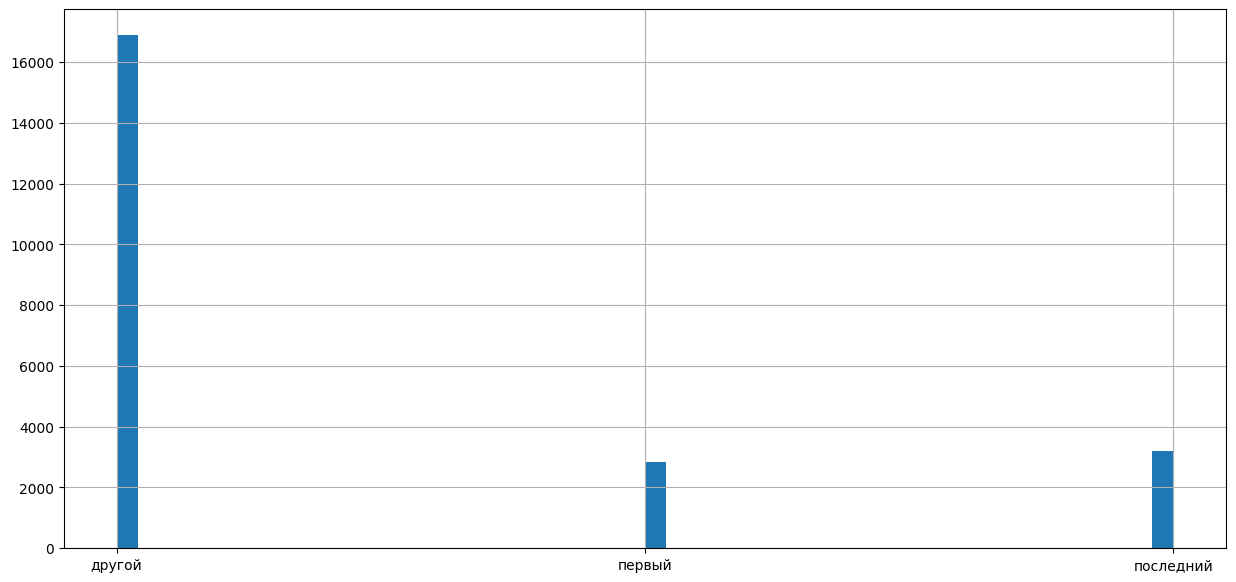

In [168]:
df_norm['floor_type'].hist(bins = 50, figsize = (15, 7))

In [169]:
print(round(len(df_norm.query('floor_type == "другой"')) / len(df_norm['floor_type']), 2))
print(round(len(df_norm.query('floor_type == "первый"')) / len(df_norm['floor_type']), 2))
round(len(df_norm.query('floor_type == "последний"')) / len(df_norm['floor_type']), 2)

0.74
0.12


0.14

<div class="alert alert-info" role="alert">
    

В "нормальной" базе квартир больше всего объявлений по квартирам, продающимся на средних этажах домов, таких 74%.
На первых этажах продается 12% квартир, на последних - 14%.

    
<div>

**'floors_total' - Общее количество этажей в доме**

<AxesSubplot: >

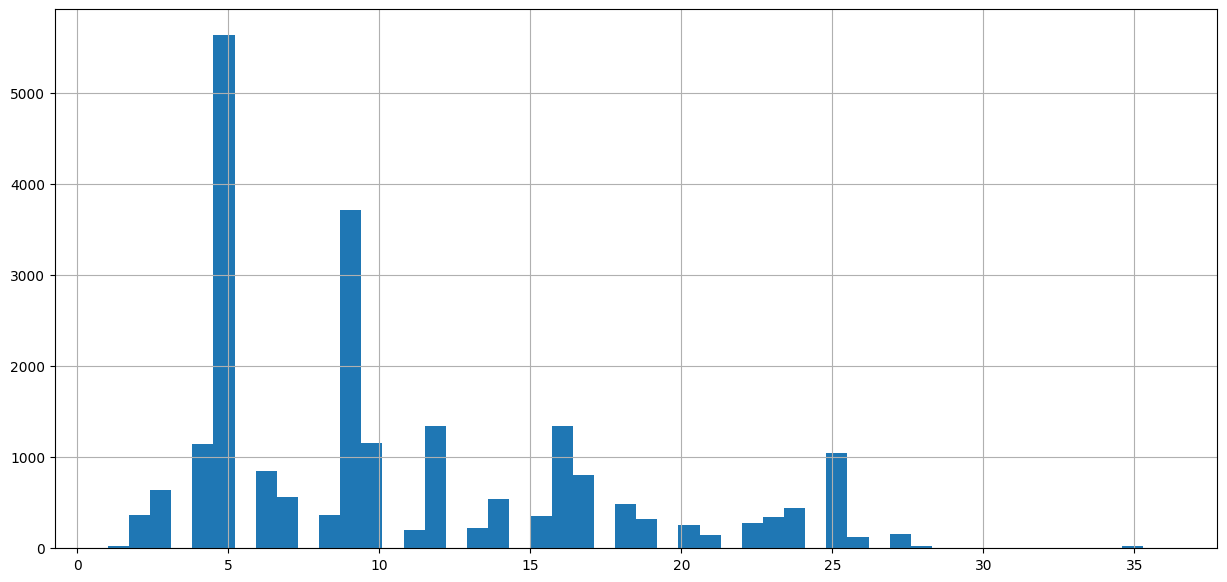

In [170]:
df_norm['floors_total'].hist(bins = 50, figsize = (15, 7))

In [171]:
print(round(df_norm.query('floors_total == 5 or floors_total == 9')['floors_total'].count() / len(df_norm['floors_total']), 2))
print(round(df_norm.query('floors_total < 5')['floors_total'].count() / len(df_norm['floors_total']), 2))
print(round(df_norm.query('floors_total > 5 and floors_total < 9')['floors_total'].count() / len(df_norm['floors_total']), 2))
round(df_norm.query('floors_total > 9')['floors_total'].count() / len(df_norm['floors_total']), 2)

0.41
0.09
0.08


0.42

<div class="alert alert-info" role="alert">
    
По количеству этажей в доме в базе представлены дома различной этажности, в равной степени:
    
Почти поровну 5 и 9 этажки (вместе), и дома выше 10 этажей - 41% и 43% соответственно.
    
Гораздо меньше домов до 4 этажей - 9% и 6-8 этажных - 7%. Ну это соответствует особенностям строительства - наиболее часто встречаются 5 и 9 этажки (особенно в старом фонде), сейчас больше строят более высотные дома - более 10 этажей.
    
Демонстрируется реальное содержание жилого фонда в г. Санкт-Петербург и области.
    
<div>

**'city_centers_nearest' - расстояние до центра города в метрах**

<AxesSubplot: >

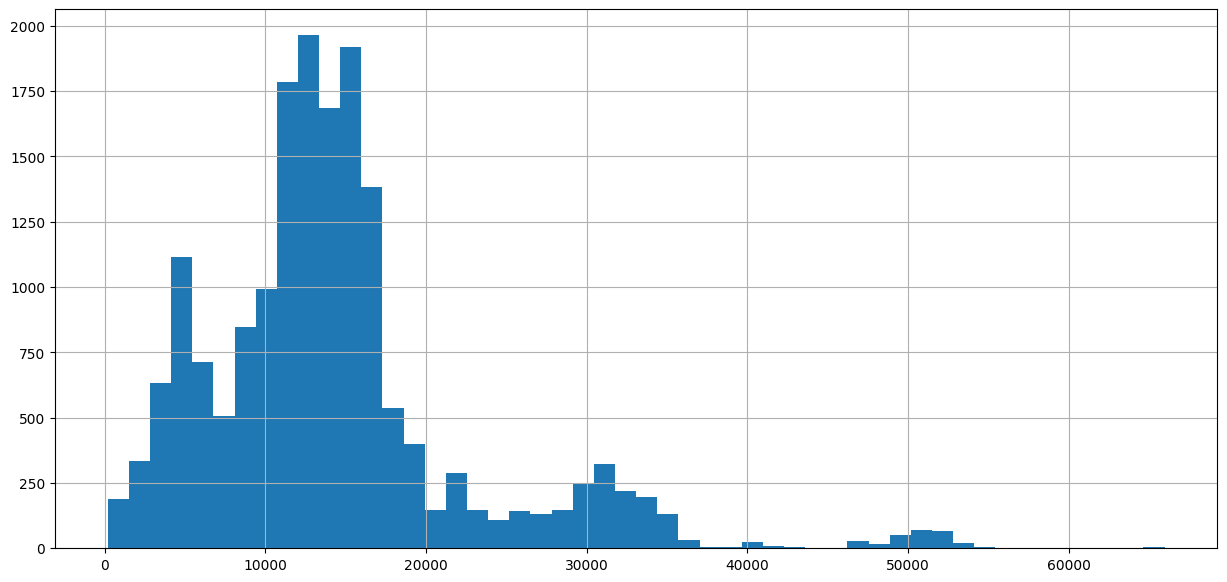

In [172]:
df_norm['city_centers_nearest'].hist(bins = 50, figsize = (15, 7))

In [173]:
df_norm['city_centers_nearest'].describe()

count    17574.000000
mean     14306.483157
std       8612.042102
min        181.000000
25%       9446.750000
50%      13151.000000
75%      16317.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [174]:
df_norm.query('city_centers_nearest.min()')['locality_name']

'поселок Понтонный'

<div class="alert alert-info" role="alert">
    
При максимально близком расположении к центру  в 208 м в центре города Санкт-Петербург, основное количество объявлений - на расстоянии от центра 7-17 км.
    
Более подробно критерий удаленности от центра исследовали в разделах 4.2.7, 4.7 и 5.5.4
    
<div>

**'airports_nearest' - расстояние до ближайшего аэропорта**

<AxesSubplot: >

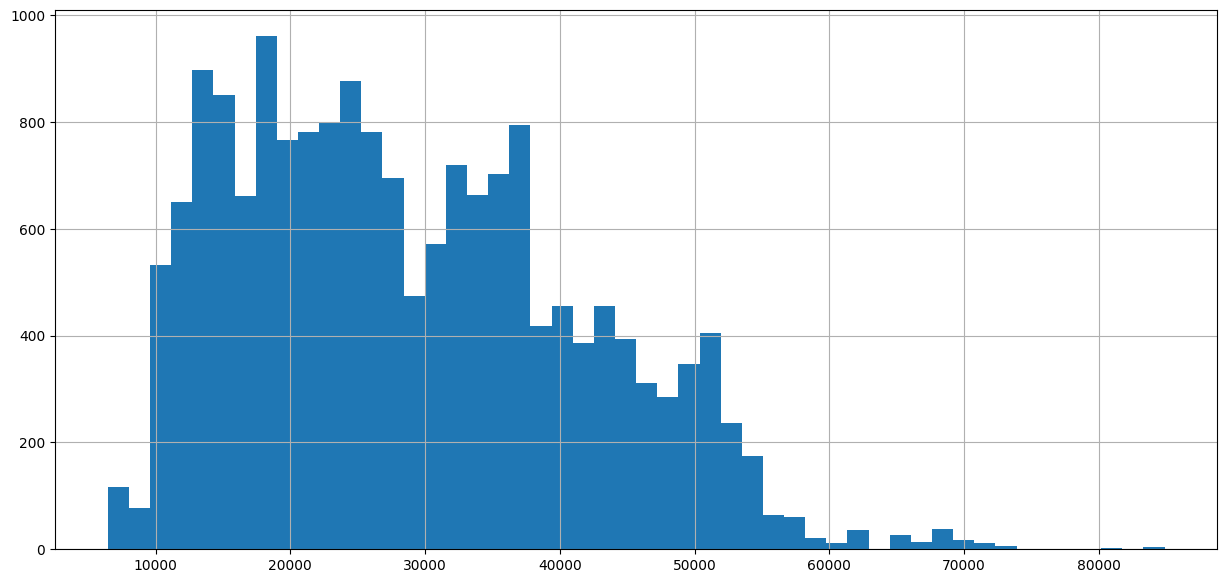

In [175]:
df_norm['airports_nearest'].hist(bins = 50, figsize = (15, 7))

**'park_nearest' - расстояние до ближайшего парка**

<AxesSubplot: >

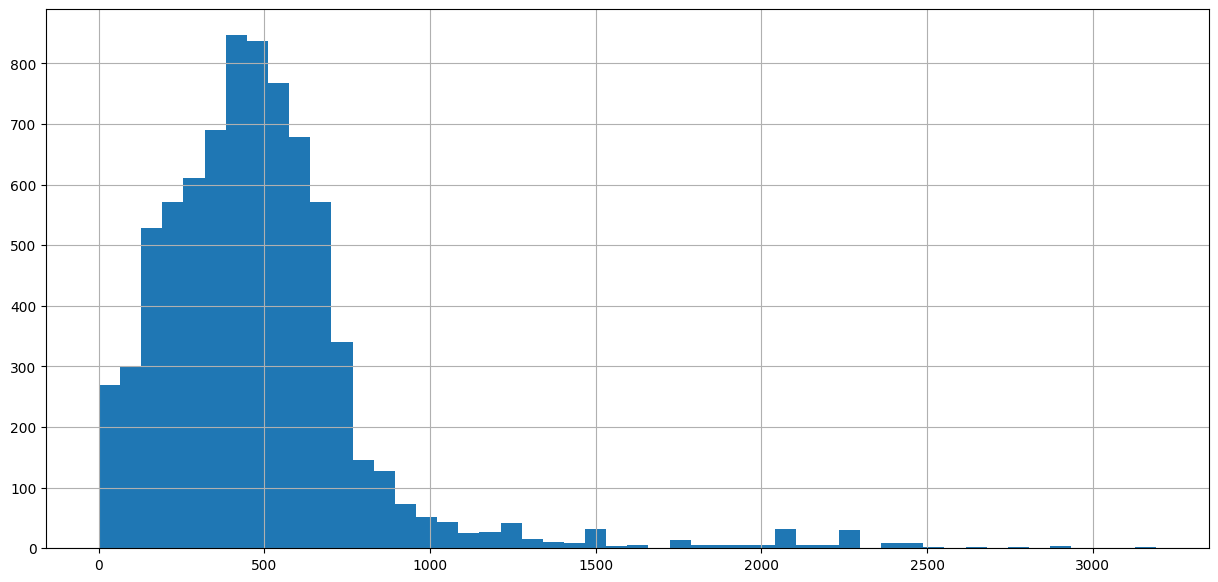

In [176]:
df_norm['parks_nearest'].hist(bins = 50, figsize = (15, 7))

<div class="alert alert-info" role="alert">
    
Расстояние до аэропорта и расстояние до ближайшего парка - распределение выглядит нормальным после того, как закомментировали замену в этих данных по медиане всех значений. Замена была сделана ранее, и в данных графиках четко выделялся выброс по значениям этих медиан.
    
Замену убрали, пропущенные значения оставили, они не так показательны для анализа рынка недвижимости.
    
<div>

**'weekday_exp' и 'month_exp' - день и месяц публикации объявления**

<div class="alert alert-info" role="alert">
    
Все исследование по этим критериям, включая графики - в разделе 5.5.6
    
<div>

### 5.4. Изучение времени продажи квартиры - как быстро.

In [177]:
df['days_exposition'].describe().round(2)

count    19963.00
mean       181.02
std        219.90
min          1.00
25%         45.00
50%         96.00
75%        231.50
max       1580.00
Name: days_exposition, dtype: float64

Среднее значение времени нахождения объявления на сайте - 181 день, медианное - 96 дней, стандартное отклонение достаточно большое, значит есть сильный разброс, есть вырывающиеся значения. 

<div class="alert alert-info" role="alert">
    
Будем параллельно анализировать исправленный датафрейм, приведенный к нормальным значениям
    
<div>


In [178]:
df_norm['days_exposition'].describe().round(2)

count    19875.00
mean       180.38
std        219.02
min          1.00
25%         45.00
50%         95.00
75%        231.00
max       1580.00
Name: days_exposition, dtype: float64

<div class="alert alert-info" role="alert">
    
В новой выборке среднее значение времени нахождения объявления на сайте - 156 дней, медианное - 91 дней, стандартное отклонение также достаточно большое, но меньше, чем в предыдущем датафрейме (с удалением пропусков), сильный разброс все равно присутствует, есть вырывающиеся значения. 
    
<div>


Text(0, 0.5, 'Кол-во квартир')

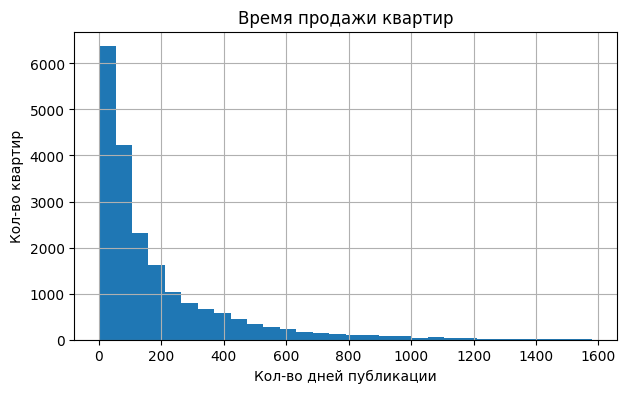

In [179]:
df['days_exposition'].hist(bins=30, figsize=(7, 4))
plt.title('Время продажи квартир')
plt.xlabel('Кол-во дней публикации')
plt.ylabel('Кол-во квартир')

На гистограмме заметно, что основная масса квартир продается в первые три месяца (до 100 дней), однако есть и такие, которые продаются более 3х лет (более 1000 дней), из-за этого среднее значение гораздо больше медианного.
Посмотрим поближе наиболее быстрые продажи.

Text(0, 0.5, 'Кол-во квартир')

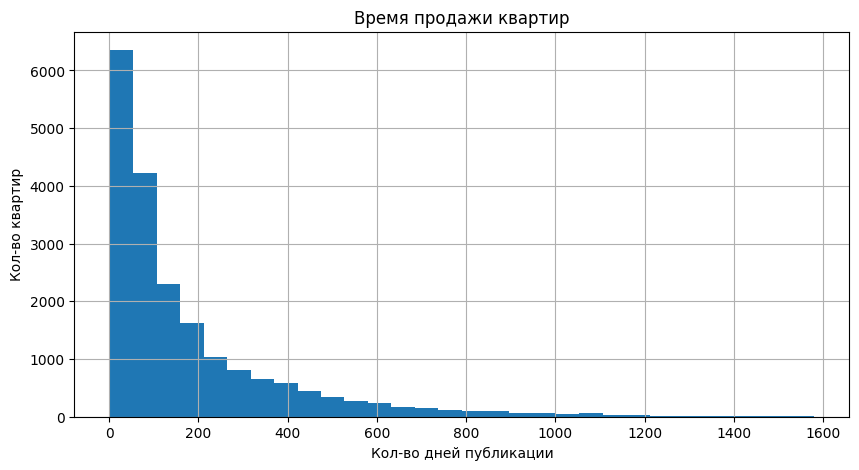

In [180]:
df_norm['days_exposition'].hist(bins=30, figsize=(10, 5))
plt.title('Время продажи квартир')
plt.xlabel('Кол-во дней публикации')
plt.ylabel('Кол-во квартир')

In [181]:
round(df_norm.query('days_exposition <= 100')['days_exposition'].count() / len(df_norm['days_exposition']), 2)

0.45

<div class="alert alert-info" role="alert">
    
После восстановления пропусков в 'days_exposition' (кол-во дней публикации) - картина практически не изменилась.
    
Чуть больше половины (53%) количества объявлений "висит" на сайте не более 100 дней, т. е. можно сделать вывод, что это будем считать за быстрые продажи.
    
<div>

Text(0, 0.5, 'Кол-во квартир')

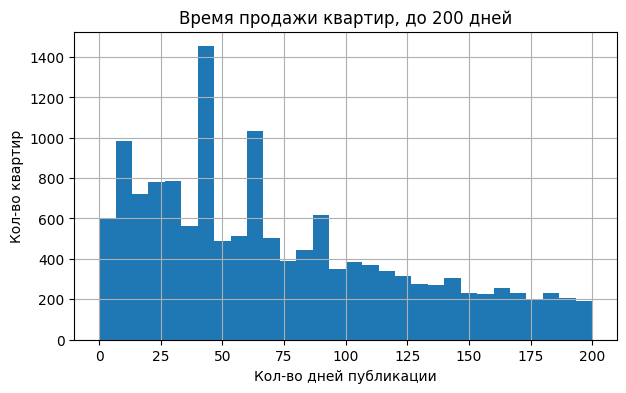

In [182]:
df['days_exposition'].hist(bins=30, range=(0, 200), figsize=(7, 4)) #посмотрим подробнее объявления до 200 дней публикации
plt.title('Время продажи квартир, до 200 дней')
plt.xlabel('Кол-во дней публикации')
plt.ylabel('Кол-во квартир')

Видим выбивающиеся значения в районе 45 и 60 дней. Посмотрим конкретно.

Text(0, 0.5, 'Кол-во квартир')

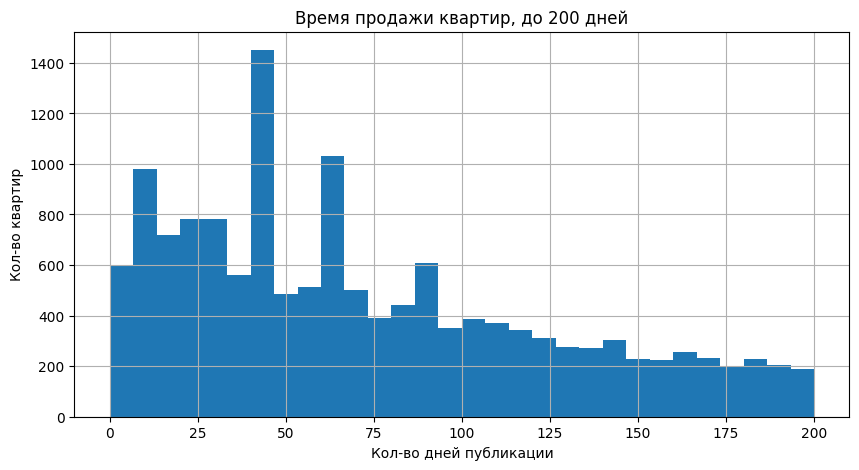

In [183]:
#посмотрим подробнее объявления до 200 дней публикации  в "нормальном" датафрейме
df_norm['days_exposition'].hist(bins=30, range=(0, 200), figsize=(10, 5)) 
plt.title('Время продажи квартир, до 200 дней')
plt.xlabel('Кол-во дней публикации')
plt.ylabel('Кол-во квартир')

<div class="alert alert-info" role="alert">

Выбивающиеся значения в районе 45 и 60 дней в нормальной выборке также выделяются.
    
<div>

Text(0, 0.5, 'Кол-во квартир')

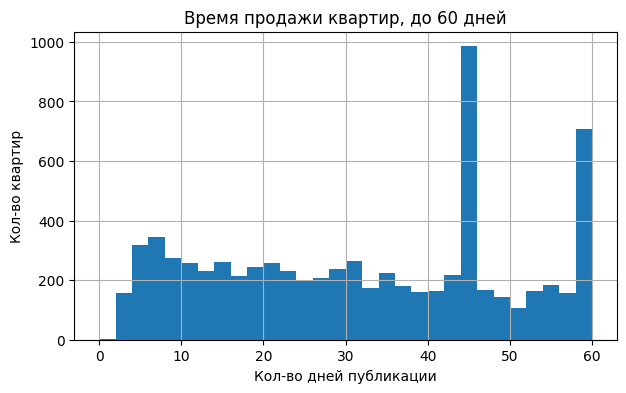

In [184]:
df['days_exposition'].hist(bins=30, range=(0, 60), figsize=(7, 4), grid=True)
plt.title('Время продажи квартир, до 60 дней')
plt.xlabel('Кол-во дней публикации')
plt.ylabel('Кол-во квартир')

Text(0, 0.5, 'Кол-во квартир')

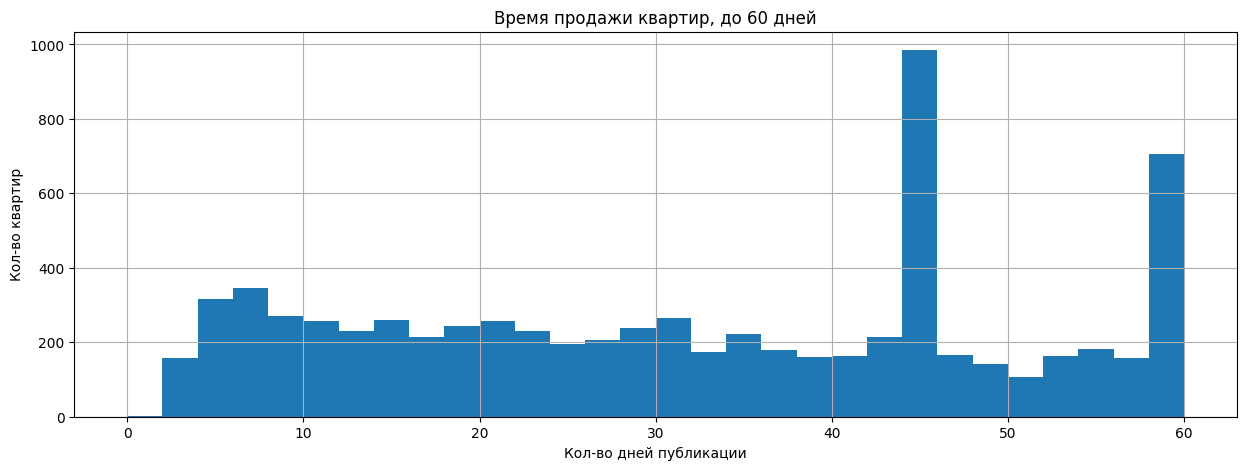

In [185]:
df_norm['days_exposition'].hist(bins=30, range=(0, 60), figsize=(15, 5), grid=True)
plt.title('Время продажи квартир, до 60 дней')
plt.xlabel('Кол-во дней публикации')
plt.ylabel('Кол-во квартир')

Пики на 45 и 60 день можно объяснить так: закрывались объявления в связи с окончанием установленного ресурсом срока публикации, условия могут быть разными (на 45-ый и на 60-й день) - публикация на общих условиях или на платной основе. Можно уточнить у коллег, кто предоставлял исходный датасет.

(1.0, 1000.0)

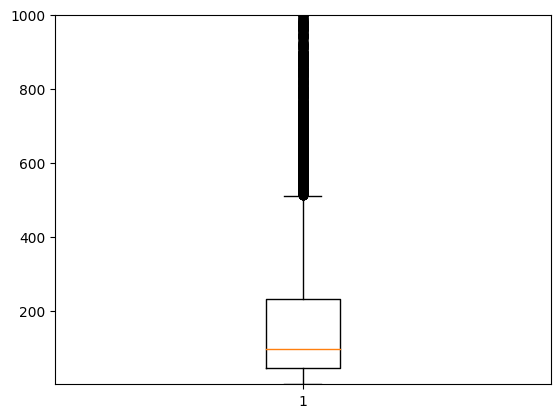

In [186]:
plt.boxplot(df[df['days_exposition'] > 0]['days_exposition'])
plt.ylim(1,1000)

Много выбросов в значениях больше 500 дней. Так как третий квартиль - на уровне 236 дней, "ус" заканчивается на уровне почти 500 дней, все объявления дольше этого кол-ва дней публикации можно не анализировать. Добавим в нормальный датафрейм условия:

(1.0, 1000.0)

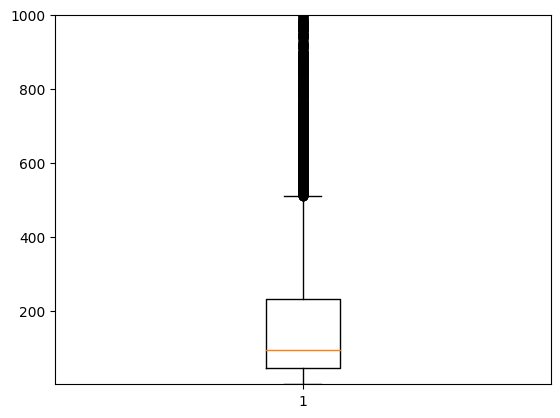

In [187]:
plt.boxplot(df_norm[df_norm['days_exposition'] > 0]['days_exposition'])
plt.ylim(1,1000)

<div class="alert alert-info" role="alert">
    
После восстановления пропусков третий квартиль на уровне 212 дня, аналогично исследованию по предыдущей базе (с заменой пропусков), разница всего 24 дня - "ус" также на уровне 500 дней, но заканчивается он не далеко за 1000, max прошлой базы - 1580 дней, нынешней "нормальной" - 800. Но это и логично - в предыдущей мы заменяли пропуски разницей между датой выгрузки датасета и датой публикации, поэтому их больше, в новой базе кол-во значений по дате публикации меньше на кол-во пропусков.
    
<div>

In [188]:
#условия ставим - до 800 дней публикации, значение 0 дней не оговариваем, ранее выясняли, что таких нет
df_norm = df.query('days_exposition <= 800') 
print(len(df_norm))
(len(df)-len(df_norm)) / len(df) *100

19390


15.936876788346485

Исходный файл базы данных стал короче еще на 3% - можем допустить.

count    23066.000000
mean      2017.372063
std          1.038829
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_exp, dtype: float64


<AxesSubplot: ylabel='Frequency'>

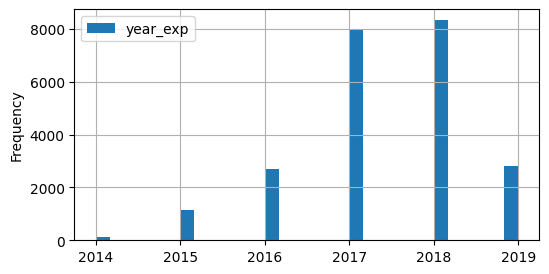

In [189]:
# посмотрим еще как распределялись продажи по годам
print(df['year_exp'].describe())
df.plot(y = 'year_exp', kind = 'hist', bins = 30, grid=True, figsize = (6,3))

<div class="alert alert-info" role="alert">
    
Посмотрим изменение кол-ва продаж по годам в новой выборке, без удаления пропусков в days_exposition и city_centers_nearest.
    
**Все нижепроведенные исследования по days_exposition - новые.**
    
<div>

count    19390.000000
mean      2017.280041
std          0.908620
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_exp, dtype: float64


<AxesSubplot: ylabel='Frequency'>

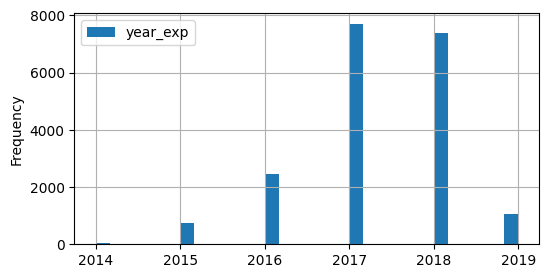

In [190]:
print(df_norm['year_exp'].describe())
df_norm.plot(y = 'year_exp', kind = 'hist', bins = 30, grid=True, figsize = (6,3))

In [191]:
df_norm['days_exposition'].mean()

156.11774110366167

<div class="alert alert-info" role="alert">
    
Попробуем вывести график, показывающий среднюю скорость продаж по годам, т. е. по средним значениям кол-ва дней публикации days_exposition, распределенное по годам.
    
<div>

<AxesSubplot: ylabel='year_exp'>

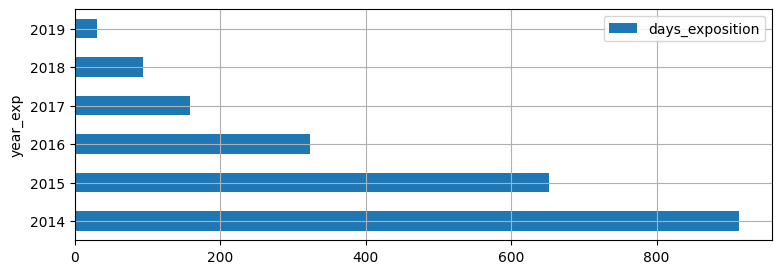

In [192]:
( #сначала выведем по старой базе, с замененными пропусками
    df.query('year_exp < 2020') 
    .pivot_table(index = 'year_exp', values = 'days_exposition', aggfunc='mean')
    .plot(kind = 'barh', grid=True, figsize=(9, 3))
)

In [193]:
#создадим сводную таблицу - средние значения дней публикации по годам, в старой базе:
df_days = df.query('year_exp < 2020').pivot_table(index = 'year_exp', values = 'days_exposition', aggfunc='mean')
df_days.columns = ['days_exposition_old']
df_days

days_exposition_old
year_exp                     
2014               913.025641
2015               652.647114
2016               324.064994
2017               159.044621
2018                94.432517
2019                31.032802

<AxesSubplot: ylabel='year_exp'>

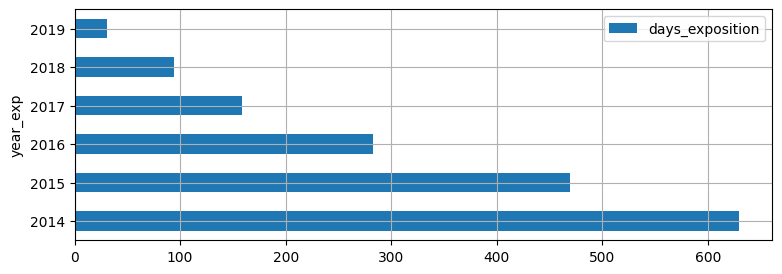

In [194]:
(#все то же - по новой выборке, с оставленными пропусками в days_exposition и в city_centers_nearest
    df_norm.query('year_exp < 2020') #
    .pivot_table(index = 'year_exp', values = 'days_exposition', aggfunc='mean')
    .plot(kind = 'barh', grid=True, figsize=(9, 3))
)

In [195]:
df_days_norm = df_norm.query('year_exp < 2020').pivot_table(index = 'year_exp', values = 'days_exposition', aggfunc='mean')
df_days_norm.columns = ['days_exposition_new']
df_days_norm

days_exposition_new
year_exp                     
2014               629.176471
2015               469.247967
2016               283.137693
2017               158.875732
2018                94.432517
2019                31.032802

In [196]:
#объединим две сводные таблицы для наглядности
df_days_year = df_days.join(df_days_norm, on='year_exp')
df_days_year

days_exposition_old  days_exposition_new
year_exp                                          
2014               913.025641           629.176471
2015               652.647114           469.247967
2016               324.064994           283.137693
2017               159.044621           158.875732
2018                94.432517            94.432517
2019                31.032802            31.032802

<AxesSubplot: xlabel='year_exp'>

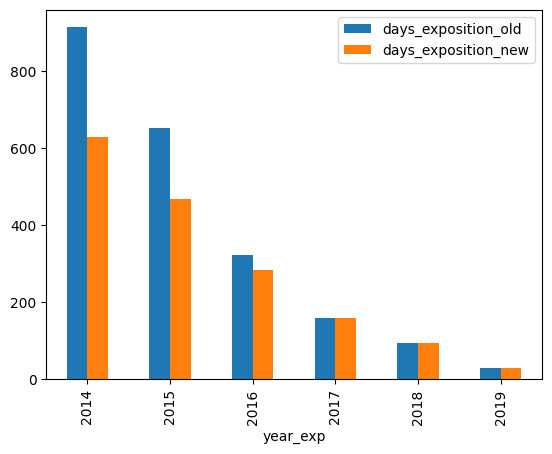

In [197]:
#покажем на одном графике распределение средних значений кол-ва дней публикаций по гшодам - в сравнении двух выборок
df_days_year.reset_index().plot(x='year_exp', y=['days_exposition_old', 'days_exposition_new'], kind='bar')

<div class="alert alert-info" role="alert">
    
Среднее кол-во дней публикации в разных выборках (с учетом замены пропусков в days_exposition и без их замены различаются только в первые три года периода - с 2014 по 2016. Последние три года эти значения одинаковы. Все это логично, т.к. реальных значений в первые годы меньше, поэтому среднее значение больше, а последние годы реальные значения ближе к синтетическим (реально больше квартир еще висит в продаже)
    
<div>

**Вывод:**

- Больше всего продаж квартир происходило в 2018 году, чуть меньше - в 2017 г, в 2019 - спад, но база данных охватывает только до 2019 года, много объявлений еще недавно вывешены, не закрыты.

- Нормальными продажами являются продажи, совершенные до 200 дней (до полугода). Быстрыми продажами можно считать продажи в первые два месяца, долгими - год-два. Очень быстрыми - в первые 10 дней, очень долгими - более 2-х лет.

- Основная масса квартир продается в первые три месяца (90-100 дней), однако есть и такие, которые продаются более 3-х лет.

### 5.5. Факторы, влияющие на стоимость объекта: общая площадь, жилая площадь, площадь кухни, количество комнат, тип этажа, (первый, последний, другой), дата размещения (день недели, месяц, год).

In [198]:
# в анализ возьмем уже нормальный файл, которые ранее подготовили для более точной статистики
# посмотрим какими критериями мы оперируем на данном этапе
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19390 entries, 1 to 23064
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             19390 non-null  int64         
 1   last_price               19390 non-null  float64       
 2   total_area               19390 non-null  float64       
 3   first_day_exposition     19390 non-null  datetime64[ns]
 4   rooms                    19390 non-null  int64         
 5   ceiling_height           19390 non-null  float64       
 6   floors_total             19390 non-null  float64       
 7   living_area              19390 non-null  float64       
 8   floor                    19390 non-null  int64         
 9   is_apartment             19390 non-null  bool          
 10  studio                   19390 non-null  bool          
 11  open_plan                19390 non-null  bool          
 12  kitchen_area             19390 n

In [199]:
# посмотрим на степень корреляции между несколькими значениями

df_norm[['last_price', 'total_area', 'living_area', 'kitchen_area', 
         'rooms', 'floor_type', 'first_day_exposition', 'city_centers_nearest_km',
         'airports_nearest', 'price_meter', 'area_type']].corr()

last_price  total_area  living_area  kitchen_area  \
last_price                 1.000000    0.747106     0.659010      0.573010   
total_area                 0.747106    1.000000     0.937324      0.619802   
living_area                0.659010    0.937324     1.000000      0.421124   
kitchen_area               0.573010    0.619802     0.421124      1.000000   
rooms                      0.450498    0.775135     0.856976      0.269323   
city_centers_nearest_km   -0.046239   -0.072272    -0.074029     -0.067832   
airports_nearest          -0.035360   -0.029968    -0.052628      0.006387   
price_meter                0.734103    0.235861     0.150152      0.349805   

                            rooms  city_centers_nearest_km  airports_nearest  \
last_price               0.450498                -0.046239         -0.035360   
total_area               0.775135                -0.072272         -0.029968   
living_area              0.856976                -0.074029         -0.052628   
kitchen_area             0.269323                -0.067832          0.006387   
rooms                    1.000000                -0.053481         -0.059892   
city_centers_nearest_km -0.053481                 1.000000          0.269535   
airports_nearest        -0.059892                 0.269535          1.000000   
price_meter             -0.005541                 0.062362         -0.041112   

                         price_meter  
last_price                  0.734103  
total_area                  0.235861  
living_area                 0.150152  
kitchen_area                0.349805  
rooms                      -0.005541  
city_centers_nearest_km     0.062362  
airports_nearest           -0.041112  
price_meter                 1.000000

Все коэффициенты кореляции каждого параметра с ценой достаточно невысокие, наиболее заметная прямая положительная корреляция есть у цены в зависимости от параметров площади, что логично, также - цены за метр.

array([[<AxesSubplot: xlabel='airports_nearest', ylabel='airports_nearest'>,
        <AxesSubplot: xlabel='city_centers_nearest_km', ylabel='airports_nearest'>,
        <AxesSubplot: xlabel='kitchen_area', ylabel='airports_nearest'>,
        <AxesSubplot: xlabel='living_area', ylabel='airports_nearest'>,
        <AxesSubplot: xlabel='price_meter', ylabel='airports_nearest'>,
        <AxesSubplot: xlabel='rooms', ylabel='airports_nearest'>,
        <AxesSubplot: xlabel='total_area', ylabel='airports_nearest'>],
       [<AxesSubplot: xlabel='airports_nearest', ylabel='city_centers_nearest_km'>,
        <AxesSubplot: xlabel='city_centers_nearest_km', ylabel='city_centers_nearest_km'>,
        <AxesSubplot: xlabel='kitchen_area', ylabel='city_centers_nearest_km'>,
        <AxesSubplot: xlabel='living_area', ylabel='city_centers_nearest_km'>,
        <AxesSubplot: xlabel='price_meter', ylabel='city_centers_nearest_km'>,
        <AxesSubplot: xlabel='rooms', ylabel='city_centers_nearest_km'>

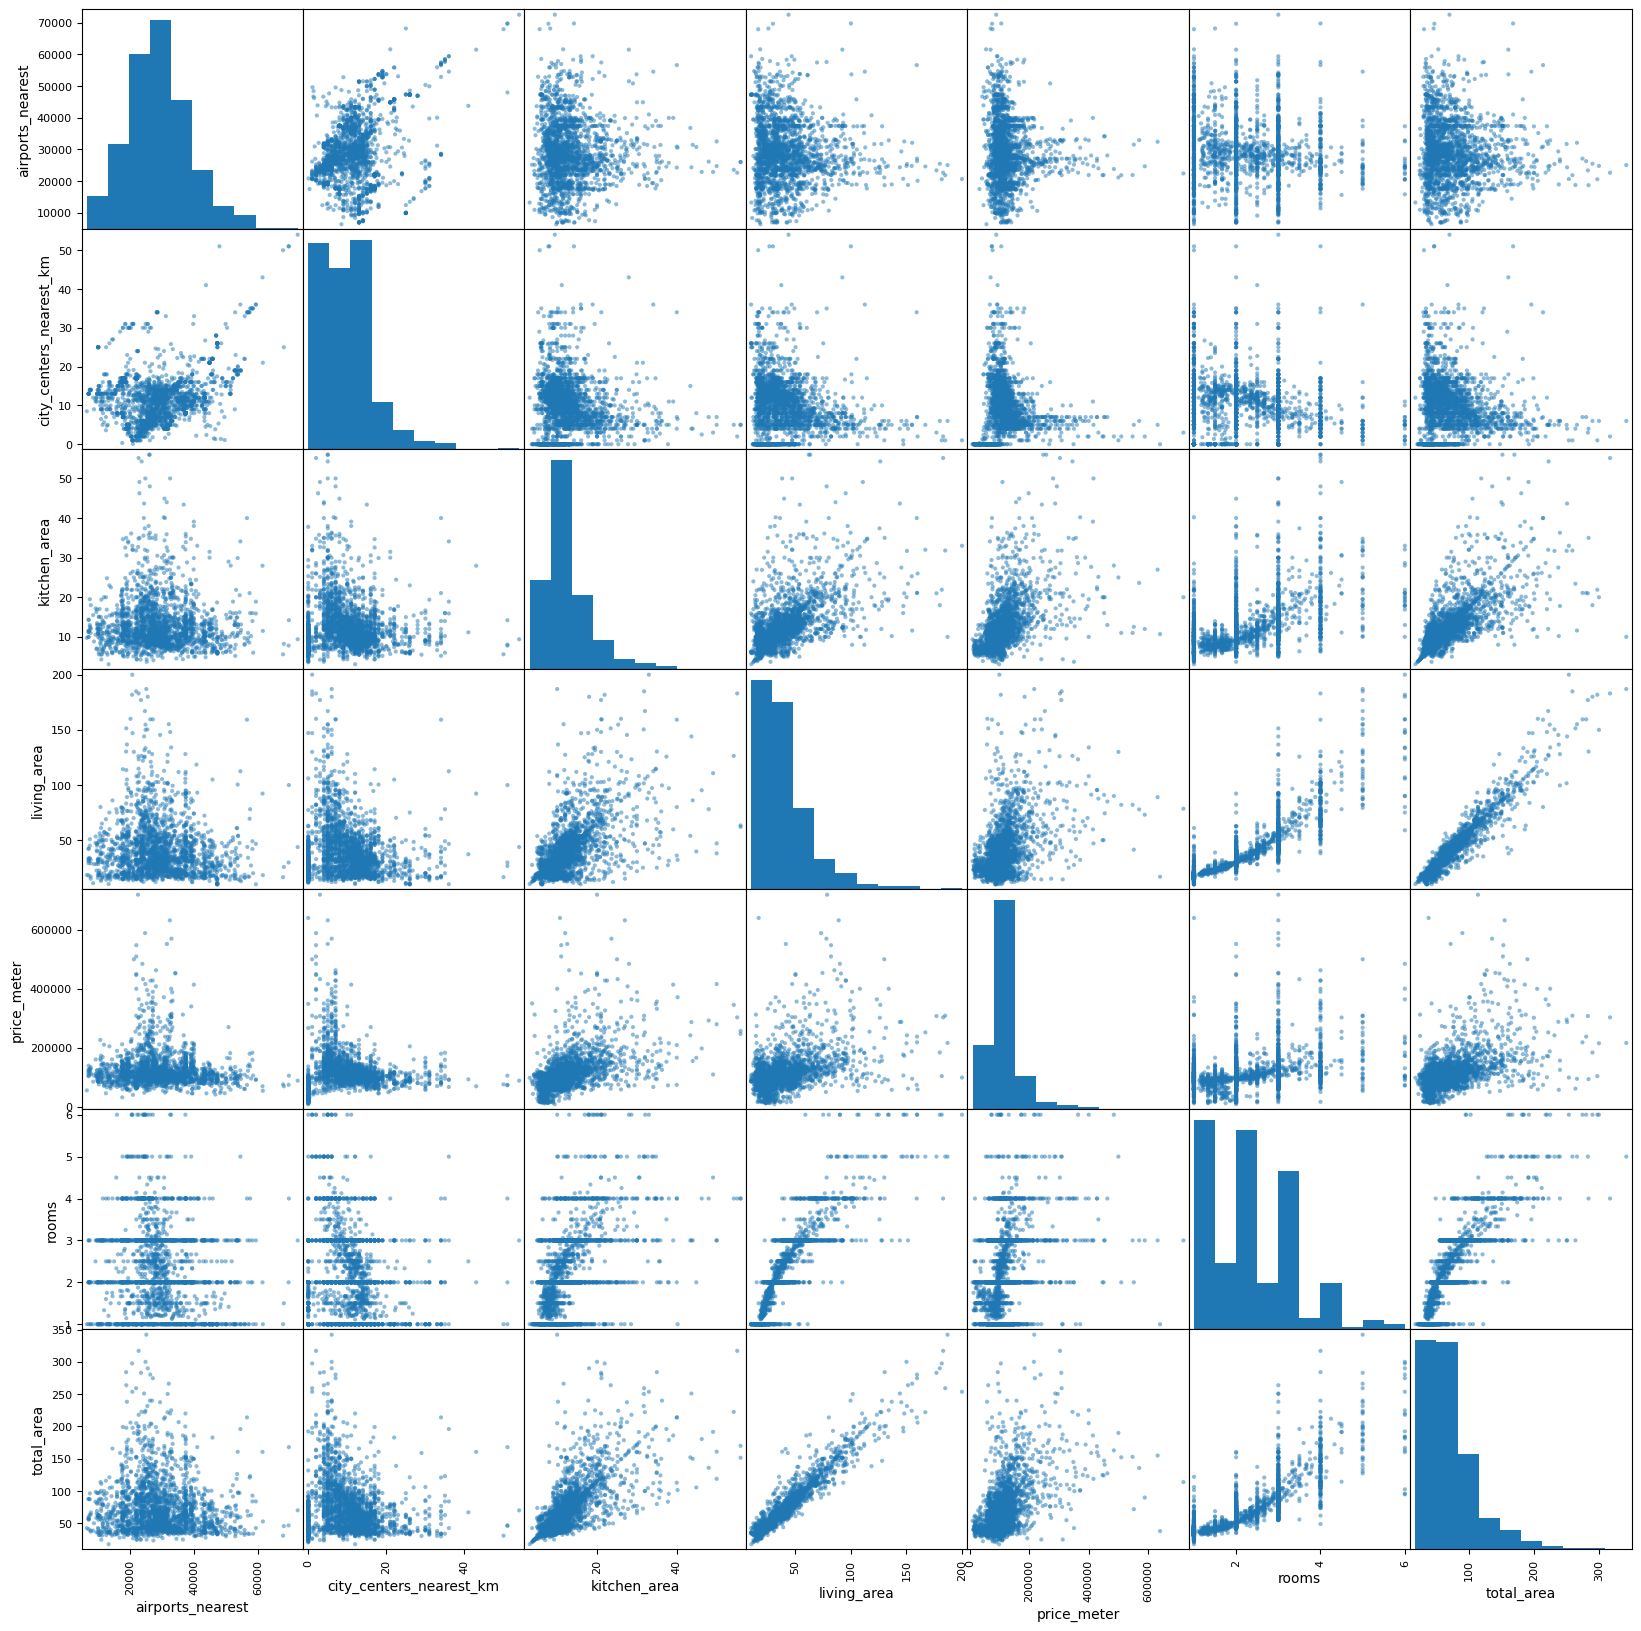

In [200]:
#посмотрим корреляцию на общей диаграмме рассеяния - матрице рассеяния:
df_norm_diagr = df_norm.pivot_table(index='last_price', values=['total_area', 
                'living_area', 'kitchen_area', 'rooms', 'city_centers_nearest_km', 'airports_nearest', 'price_meter'])
pd.plotting.scatter_matrix(df_norm_diagr, figsize=(20, 20))

Разберем каждую зависимость - цены от каждого критерия.

#### 5.5.1. Зависимость цены от площади квартиры

In [201]:
df_norm_area = df_norm.pivot_table(index='total_area', values='last_price', aggfunc = ['count', 'mean', 'median'])
df_norm_area.columns = ['count', 'mean', 'median']
df_norm_area

count        mean      median
total_area                               
17.60           1   3400000.0   3400000.0
17.78           1   1737000.0   1737000.0
18.00           2   1695000.0   1695000.0
18.50           1   1500000.0   1500000.0
18.90           1   1900000.0   1900000.0
...           ...         ...         ...
320.00          1  14000000.0  14000000.0
327.20          1  29000000.0  29000000.0
336.00          1  28000000.0  28000000.0
342.00          1  73900000.0  73900000.0
380.00          1  35000000.0  35000000.0

[1830 rows x 3 columns]

F:\Anaconda\envs\practicum\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='total_area', ylabel='last_price'>

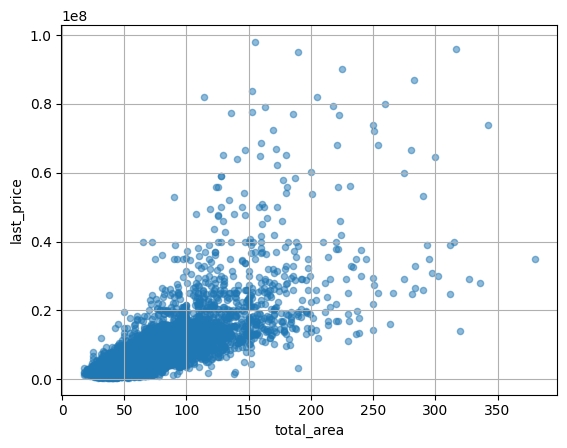

In [202]:
df_norm.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5, grid=True)

In [203]:
df_norm['total_area'].corr(df['last_price'])

0.7471057347005207

Есть прямая зависимость цены объекта от его общей площади

<AxesSubplot: xlabel='living_area', ylabel='last_price'>

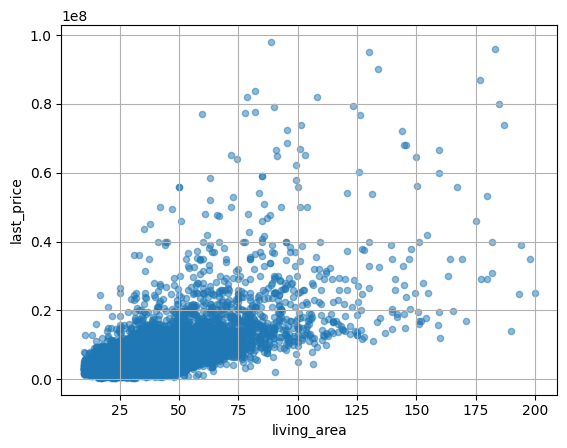

In [204]:
df_norm.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5, grid=True)

In [205]:
df_norm['living_area'].corr(df['last_price'])

0.6590101087539151

Зависимость цены объекта от размера жилой пллощади также прямая, но менее выражена. Есть некоторые увеличения значений цены при одной и той же жилой площади, но, видимо, там влияние других критериев.

<AxesSubplot: xlabel='kitchen_area', ylabel='last_price'>

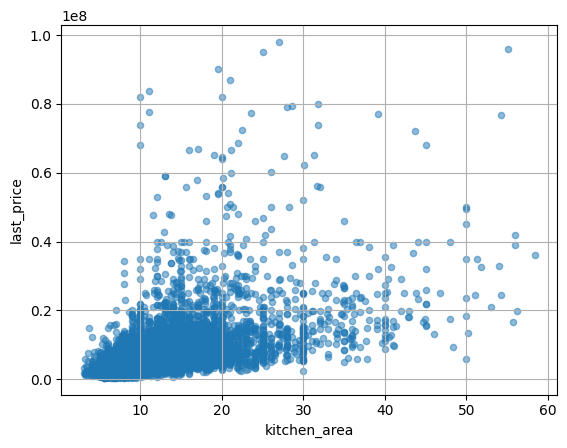

In [206]:
df_norm.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5, grid=True)

In [207]:
df_norm['kitchen_area'].corr(df['last_price'])

0.5730098258961366

Зависимость цены квартиры от площади кухни еще менее выражена, до размера кухни 30 кв.м. цена остается та же, хотя есть некоторые выбросы значений высокой цены даже при площади кухни 10 кв.м., это зависит уже от других факторов

**Вывод:**
Цена любого объекта жилой недвижимости напрямую зависит от его площади - больше от общей, чуть меньше от жилой, еще меньше - от площади кухни.

#### 5.5.2. Зависимость цены квартиры от кол-ва комнат

Text(0.5, 0, 'Кол-во комнат')

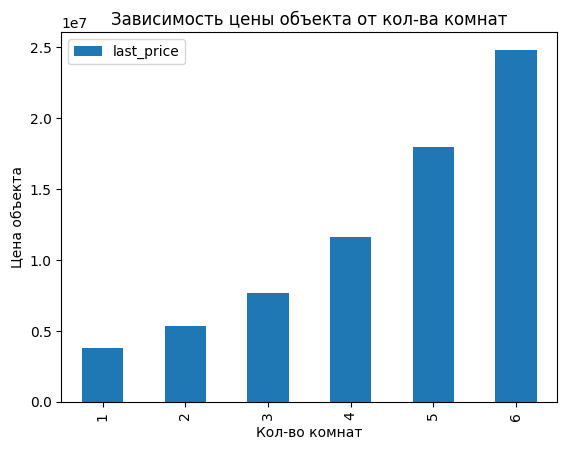

In [208]:
df_norm.pivot_table(index='rooms', values='last_price').plot(y='last_price', kind='bar')
plt.title('Зависимость цены объекта от кол-ва комнат')
plt.ylabel('Цена объекта')
plt.xlabel('Кол-во комнат')

In [209]:
df_norm['rooms'].corr(df['last_price'])

0.4504976408729486

**Вывод:**
Стоимость квартиры напрямую зависит от кол-ва комнат, но начинает повышаться, если в квартире больше 3х комнат; 1 комнатные почти по той же цене, что и студии/апартаменты, 2-х комнатные не намного дороже, чем 1-комнатные. Корреляция цены и кол-ва комнат - 45%

#### 5.5.3. Зависимость цены квартиры от этажа, на котором она находится

Text(0.5, 0, 'Тип этажности')

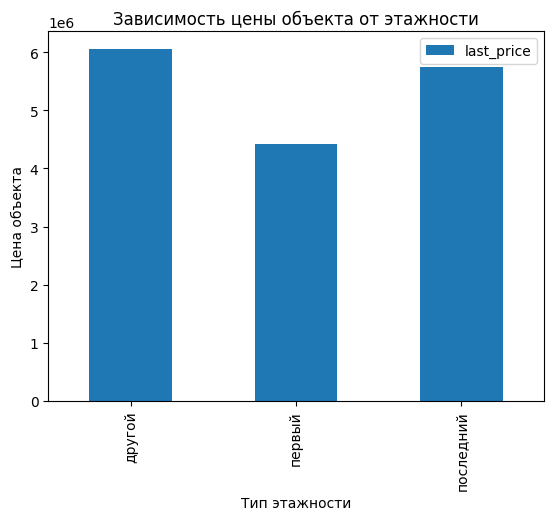

In [210]:
df_norm.pivot_table(index='floor_type', values='last_price').plot(y='last_price', kind='bar')
plt.title('Зависимость цены объекта от этажности')
plt.ylabel('Цена объекта')
plt.xlabel('Тип этажности')

In [211]:
df_norm['floor'].corr(df['last_price'])

0.049858551027827616

**Вывод:**
Корреляция между ценой и уровнем этажа очень низкая, но она существует. Квартиры на первых этажах дешевле, чем на последних и средних; квартиры на последних этажах несколько дешевле, чем на средних, но незначительно, и немного дороже, чем на первых; квартиры на средних этажах (не первый и не последний) - самые дорогие

#### 5.5.4. Влияние на цену удалености от центра

F:\Anaconda\envs\practicum\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 0, 'Удаленность от центра')

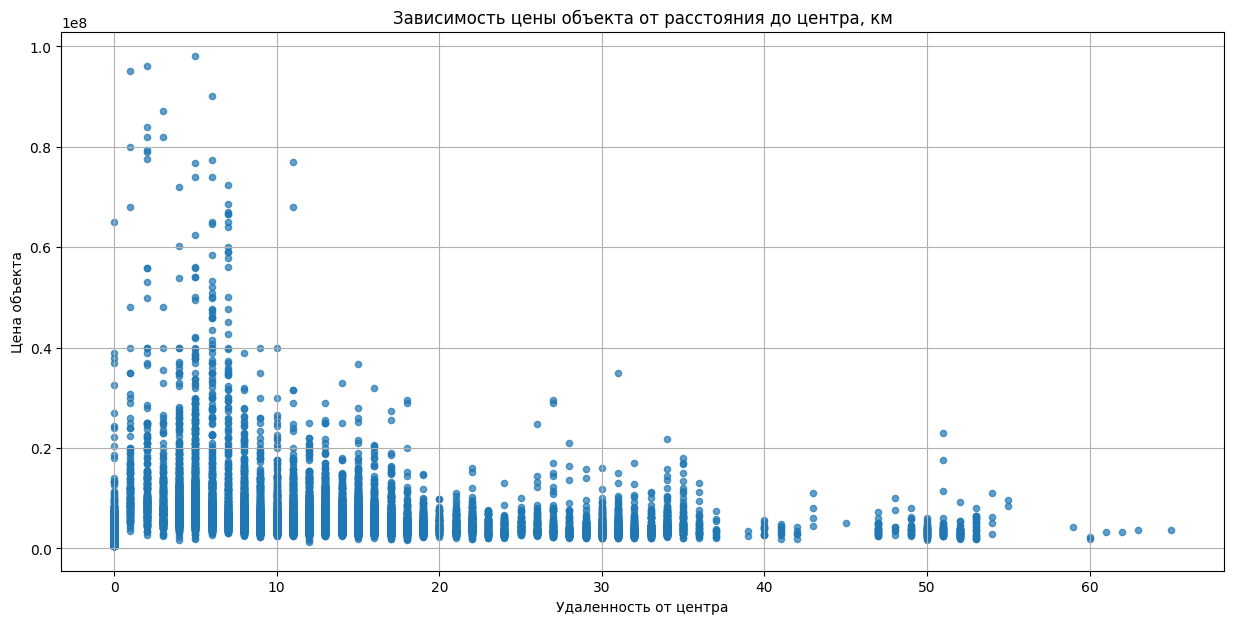

In [212]:
df_norm.plot(x='city_centers_nearest_km', y='last_price', kind='scatter', alpha=0.7, grid=True, figsize=(15, 7))
plt.title('Зависимость цены объекта от расстояния до центра, км')
plt.ylabel('Цена объекта')
plt.xlabel('Удаленность от центра')

In [213]:
df_norm['city_centers_nearest_km'].corr(df['last_price'])

-0.04623897219426521

**Вывод:**

Зависимость цены квартиры от того, насколько она находится далеко от центра - отрицательная, то есть чем дальше от центра, тем дешевле квартиры.

<div class="alert alert-info" role="alert">
    
Дополнительно сделала анализ по цене 1 кв.м. по зависимости от кол-ва комнат, по сезонности - посчитала более показательным смотреть цену за 1 кв.м.
    
<div>

#### 5.5.5. Зависит ли цена одного квадратного метра от кол-ва комнат в квартире

Text(0.5, 0, 'Кол-во комнат')

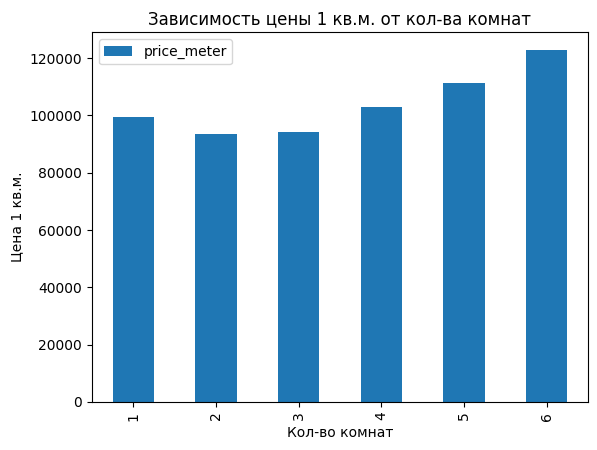

In [214]:
df_norm.pivot_table(index='rooms', values='price_meter').plot(y='price_meter', kind='bar')
plt.title('Зависимость цены 1 кв.м. от кол-ва комнат')
plt.ylabel('Цена 1 кв.м.')
plt.xlabel('Кол-во комнат')

#### 5.5.6. Зависимость стоимости одного кв. м. от года продажи, от сезонности - месяца продажи, и от дня недели

Text(0.5, 0, 'Год публикации')

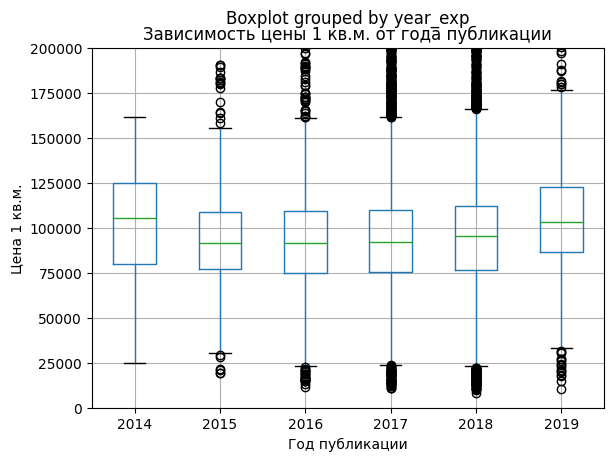

In [215]:
df_norm.boxplot(column='price_meter', by='year_exp')
plt.ylim(0, 200000)
plt.title('Зависимость цены 1 кв.м. от года публикации')
plt.ylabel('Цена 1 кв.м.')
plt.xlabel('Год публикации')

Text(0.5, 0, 'Месяц публикации')

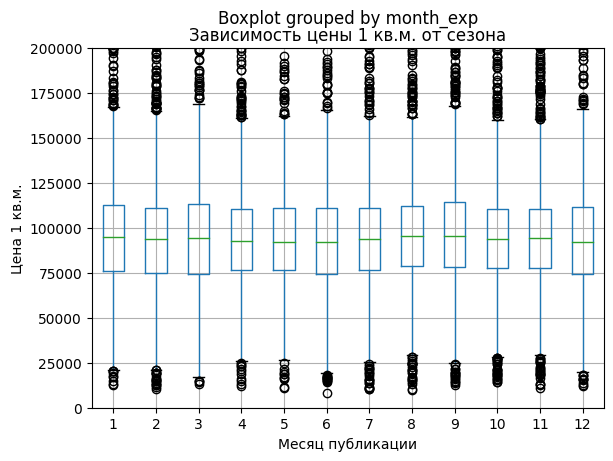

In [216]:
df_norm.boxplot(column='price_meter', by='month_exp')
plt.ylim(0, 200000)
plt.title('Зависимость цены 1 кв.м. от сезона')
plt.ylabel('Цена 1 кв.м.')
plt.xlabel('Месяц публикации')
# заметно небольшое различие в стоимости метра в зависимости от месяца публикации

Text(0.5, 0, 'Месяц публикации')

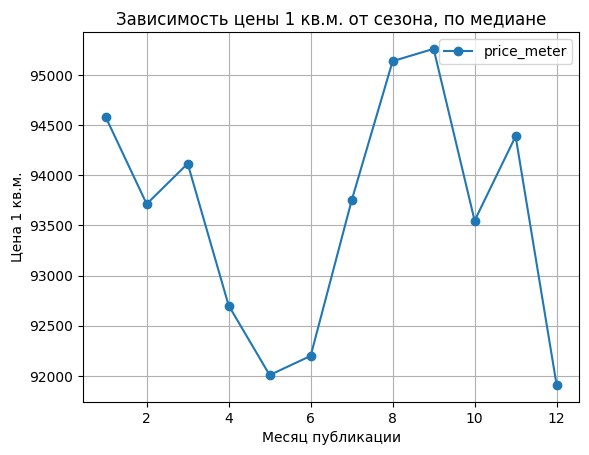

In [217]:
df_norm.pivot_table(index='month_exp', values='price_meter',
                   aggfunc='median').reset_index().plot(x='month_exp', y='price_meter', grid=True, style='o-')
plt.title('Зависимость цены 1 кв.м. от сезона, по медиане')
plt.ylabel('Цена 1 кв.м.')
plt.xlabel('Месяц публикации')

Text(0.5, 0, 'День недели публикации')

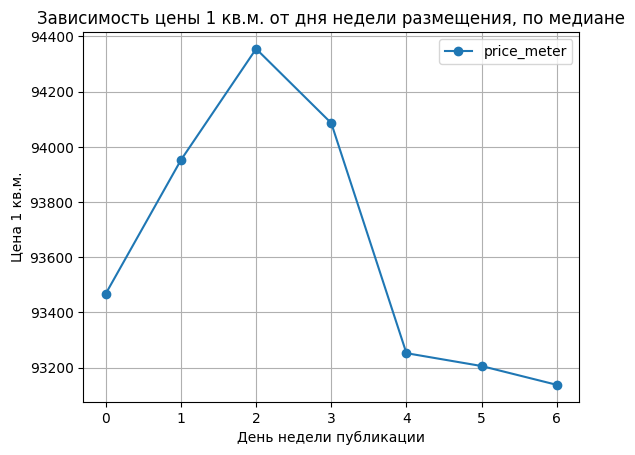

In [218]:
df_norm.pivot_table(index='weekday_exp', values='price_meter',
                   aggfunc='median').reset_index().plot(x='weekday_exp', y='price_meter', grid=True, style='o-')
plt.title('Зависимость цены 1 кв.м. от дня недели размещения, по медиане')
plt.ylabel('Цена 1 кв.м.')
plt.xlabel('День недели публикации')

**Вывод:**

- Цена за один квадратный метр падает с увеличением комнат до 3-х, с дальнейшим увеличением кол-ва комнат она снова возрастает. Стоимость одного кв. м. студии или апартамента соответствует стоимость одного кв. м. 5-тикомнатной квартиры.    
- В разные годы цена за 1 кв. м. меняется: начиная с 2014 г она упала, в 2015-2017 годах она была на одном уровне, затем в 2018 незначительно поднялась, а в 2019 стала еще выше, но все равно не дошла до уровня 2014 года.
За период 2014-2019 годы, самая высокая цена за 1 кв. м. площади жилой недвижимости была в 2014 году
- Сезонность влияет на рынок недвижимости - пик цен приходится на апрель, август и ноябрь, самый высокий пик в апреле (перед летом, перед отпусками), летом рынок стоит без движения, цены падают (люди в отпусках, мало кто думает о покупках квартир - другие траты).
- В зависимости от того, в какой день недели размещено объявление, на него с разной степенью обращают внимание потенциальные покупатели, пик внимания, соответственно, и повышение цены за квадратный метр, приходится на середину недели (среда), к выходным интерес падает, в воскресенье немного поднимается (планирование к началу недели)

<div class="alert alert-info" role="alert">
    
Изменение цен по годам:
    
<div>

Text(0.5, 0, 'Год публикации')

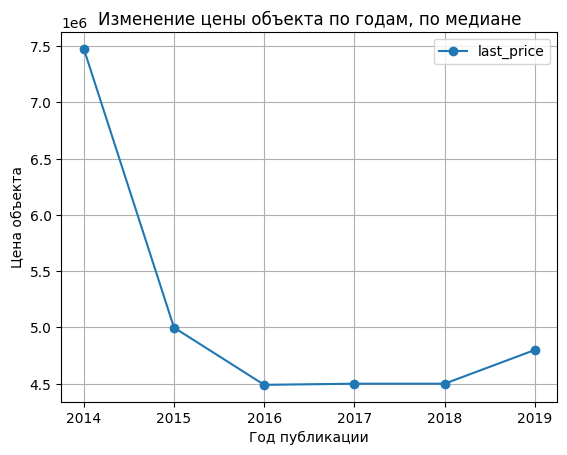

In [219]:
df_norm.pivot_table(index='year_exp', values='last_price',
                   aggfunc='median').reset_index().plot(x='year_exp', y='last_price', grid=True, style='o-')
plt.title('Изменение цены объекта по годам, по медиане')
plt.ylabel('Цена объекта')
plt.xlabel('Год публикации')

<div class="alert alert-info" role="alert">
    
Изменение цен по годам.

**Вывод:**
    
Прослеживается сильное падение цен объектов жилой недвижимости в 2015 году по сравнению с 2014 г - почти на 34%, далее, в 2016 году происходит дальнейшее снижение цен на квартиры - еще на 10%, в период с 2016 по 2018 годы цены на квартиры в среднем остаются на одном уровне, в 2019 г наблюдается небольшое повышение, на 6%.
 
В целом за весь период с 2014 по 2019 годы цены на квартиры упали почти на 36%

    
<div>

<AxesSubplot: xlabel='year_exp'>

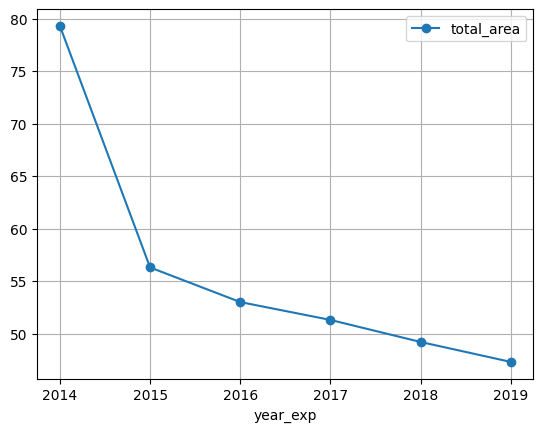

In [220]:
df_norm.pivot_table(index='year_exp', values='total_area',
               aggfunc='median').reset_index().plot(x='year_exp', y='total_area', grid=True, style='o-')

<div class="alert alert-info" role="alert">

**Изменение площади объектов недвижимости по годам.**

**Вывод:**
    
По сравнению с 2014 г в 2015 г выставлялись квартиры гораздо меньших площадей - почти на 30% меньше, с 2015 по 2019 годы площади все меньше - еще почти на 20 %.
 
В целом за весь период с 2014 по 2019 годы средняя площадь выставляемых квартир уменьшилась на 43%.

Это можно объяснить сильным удорожанием рынка недвижимости в целом, то есть квартиры большой площади, которые можно было продать/купить в 2014 году, в 2019 уже не способны к продаже (будут слишком высокой цены, все меньше людей могут их приобрести), и их в объявлениях становится все меньше, основная масса - квартиры мЕньшей площади, чем в 2014 г

    
<div>

<AxesSubplot: title={'center': 'кол-во объявлений'}, xlabel='year_exp'>

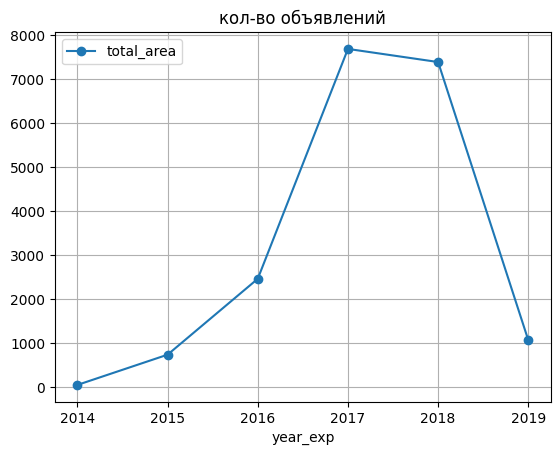

In [221]:
df_norm.pivot_table(index='year_exp', values='total_area',
               aggfunc='count').reset_index().plot(title='кол-во объявлений', x='year_exp', y='total_area', grid=True, style='o-')

<div class="alert alert-info" role="alert">

**Изменение площади объектов недвижимости по годам.**

**Вывод:**
    
Уже рассматривали подобный критерий - в разделе 5.4.(Изучение времени продажи квартиры - как быстро), график - Изменение кол-ва объявлений по годам.
  
Наибольшее кол-во объявлений - в 2017 и в 2018 гг, наименьшее - в 2014г., к 209 опять сильно падает, можно судить о некотором застое рынка недвижимости в 2019 г
   

    
<div>

<div class="alert alert-info" role="alert">

**Рассмотрим комплексное изменение этих трех параметров:**
    
**Вывод:**
    
За период с 2014 по 2019 годы цены на квартиры, равно как и площади объектов сильно упали, на 60% и 43% соответственно.
Это может судить о возможности населения, их платежеспособности. Если в 2014 году выставлялись большие квартиры за бОльшую цену, сейчас основная масса продающихся квартир - квартиры средней площади за среднюю цену (исследования по цене и площадям - в соответствующих разделах).

В то время как кол-во выставляемых квартир резко возросло в 2017 году по сравнению с 2016 г, почти в 3 раза. Можно предположить - что в связи с активным строительством новых домов.

   

    
<div>

#### 5.5.7. 10 населенных пунктов с наибольшим числом объявлений о продаже недвижимости

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [222]:
#выборка из нормальной базы df_norm 10 первых населенных пунктов по большему кол-ву объявлений:
top_10 = df_norm['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург      12876
поселок Мурино         506
поселок Шушары         395
Всеволожск             326
Колпино                301
поселок Парголово      290
Пушкин                 288
деревня Кудрово        272
Гатчина                259
Выборг                 199
Name: locality_name, dtype: int64

<div class="alert alert-info" role="alert">
    
Посмотрим как выглядит на графике распределение кол-ва объявлений по городам
    
<div>

<AxesSubplot: >

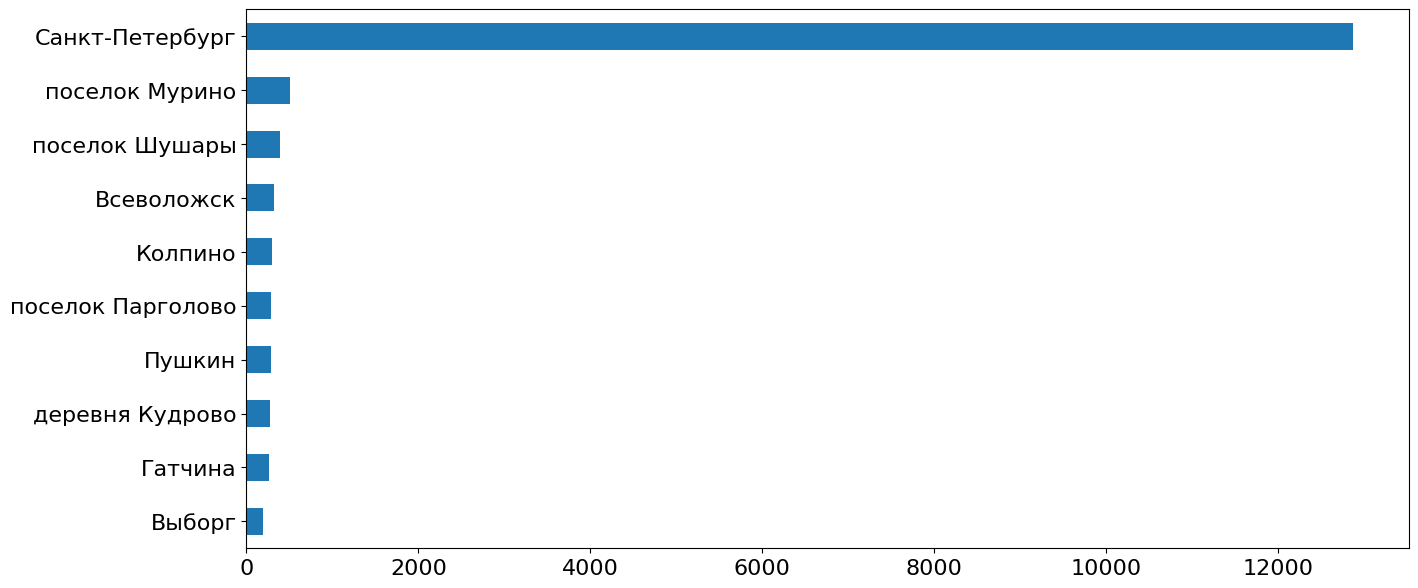

In [223]:
(
    top_10.sort_values(ascending = True)
    .plot(
        kind = 'barh',
        figsize = (15, 7), 
        rot = 0, 
        legend = False, 
        fontsize = 16)
)

<div class="alert alert-info" role="alert">
    
Визуально заметно, что в Санкт-Петербурге объявлений в десятки раз больше, чем в других населенных пунктах
    
<div>

In [224]:
# рассчитаем стоимость 1 кв.м. в десятке городов ТОП
top_10_price_meter = df_norm.query('locality_name in (@top_10.index)').pivot_table(index='locality_name', values='price_meter')
top_10_price_meter = top_10_price_meter.astype(int)
top_10_price_meter.sort_values('price_meter', ascending=False)

price_meter
locality_name                 
Санкт-Петербург         110549
Пушкин                  101608
деревня Кудрово          92233
поселок Парголово        89669
поселок Мурино           85120
поселок Шушары           77493
Колпино                  74735
Всеволожск               68575
Гатчина                  68100
Выборг                   57295

<div class="alert alert-info" role="alert">
    
График по средней стоимости квадратного метра у ТОП-10
    
<div>

<AxesSubplot: ylabel='locality_name'>

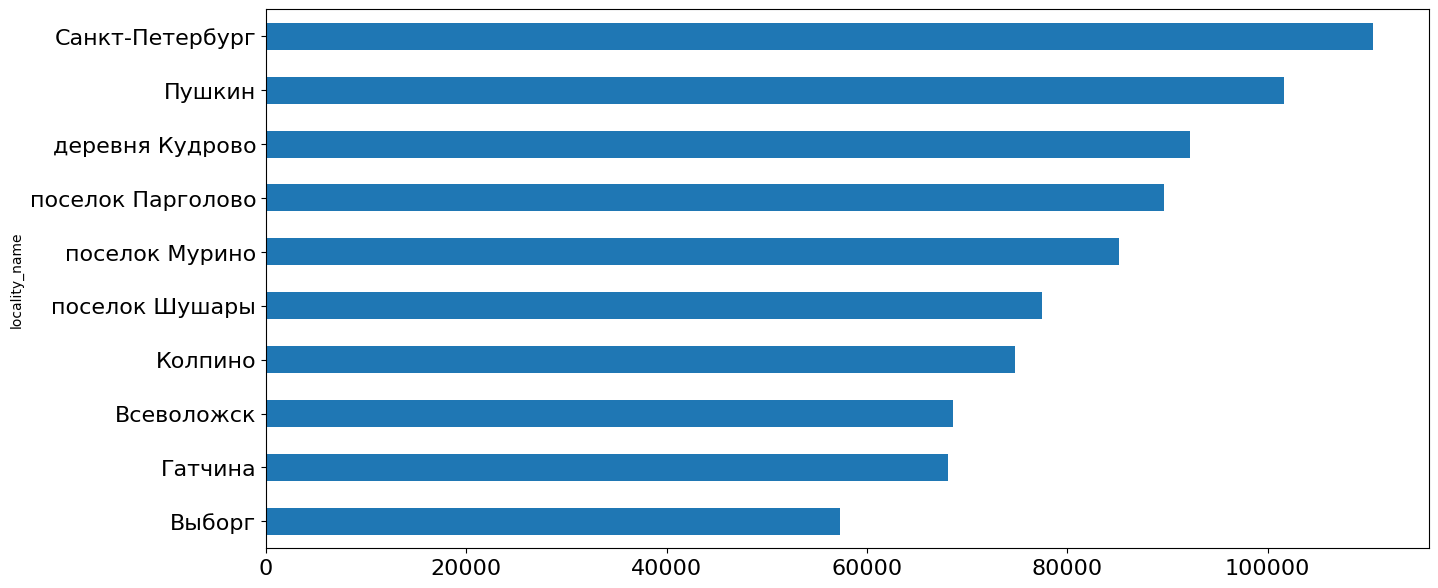

In [225]:
(
    top_10_price_meter.sort_values(by='price_meter', ascending = True)
    .plot(
        kind = 'barh',
        figsize = (15, 7), 
        rot = 0, 
        legend = False, 
        fontsize = 16)
)

**Вывод:**

- наибольшее кол-во объявлений из всей Ленинградской области, конечно в Санкт-Петербурге;
- стоимость одного кв. м. жилой недвижимости самая высокая - тоже в Санкт-Петербурге, из TOP-10 городов с наибольшим кол-вом объявлений;
- второй город по стоимости одного кв.м. жилья - Пушкин, несмотря на то, что Шушары и Кудрово, например ближе к Санкт-Петербургу (являются, по сути пригородом Санкт-Петербурга), и населения в Шушарах немного больше, в Пушкине жилье дороже, чем в Шушарах и Кудрово, видимо, из-за того, что Пушкин - крупный туристический, научный, учебный и военно-промышленный центр, а в поселках типа Шушары, Кудрово, Мурино - недостаточная социальная инфраструтура
- далее по стоимости квадратного метра жилья идут близлежащие к Питеру поселки и деревни
- из десятки ТОП городов наименьшая стоимость - в Выборге (он наиболее удален от города, с малой численностью населения)

#### 5.5.8. Зависимость цены объекта и удаленности от центра города.

**Определим границы центра.**

- Вычислим среднюю цену каждого километра
- Опишем, как стоимость объектов зависит от расстояния до центра города.

-0.04623897219426522

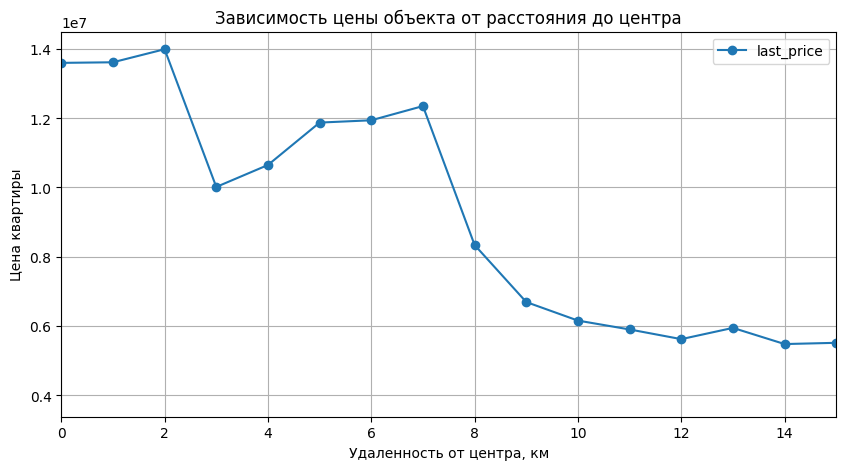

In [226]:
(        # сначала определим в каких пределах будем считать центр города
    df_norm.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km  < 30')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость цены объекта от расстояния до центра')
plt.ylabel('Цена квартиры')
plt.xlabel('Удаленность от центра, км')
df_norm['last_price'].corr(df_norm['city_centers_nearest_km'])

На линейном графике по цене объекта и удаленности от центра видим снижение цены тем больше, чем дальше от центра.
Корреляция существует, хоть и не очень большая, 29%.

Text(0.5, 0, 'Удаленность от центра, км')

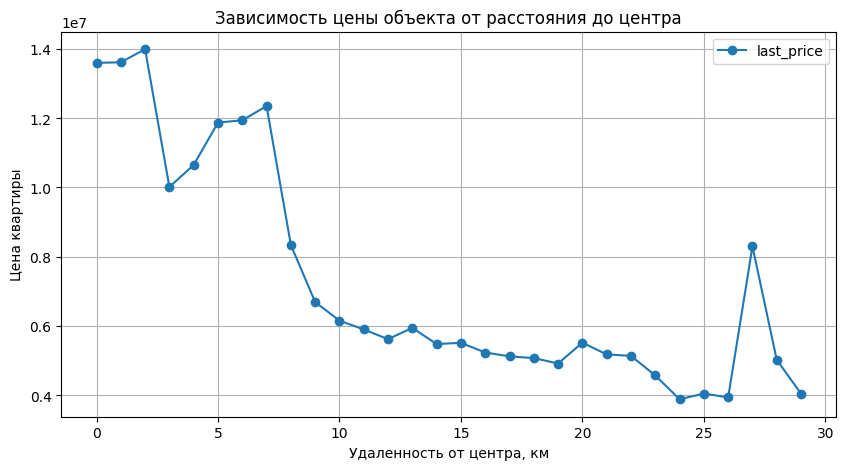

In [227]:
(        # сначала определим в каких пределах будем считать центр города
    df_norm.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km  < 30')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.title('Зависимость цены объекта от расстояния до центра')
plt.ylabel('Цена квартиры')
plt.xlabel('Удаленность от центра, км')

<div class="alert alert-info" role="alert">
    
Изучим выбросы на 27 км
    
<div>

In [228]:
df_norm.query('city_centers_nearest_km == 27')

total_images  last_price  total_area first_day_exposition  rooms  \
139               8  16912000.0       105.7           2016-12-09      2   
431               9   8570000.0        72.0           2018-08-11      3   
543               0   3500000.0        28.5           2018-06-06      1   
545              13   4500000.0        65.5           2017-10-27      3   
725              13  14350000.0        74.0           2017-11-28      2   
...             ...         ...         ...                  ...    ...   
21840            10   3100000.0        36.0           2017-10-27      1   
21903             8   5299000.0        56.0           2018-03-30      3   
21942             3   3000000.0        37.0           2015-12-04      1   
22664             5   2450000.0        32.0           2017-03-09      1   
22815             0   4600000.0        55.0           2017-01-23      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
139              2.70           3.0         48.4      1         False  ...   
431              3.00           6.0         42.0      4         False  ...   
543              2.50           5.0         16.0      4         False  ...   
545              2.60          10.0         42.0      7         False  ...   
725              3.13           5.0         30.0      3         False  ...   
...               ...           ...          ...    ...           ...  ...   
21840            2.70          17.0         16.0     14         False  ...   
21903            2.50           5.0         38.0      2         False  ...   
21942            2.65          12.0         14.0      4         False  ...   
22664            2.50           9.0         20.0      1         False  ...   
22815            3.00           4.0         41.0      4         False  ...   

       days_exposition    price_meter  weekday_exp  month_exp year_exp  \
139              390.0  160000.000000            4         12     2016   
431              149.0  119027.777778            5          8     2018   
543               86.0  122807.017544            2          6     2018   
545               32.0   68702.290076            4         10     2017   
725              128.0  193918.918919            1         11     2017   
...                ...            ...          ...        ...      ...   
21840            364.0   86111.111111            4         10     2017   
21903            159.0   94625.000000            4          3     2018   
21942            221.0   81081.081081            4         12     2015   
22664            454.0   76562.500000            3          3     2017   
22815            172.0   83636.363636            0          1     2017   

       floor_type  city_centers_nearest_km  living_ratio_%  kitchen_ratio_%  \
139        первый                       27           45.79            14.57   
431        другой                       27           58.33            13.89   
543        другой                       27           56.14            17.54   
545        другой                       27           64.12            12.21   
725        другой                       27           40.54            33.78   
...           ...                      ...             ...              ...   
21840      другой                       27           44.44            27.78   
21903      другой                       27           67.86            11.61   
21942      другой                       27           37.84            27.03   
22664      первый                       27           62.50            18.75   
22815   последний                       27           74.55             9.09   

             area_type  
139    большая 100-200  
431     средняя 50-100  
543    маленькая 12-30  
545     средняя 50-100  
725     средняя 50-100  
...                ...  
21840  небольшая 30-50  
21903   средняя 50-100  
21942  небольшая 30-50  
22664  небольшая 30-50  
22815   средняя 50-100  

[86 rows x 31 columns]

In [263]:
df_norm['total_area'].describe()

count    19390.000000
mean        57.555579
std         27.779784
min         17.600000
25%         40.000000
50%         50.600000
75%         67.000000
max        380.000000
Name: total_area, dtype: float64

In [283]:
df_norm['last_price'].describe()

count    1.939000e+04
mean     5.817338e+06
std      5.428548e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.450000e+06
max      9.800000e+07
Name: last_price, dtype: float64

In [264]:
df_norm.query('city_centers_nearest_km == 27 and total_area > 67')['total_area'].count()

17

In [265]:
df_norm.query('city_centers_nearest_km == 27 and total_area > 67')['total_area'].value_counts()

75.00     2
70.00     2
115.00    1
105.70    1
69.00     1
78.00     1
84.40     1
72.00     1
145.00    1
68.00     1
74.20     1
78.65     1
89.60     1
74.00     1
228.00    1
Name: total_area, dtype: int64

In [267]:
df_norm.query('city_centers_nearest_km == 27 and total_area > 67')['last_price'].value_counts()

7500000.0     2
29500000.0    1
10900000.0    1
7400000.0     1
15000000.0    1
29000000.0    1
12300000.0    1
6650000.0     1
7990000.0     1
4800000.0     1
16912000.0    1
14350000.0    1
11350000.0    1
8000000.0     1
4700000.0     1
8570000.0     1
Name: last_price, dtype: int64

In [269]:
df_norm.query('city_centers_nearest_km == 27')['last_price'].sum()

479609000.0

In [270]:
df_norm.query('city_centers_nearest_km == 27 and total_area > 67')['last_price'].sum()

202422000.0

In [281]:
(
    print(round(df_norm.query('city_centers_nearest_km == 27 and total_area > 67')['last_price']
                .sum() / df_norm.query('city_centers_nearest_km == 27')['last_price']
                .sum(), 2))
)

0.42


In [282]:
(
    print(round(df_norm.query('city_centers_nearest_km == 27 and total_area > 67')['last_price']
                .count() / df_norm.query('city_centers_nearest_km == 27')['last_price']
                .count(), 2))
)

0.2


<div class="alert alert-info" role="alert">
    
Изучили выбросы на 27 км.
  
На самом деле - просто в некоторых местах на удаленности 27 км от центра среди основной массы нижесредних по цене и площади квартир, есть несколько выбивающихся (выше третьего квартиля) - более 67 по площади (при max 380 кв.м) и более 6,5 по цене. Таких квартир 17, при их доле (по цене) 20% от всех на 27 км, по сумме цен они составляют 42%, поэтому и пик на графике.
    
<div>

F:\Anaconda\envs\practicum\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='city_centers_nearest_km', ylabel='last_price'>

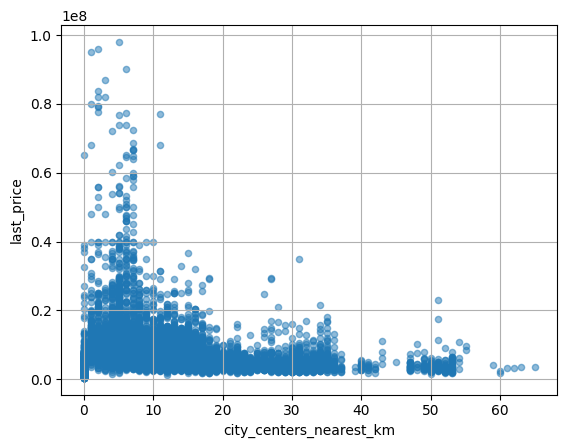

In [229]:
df_norm.plot(x='city_centers_nearest_km', y='last_price', kind='scatter', grid=True, alpha=0.5)

На графике рассеивания лучше понятно: небольшая цена на квартиры, до 2 млн, есть на любой удаленности от центра города, это понятно - небольшие квартиры продаются везде. А вот дорогие есть только ближе к центру, в основном - до 10 км. Это объясняется и тем, что в центре больше квартир большей площади, и, возможно, ценой за 1 кв.м.

#### 5.5.9. Посчитаем стоимость одного квадратного метра в центре.

Text(0.5, 0, 'Удаленность от центра города, км')

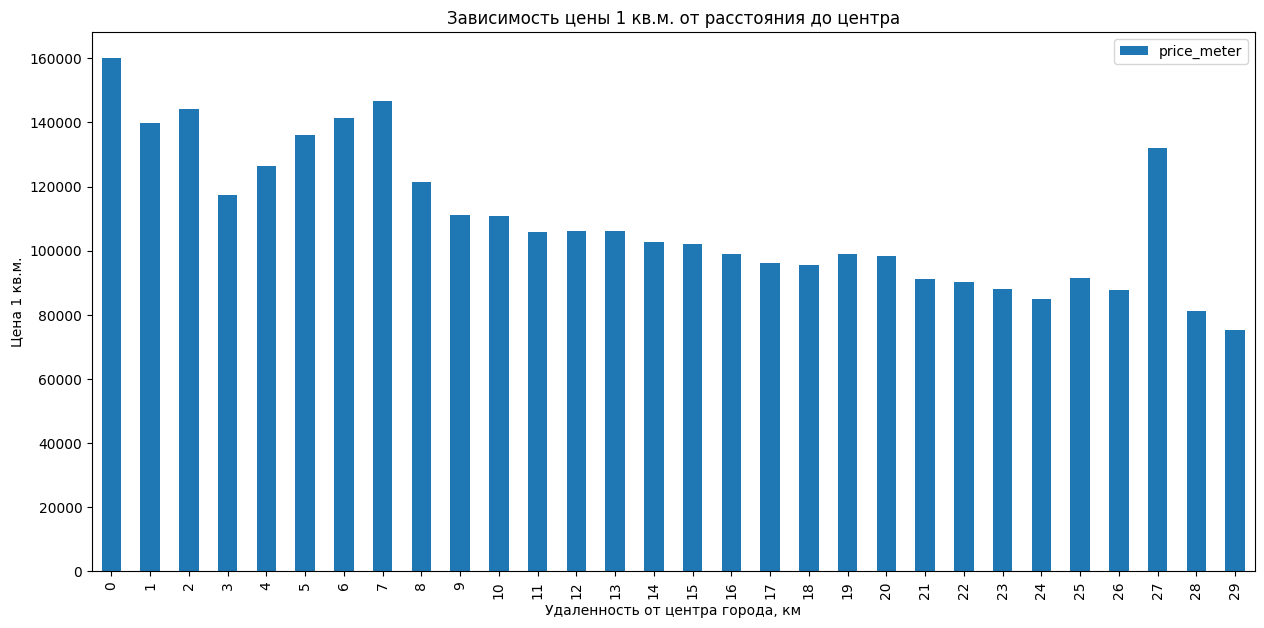

In [230]:
# посмотрим на зависимость цены квадратного метра от удаленности
(
df_norm.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='price_meter', aggfunc='mean')
    .plot(y='price_meter', kind='bar', figsize=(15, 7))
)
#df_norm.pivot_table(index='rooms', values='price_meter').plot(y='price_meter', kind='bar')
plt.title('Зависимость цены 1 кв.м. от расстояния до центра')
plt.ylabel('Цена 1 кв.м.')
plt.xlabel('Удаленность от центра города, км')

In [231]:
(
df_norm.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='price_meter', aggfunc='mean')
    .sort_values(by='price_meter', ascending=False).round(2)
)

price_meter
city_centers_nearest_km             
0                          160230.35
7                          146559.66
2                          144269.16
6                          141318.52
1                          139839.55
5                          136047.11
27                         132115.71
4                          126452.24
8                          121307.04
3                          117473.48
9                          111160.90
10                         110941.43
13                         106231.14
12                         105969.64
11                         105938.80
14                         102689.84
15                         102029.26
19                          99015.33
16                          98893.73
20                          98389.64
17                          96264.39
18                          95453.25
25                          91531.37
21                          90996.94
22                          90191.45
23                          88113.00
26                          87832.11
24                          84962.46
28                          81161.92
29                          75325.77

<div class="alert alert-info" role="alert">
    
Округлим значения удаленности от центра города, которые мы перевели в км - city_centers_nearest_km
    
<div>

In [232]:
df_norm['city_centers_nearest_km'].round(2)

1        19
2        14
3         7
4         8
5         0
         ..
23058     4
23059     0
23060    34
23062     0
23064    10
Name: city_centers_nearest_km, Length: 19390, dtype: int32

<div class="alert alert-info" role="alert">

**Вывод:**
Самая высокие цены за квадратный метр жилой недвижимости в центре Санкт-Петербурга (1-2 км)
   
Далее - чем удаленнее, тем цена за квадратный метр жилья уменьшается.

Есть некоторые пики цен на разной удаленности от центра, возможно, это обусловлено застройкой в этих районах повышенной комфортности, элитного жилья, благоустроенных территорий и т.п.

<div>

### 5.6. Цены на объекты жилой недвижимости.

In [233]:
#посмотрим в целом какие ценовые предложения на рынке жилья, в тыс руб
# сначала посмотрим полный датафрейм, после удаления всех пропусков, дубликатов, но не урезанный по критериям площади
print((df['last_price']/1000).describe().round(2))
# посмотрим ту же информацию в нормальном датафрейме, который мы оставили для статанализа
(df_norm['last_price']/1000).describe().round(2)

count    23066.00
mean      6141.96
std       5905.80
min        430.00
25%       3450.00
50%       4650.00
75%       6750.00
max      99000.00
Name: last_price, dtype: float64


count    19390.00
mean      5817.34
std       5428.55
min        430.00
25%       3400.00
50%       4500.00
75%       6450.00
max      98000.00
Name: last_price, dtype: float64

Значения в обоих датафреймах практически не различаются, изменения не повредили.

Text(0, 0.5, 'Кол-во объявлений')

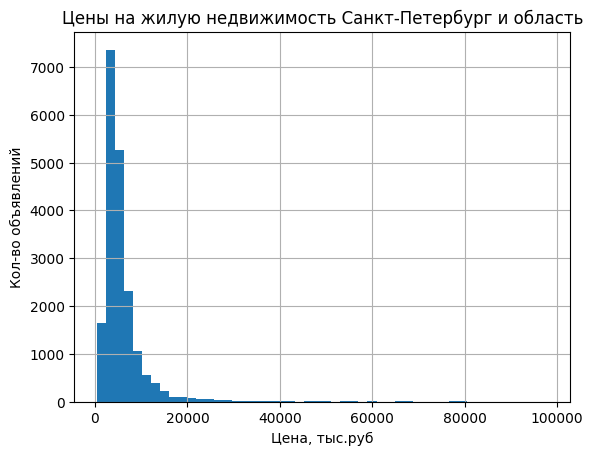

In [234]:
(df_norm['last_price']/1000).hist(bins=50)
plt.title('Цены на жилую недвижимость Санкт-Петербург и область')
plt.xlabel('Цена, тыс.руб')
plt.ylabel('Кол-во объявлений')

Text(0, 0.5, 'Кол-во объявлений')

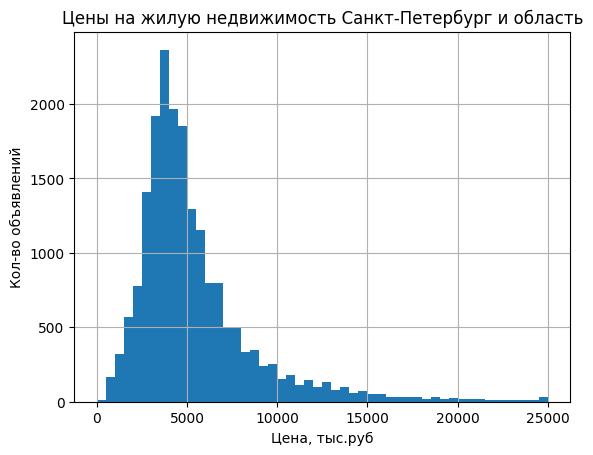

In [235]:
#сделаем срез до 25 млн.руб
(df_norm['last_price']/1000).hist(bins=50, range=(0, 25000))
plt.title('Цены на жилую недвижимость Санкт-Петербург и область')
plt.xlabel('Цена, тыс.руб')
plt.ylabel('Кол-во объявлений')

Text(0, 0.5, 'Кол-во объявлений')

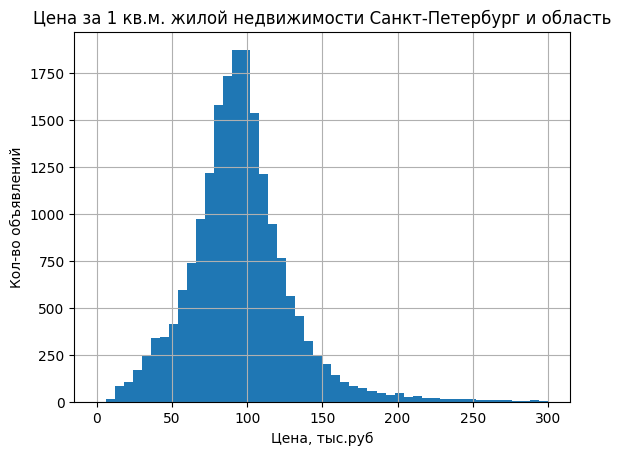

In [236]:
#посмотрим цены одного квадратного метра, ограничим до 300 тыс руб за метр
(df_norm['price_meter']/1000).hist(bins=50, range=(0, 300))
plt.title('Цена за 1 кв.м. жилой недвижимости Санкт-Петербург и область')
plt.xlabel('Цена, тыс.руб')
plt.ylabel('Кол-во объявлений')

In [237]:
(df_norm['price_meter']/1000).describe().round(2)

count    19390.00
mean        96.58
std         39.44
min          7.96
25%         76.23
50%         93.75
75%        111.54
max        719.30
Name: price_meter, dtype: float64

In [238]:
# узнаем где самое дорогое жилье
df_norm.loc[df_norm['last_price'] == df_norm['last_price'].max(), 'locality_name']

16167    Санкт-Петербург
Name: locality_name, dtype: object

In [239]:
df_norm[df_norm['last_price'] == df_norm['last_price']. max()]

total_images  last_price  total_area first_day_exposition  rooms  \
16167            10  98000000.0       155.0           2017-12-16      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
16167             2.8           8.0      88.9235      6         False  ...   

       days_exposition    price_meter  weekday_exp  month_exp year_exp  \
16167             90.0  632258.064516            5         12     2017   

       floor_type  city_centers_nearest_km  living_ratio_%  kitchen_ratio_%  \
16167      другой                        5           57.37             17.4   

             area_type  
16167  большая 100-200  

[1 rows x 31 columns]

In [240]:
# в каком населенном пункте самая дешевая жилая недвижимость
df_norm.loc[df_norm['last_price'] == df_norm['last_price'].min(), 'locality_name']

14536    поселок станции Свирь
Name: locality_name, dtype: object

In [241]:
df_norm[df_norm['last_price'] == df_norm['last_price']. min()]

total_images  last_price  total_area first_day_exposition  rooms  \
14536             5    430000.0        54.0           2018-06-26      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
14536             2.8           3.0      30.9798      3         False  ...   

       days_exposition  price_meter  weekday_exp  month_exp year_exp  \
14536             44.0  7962.962963            1          6     2018   

       floor_type  city_centers_nearest_km  living_ratio_%  kitchen_ratio_%  \
14536   последний                        0           57.37             17.4   

            area_type  
14536  средняя 50-100  

[1 rows x 31 columns]

In [242]:
# где наибольшая цена за 1 кв.м.
df_norm.loc[df_norm['price_meter'] == df_norm['price_meter'].max(), 'locality_name']                                            

6278    Санкт-Петербург
Name: locality_name, dtype: object

In [243]:
# где самая низкая цена за 1 кв.м жилья
df_norm.loc[df_norm['price_meter'] == df_norm['price_meter'].min(), 'locality_name'] 

14536    поселок станции Свирь
Name: locality_name, dtype: object

In [244]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19390 entries, 1 to 23064
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             19390 non-null  int64         
 1   last_price               19390 non-null  float64       
 2   total_area               19390 non-null  float64       
 3   first_day_exposition     19390 non-null  datetime64[ns]
 4   rooms                    19390 non-null  int64         
 5   ceiling_height           19390 non-null  float64       
 6   floors_total             19390 non-null  float64       
 7   living_area              19390 non-null  float64       
 8   floor                    19390 non-null  int64         
 9   is_apartment             19390 non-null  bool          
 10  studio                   19390 non-null  bool          
 11  open_plan                19390 non-null  bool          
 12  kitchen_area             19390 n

<div class="alert alert-info" role="alert">
    
**Вывод:**
    
Рынок жилья в г. Санкт-Петербург и Ленинградской области представлен диапазоном цен от 430 тыс руб до 98 млн руб.
Основная масса объектов в диапазоне цен до 20 млн руб, большинство 3,4-6,5 млн руб, максимальное количество таких квартир продается за цену около 4,5 млн руб, элитного жилья со стоимостью более 100 млн руб - 37 квартир.

Средняя цена за один квадратный метр жилой недвижимости - 76-110 тыс руб, максимальная цена за 1 кв.м. - 719 тыс руб, самая низкая - 8 тыс руб за метр.

Выводы сделаны на основе базы данных, обработанной для среднестатистического анализа
    
<div>

## 6. Общий вывод.

<div class="alert alert-info" role="alert">

1. По представленным данным из сервиса Яндекс Недвижимость - архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах проведена обработка и исследовательский анализ:
- удаление пропущенных значений, дубликатов, аномальных и выбивающихся значений;
- изменение типа данных на необходимый (дата, апартамены, целочисленные значения численных критериев);
- расчет необходимых критериев (цена за один кв. м., день/месяц/год даты публикации, категория квартиры по типу площади и этажности, соотношение между площадями - жилой/общей и кухни/общей);
- исследование по каждому критерию: по цене, площади, кол-ву комнат, высоте потолков, удаленности от центра/аэропорта/парков/водоемов, этажности, типу (студия/апартаменты), длительности размещения публикации;
- выявление влияния различных критериев на стоимость жилья и зависимости их друг от друга.

2. Рынок жилья в Санкт-Петербурге и области представлен объектами жилья разного типа, из всей базы 22515 объектов основное это квартиры, также есть 133 студии, 45 апартаментов и 59 квартир со свободной планировкой, элитного жилья с площадью более 400 кв. м -  14 квртир. 
- диапазон цен: от 430 тыс руб до 99 млн руб. Основная масса объектов в диапазоне цен до 20 млн руб, большинство 3,4-6,7 млн руб, максимальное количество таких квартир продается за цену около 4,6 млн руб, элитного жилья со стоимостью более 100 млн руб - 37 квартир.
- комнаты: основное кол-во объявлений - по квартирам с 1-2-3 комнатами, меньше встречаются с 5 и более, квартир с 7 и более комнат 26;
- площадь квартир: от 12 до 900 кв.м., основная маса - от 30 до 100 кв.м., в среднем 40-70 кв.м., со средними значениями жилой площади/площади кухни 30/9 кв.м. соответственно, соотношение жилой площади к общей 60-70%, кухни к общей - 10-15%;
- высота потолков: до 2,5 м - 73 (их удалили из выборки, это не по СНИПу), основная масса квартир имеет потолки 2,5м-3,2м (таких квартир 18825), встречаются и более высокие 3,2м-6м (727 квартир, видимо из элитного жилья, двухэтажные, например);
- общая этажность домов: в основном пяти и девятиэтажки (5704 и 3743 соответственно, в общей сложности 9447 квартир - 42% от общего кол-ва), реже встречаются высотные (12-36 этажей), видимо, новостройки, одноэтажных дома  23, высотки больше 36 этажей мы удалили из базы в предобработке, т.к. в Санкт-Петербурге нет домов выше 36 этажей (не разрешено строить);
- этаж квартиры: на первых и последних этажах предлагается 12% и 14% от всего кол-ва квартир соответственно, а основная масса 73% - средние этажи;
- балконы: основная масса объявлений по квартирам без балконов (14970) с 1-2 балконами 7765, больше 3-х балконов - 477 квартир;
- длительность продажи: основная масса квартир продается в первые три месяца (90-100 дней), однако есть и такие, которые продаются более 3х лет (более 1000 дней), среднее кол-во дней на сайте объявление висит 185 дней. Выделяется большое кол-во объявлений, которые закрывались на 45 и 60 день, в связи с окончанием срока публикации. Больше всего продаж квартир происходило в 2018 году, чуть меньше - в 2017 г, в 2019 - спад, но база данных охватывает только до 2019 года, много объявлений еще недавно вывешены, не закрыты.Нормальными продажами являются продажи, совершенные до 200 дней (до полугода). Быстрыми продажами можно считать продажи в первые два месяца, долгими - год-два. Очень быстрыми - в первые 10 дней, очень долгими - более 2-х лет.

3. Факторы, напрямую влияющие на цену объекта жилой недвижимости (по убыванию):
- площадь квартиры общая/жилая/кухни, степень корреляции соответственно 76/62/53%
- количество комнат (зависимость начинается при кол-ве комнат от 2х и выше), корреляция 44%
- удаленность от центра города: чем ближе к центру, тем квартира дороже (-27%)
- этаж, на котором находится квартира (цена первого ниже остальных, далее - последний, еще дороже - средние этажи) 5%
  
4. Цена 1 квадратного метра объекта жилой недвижимости:
- средняя цена за один квадратный метр жилой недвижимости - 97-100 тыс руб, максимальная цена за 1 кв.м. - 848 тыс руб, самая низкая - 8 тыс руб за метр. Небольшая цена на квартиры, до 2 млн, есть на любой удаленности от центра города, это понятно - небольшие квартиры продаются везде. А вот дорогие есть только ближе к центру, в основном - до 10 км. Это объясняется и тем, что в центре больше квартир большей площади, и, возможно, ценой за 1 кв.м.;
- самая высокая цена за квадратный метр жилой недвижимости в самом центре Санкт-Петербурга (0 км). На расстоянии от центра до 8 км цена за метр постепенно снижается, но в среднем держится на одном уровне. Далее - чем удаленнее, тем цена за квадратный метр жилья уменьшается. Неожиданные пики цен за метр встречаются на удаленности более 20 км от центра, на уровне цен 4-11 км, возможно, это обусловлено застройкой в этих районах повышенной комфортности, элитного жилья, благоустроенных территорий и т.п.;
- цена за один квадратный метр падает с увеличением комнат от 0 до 2-х, у 2х и 3х комнтаных квартир цена за 1 м практически на одном уровне, с увеличением кол-ва комнат от 3х и выше она снова возрастает. Стоимость одного кв. м. студии или апартамента соответствует стоимость одного кв. м. 5-тикомнатной квартиры;
- в разные годы цена за 1 кв. м. менялась: начиная с 2014 г она упала, в 2015-2017 годах она была на одном уровне, затем в 2018 незначительно поднялась, а в 2019 стала еще выше, но все равно не дошла до уровня 2014 года. За период 2014-2019 годы, самая высокая цена за 1 кв. м. площади жилой недвижимости была в 2014 году;
- сезонность влияет на рынок недвижимости - пик цен приходится на апрель, август и ноябрь, самый высокий пик в апреле (перед летом, перед отпусками), летом рынок стоит без движения, цены падают (люди в отпусках, мало кто думает о покупках квартир - другие траты).
- в зависимости от того, в какой день недели размещено объявление, на него с разной степенью обращают внимание потенциальные покупатели, пик внимания, соответственно, и повышение цены за квадратный метр, приходится на середину недели (среда), к выходным интерес падает, в воскресенье немного поднимается (планирование к началу недели).

Самое дорогое жилье: 3х комнатная квартира в центре Санкт-Петербурга 155/89 кв.м. (общая/жилая), на 6 этаже 8 этажного дома (средний), с высотой потолков 2,8 м, продается 3 мес, за 98 млн руб.
Самая дешевая жилая недвижимость (43 млн руб): 2 комнатная квартира в поселке станции Свирь 54/30 кв.м, на 3 этаже 3хэтажного дома (последний), высота потолков - 2,8 м.

Самая высокая цена за 1 кв. м. - в Санкт-Петербурге, самая низкая - в поселке станции Свирь.

<div>